In [7]:
%matplotlib notebook
import cv2
from openpiv import pyprocess, piv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

from IPython.display import clear_output, Image, display, HTML


In [10]:
# WARNING: CUSTOM CROPPING USED AT IMAGE1 AND IMAGE2 DEFINITIONS IN THE PIV PROCESS
# IF ANOTHER VIDEO IS USED, PLEASE CHANGE THIS

spatial_subsample = 1
piv_window_size = 60
window_overlap = 40

vidcap = cv2.VideoCapture("C:/Users/laure/Documents/ARA/laurd_ara/video_processing/fxd_low_1.mp4")
success, image1 = vidcap.read()
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)[100:-80:spatial_subsample,800:1500:spatial_subsample]
count = 0
U = []
V = []

final_u = []
final_v = []

fin_time = 240
avg_leng = 40

while success and count < fin_time:
    # cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success, image2 = vidcap.read()
    
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)[100:-80:spatial_subsample,800:1500:spatial_subsample]
    # print('Read a new frame: ', success)
    if success:
        
        u,v,s2n = pyprocess.extended_search_area_piv(image1, image2,window_size=piv_window_size,overlap=window_overlap)
        u = np.where(np.isfinite(u),u,0.)
        v = np.where(np.isfinite(v),v,0.)
        x,y = pyprocess.get_coordinates(image1.shape[:2],search_area_size=piv_window_size,overlap=window_overlap)
        image1 = image2.copy()
            
        U.append(u)
        V.append(v)

        if len(U)==avg_leng:
            final_u.append(np.mean(np.stack(U), axis=0))
            final_v.append(np.mean(np.stack(V), axis=0))

            U = U[1:]
            V = V[1:]
        count += 1

In [11]:
np.mean(s2n)

1.0910199506973044

In [12]:
np.where(np.isnan(u))[0].size/u.size

0.0

In [5]:
# plt.hist(s2n.flatten(),bins=30,range=(0.9,1.2))
# plt.show()

In [6]:
# Umean = np.mean(np.stack(U), axis=0)
# Vmean = np.mean(np.stack(V),axis=0)
# plt.ion()

In [3]:
len(final_u)

161

<IPython.core.display.Javascript object>


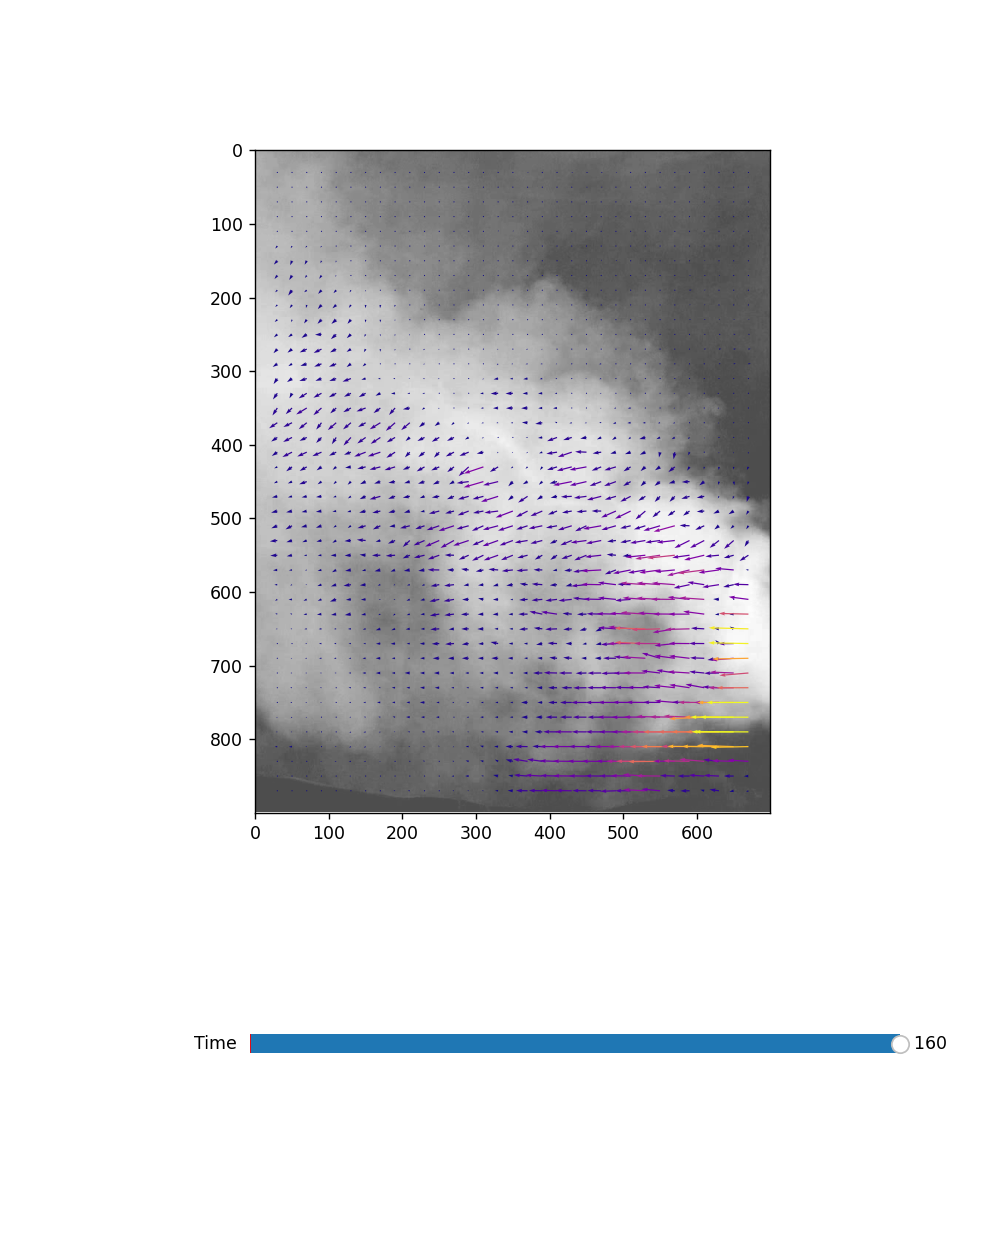

In [8]:
time_ind = 0
fig, ax = plt.subplots(figsize=(8,10))
plt.subplots_adjust(bottom=0.35)
 
# Create and plot sine wave
ax.imshow(image1,alpha=0.7,cmap="gray")
Q= ax.quiver(x,y,final_u[time_ind],final_v[time_ind],final_u[time_ind]**2+final_v[time_ind]**2, cmap="plasma")#,scale=50, width=.007)
# plt.show()

axfreq = plt.axes([0.25, 0.15, 0.65, 0.03])
 
# Create a slider from 0.0 to 20.0 in axes axfreq
# with 3 as initial value
freq = Slider(axfreq, 'Time', 0, fin_time-avg_leng, valinit=0,valstep=1,dragging=True)
# plt.plot(np.mean(Umean,axis=1)*30,y[:,0],color='r',lw=3)


def update_quiver(val):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """
    int_val = int(val)
    Q.set_UVC(final_u[int_val],final_v[int_val],final_u[int_val]**2+final_v[int_val]**2)


freq.on_changed(update_quiver)

# plt.colorbar(Q, orientation='horizontal',label="Speed (px)")#,pad=0.05)
plt.show()

<IPython.core.display.Javascript object>


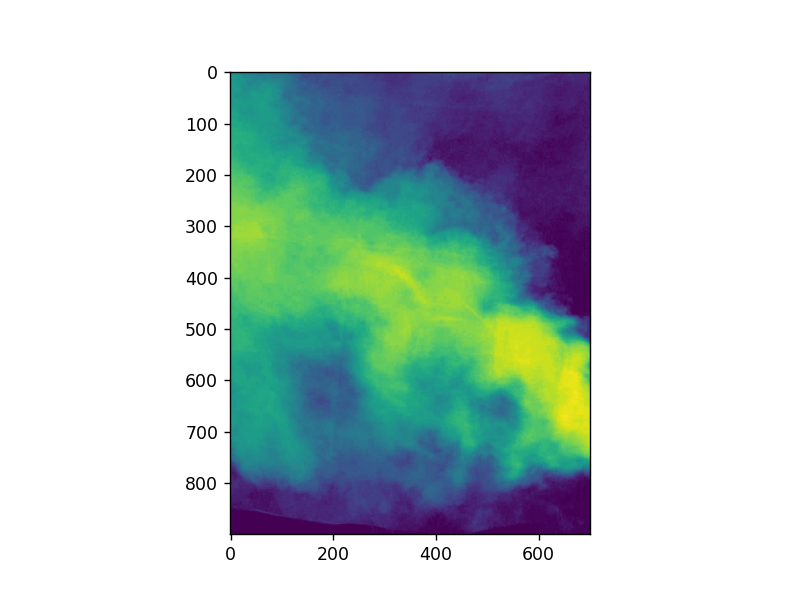

In [10]:
plt.figure()
plt.imshow(image1)
plt.show()

In [19]:
# np.save("improved_fixed_low_piv_U.npy",np.stack(final_u))

In [20]:
# np.save("improved_fixed_low_piv_V.npy",np.stack(final_v))

None

<IPython.core.display.Javascript object>


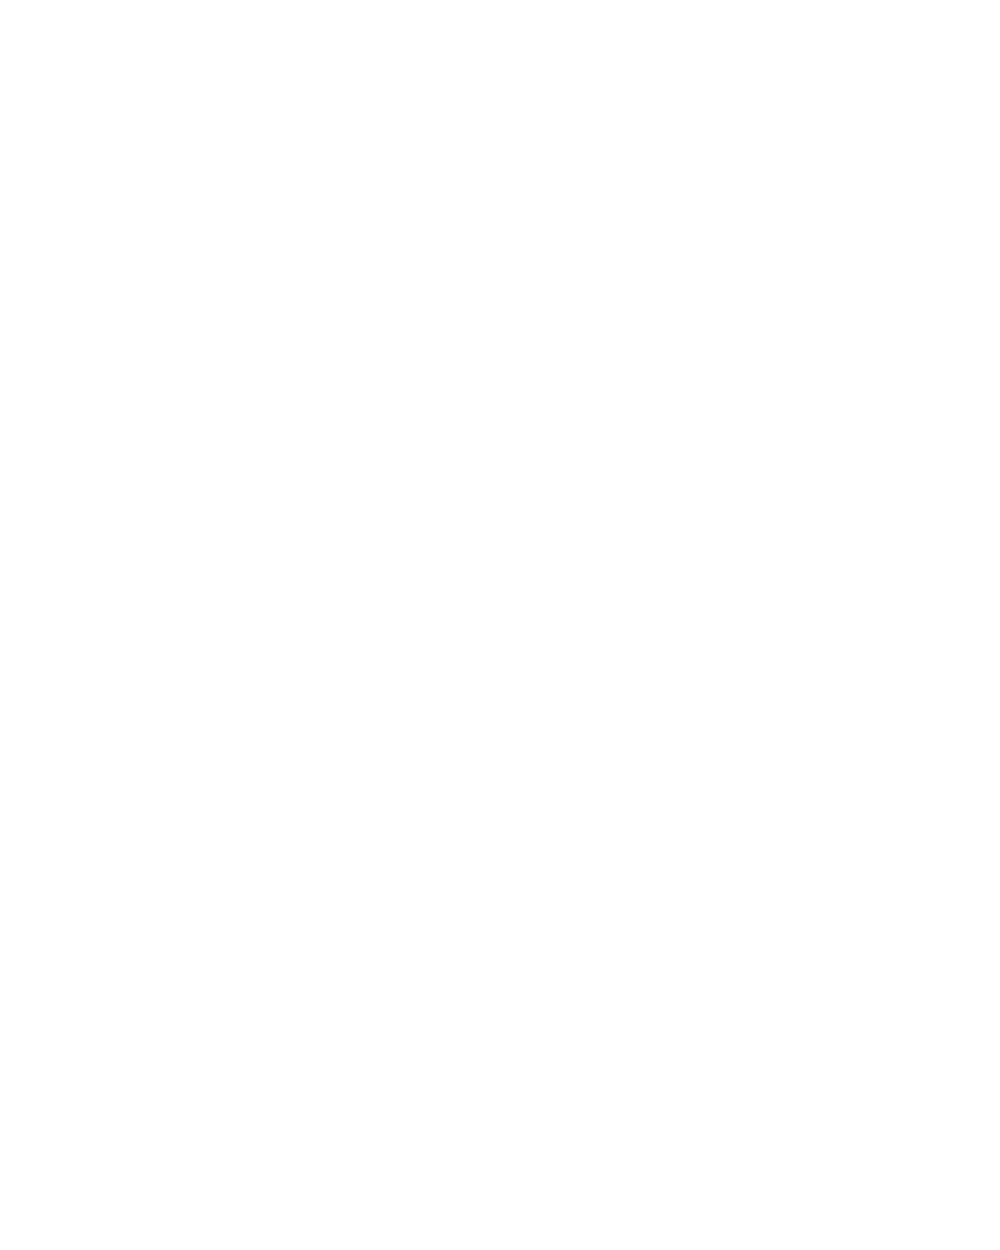

<IPython.core.display.Javascript object>


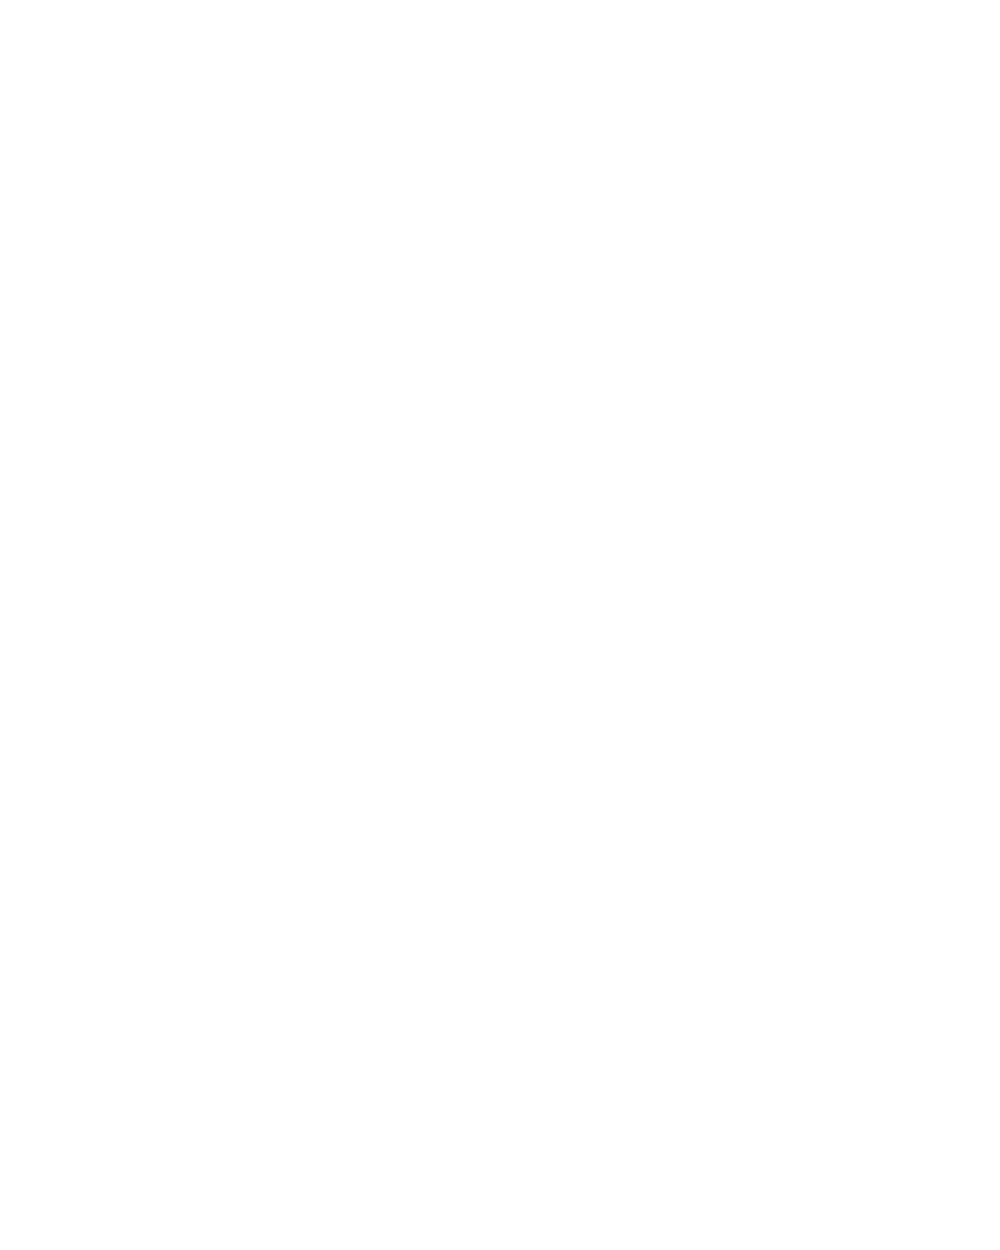

<IPython.core.display.Javascript object>


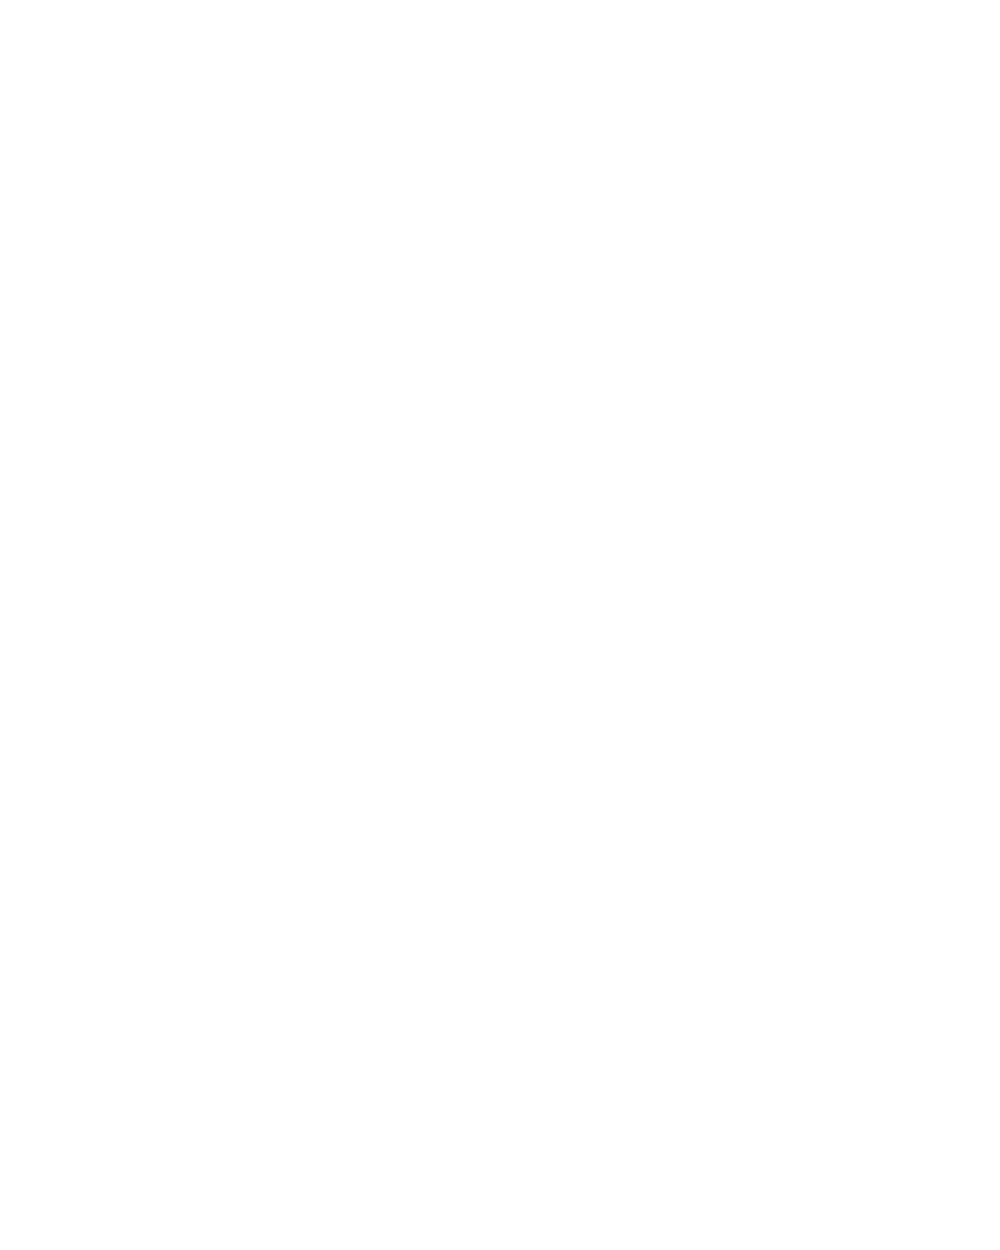

<IPython.core.display.Javascript object>


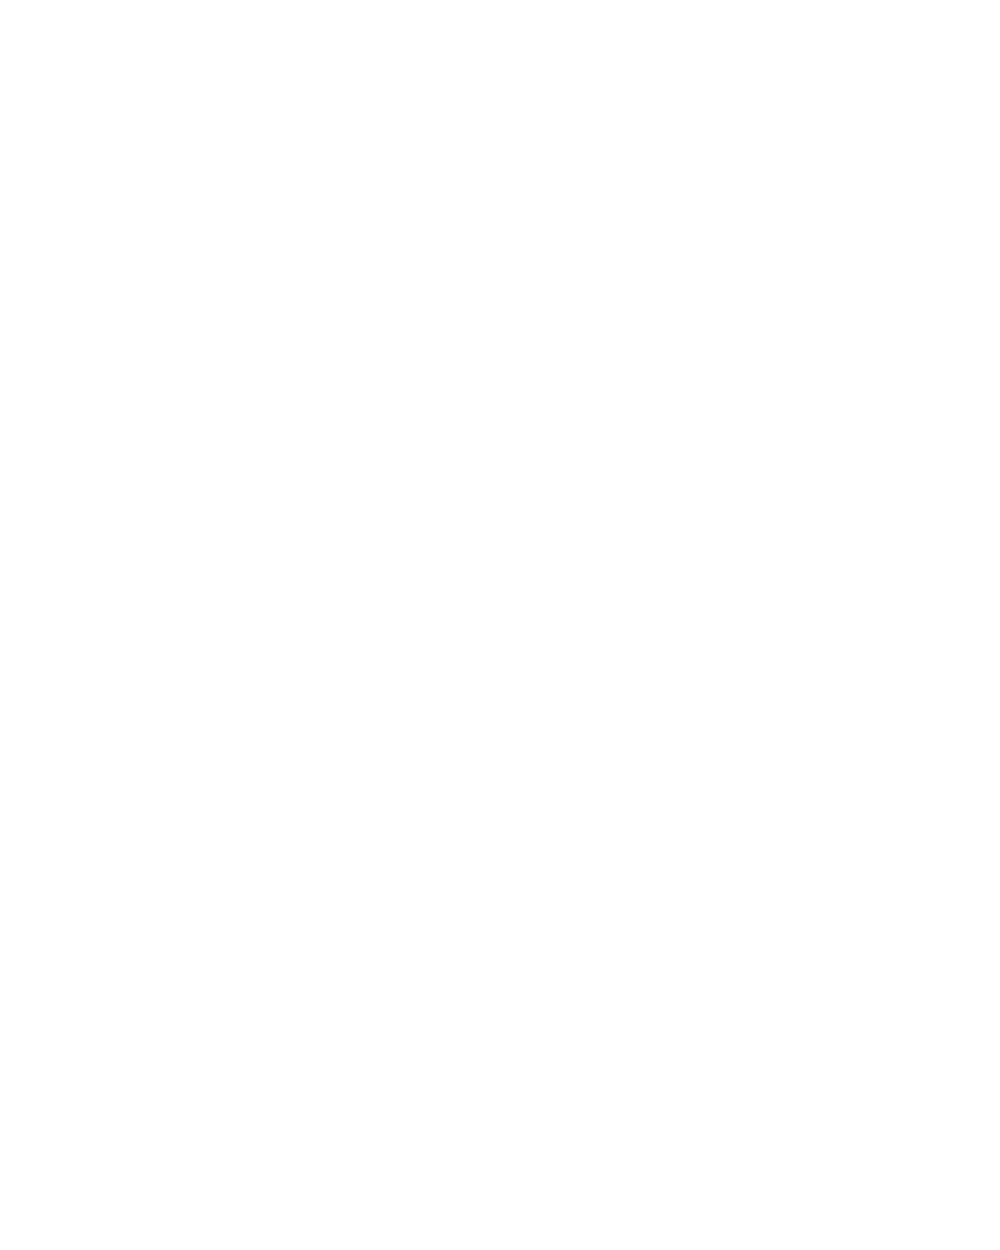

<IPython.core.display.Javascript object>


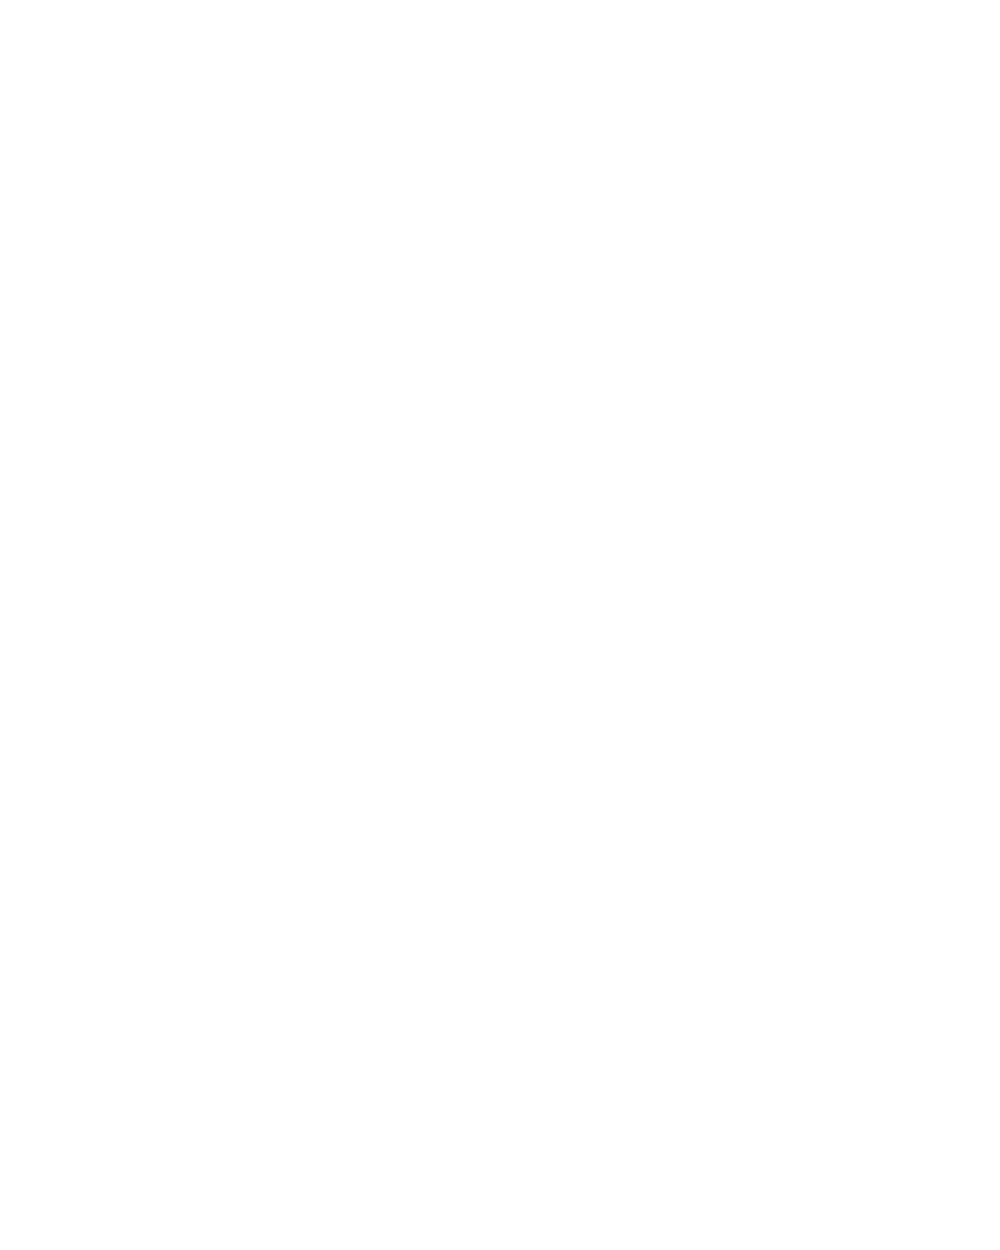

<IPython.core.display.Javascript object>


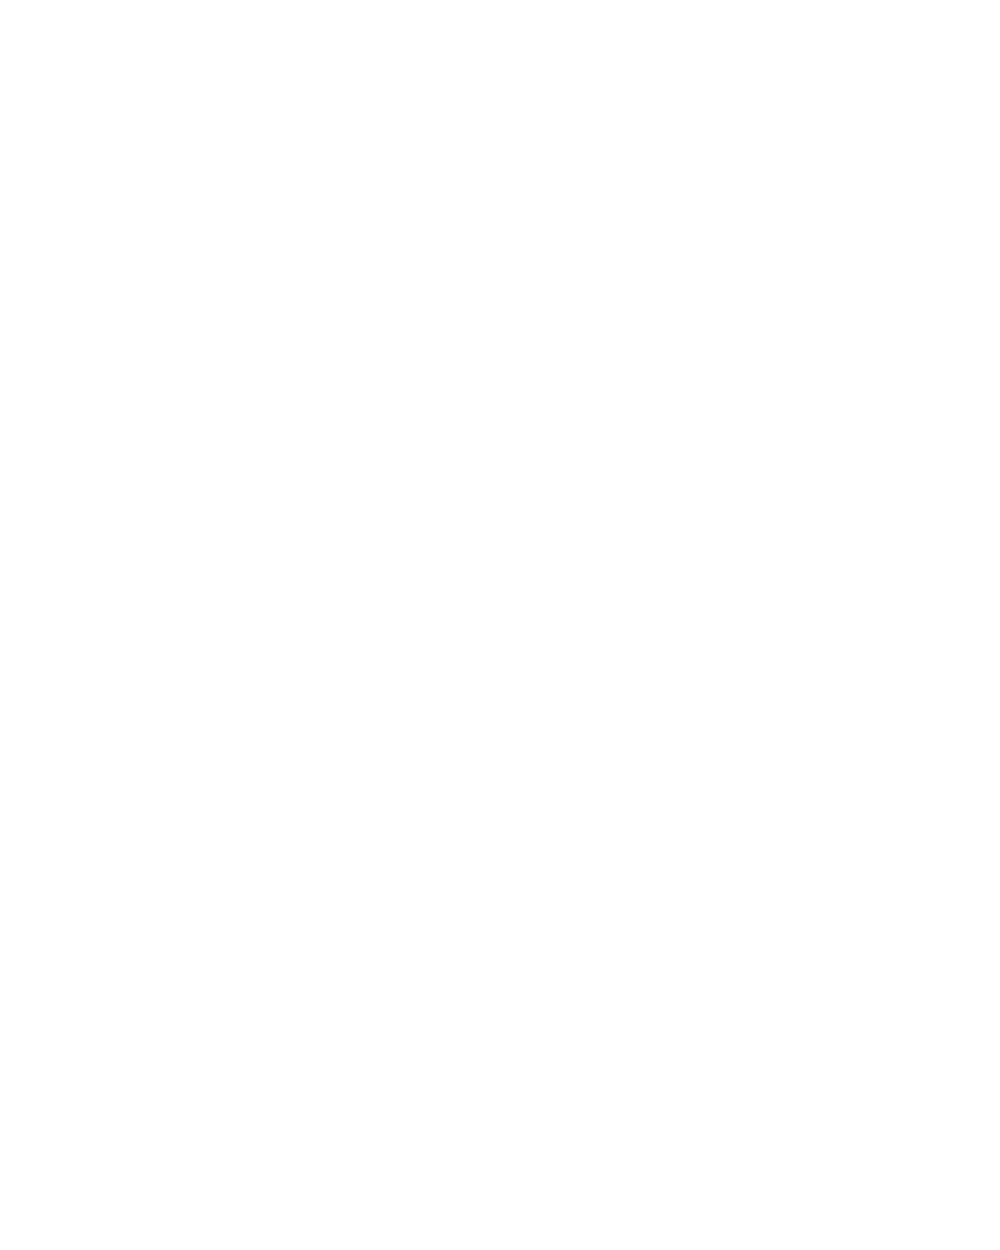

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


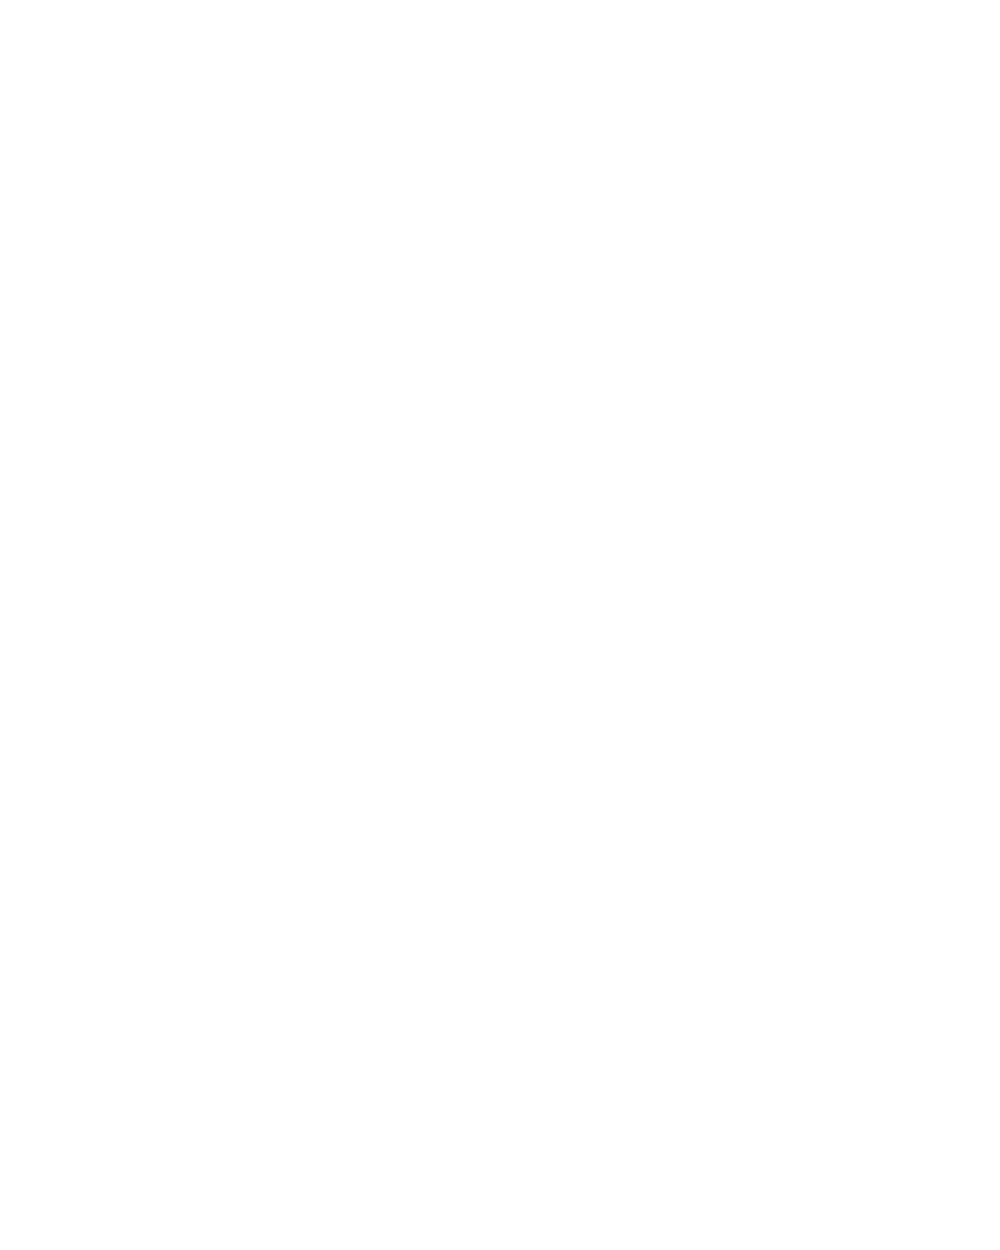

<IPython.core.display.Javascript object>


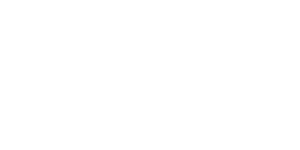

<IPython.core.display.Javascript object>


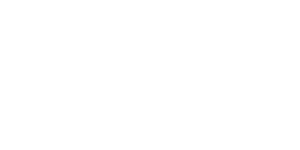

<IPython.core.display.Javascript object>


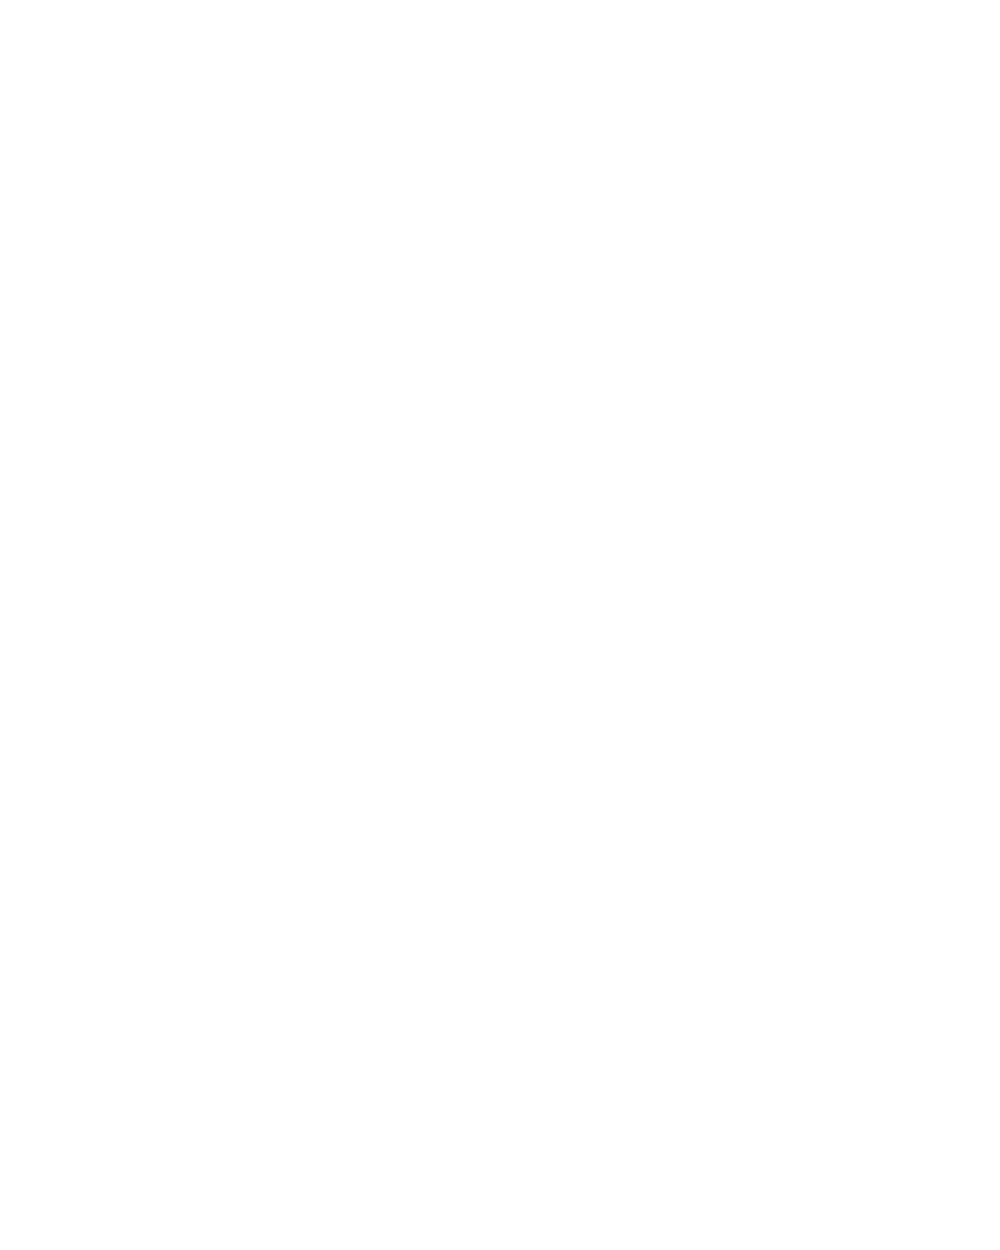

<IPython.core.display.Javascript object>


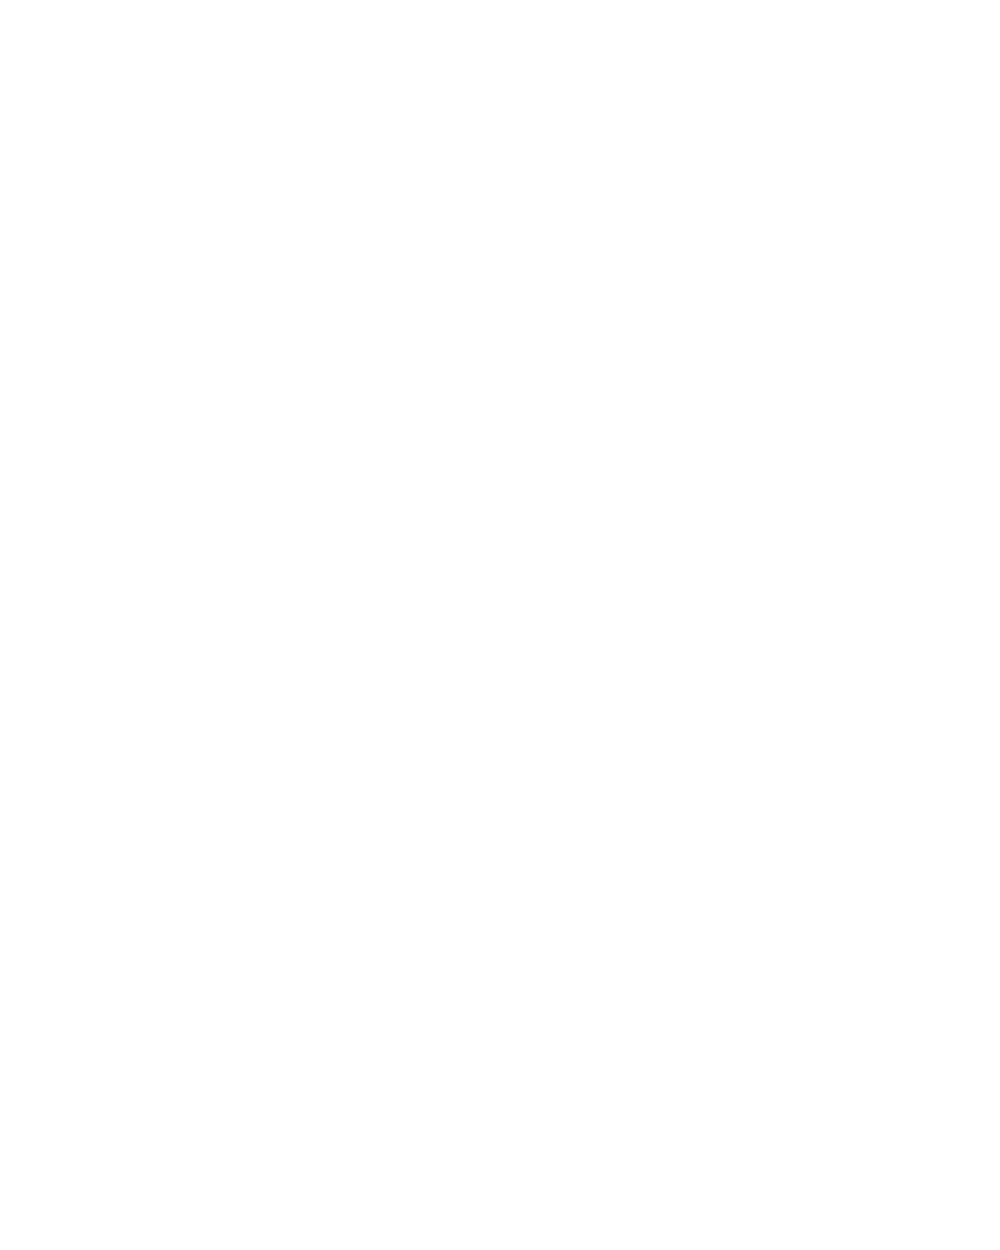

<IPython.core.display.Javascript object>


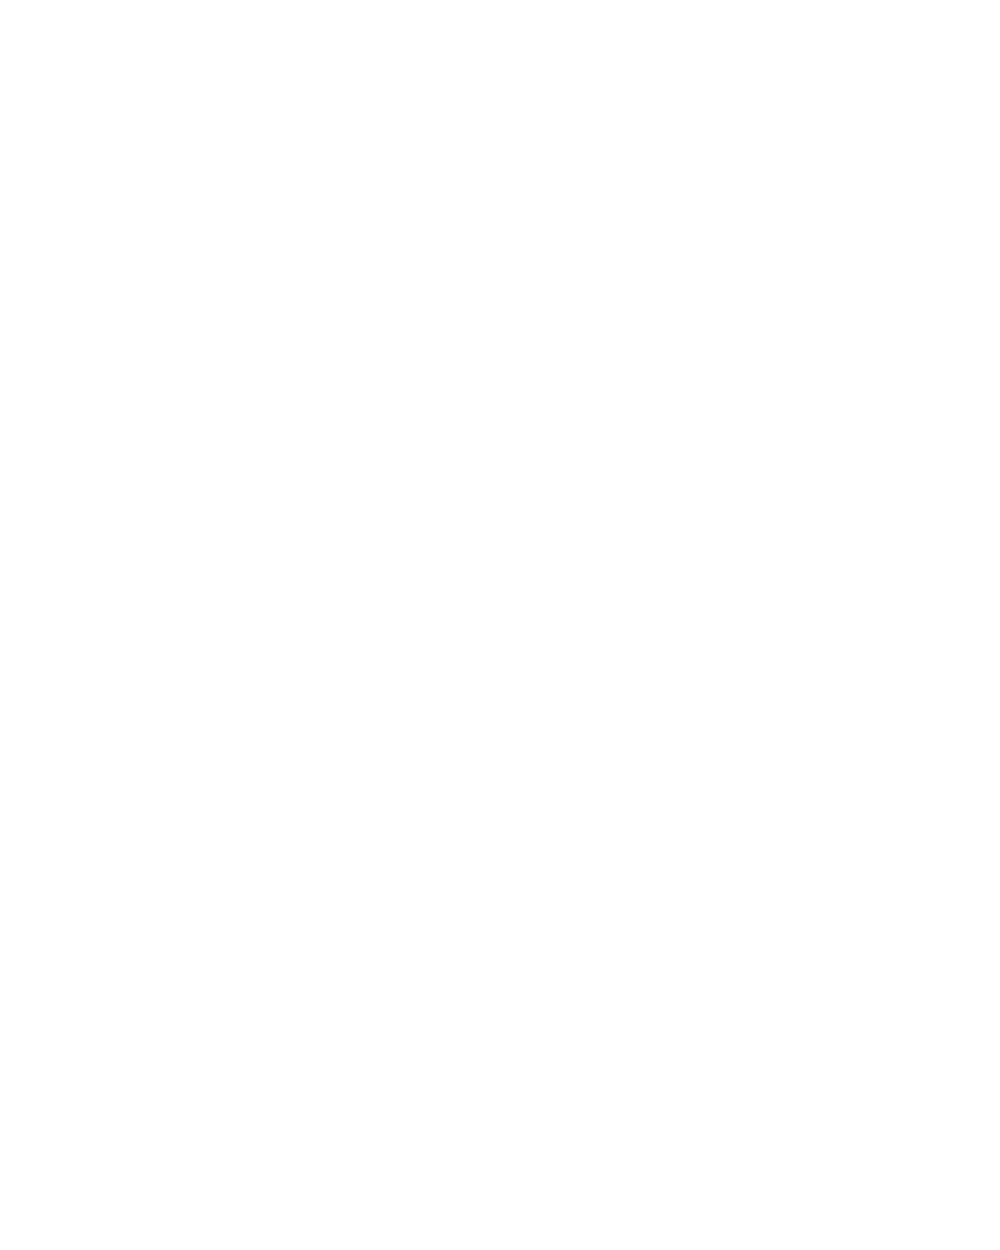

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


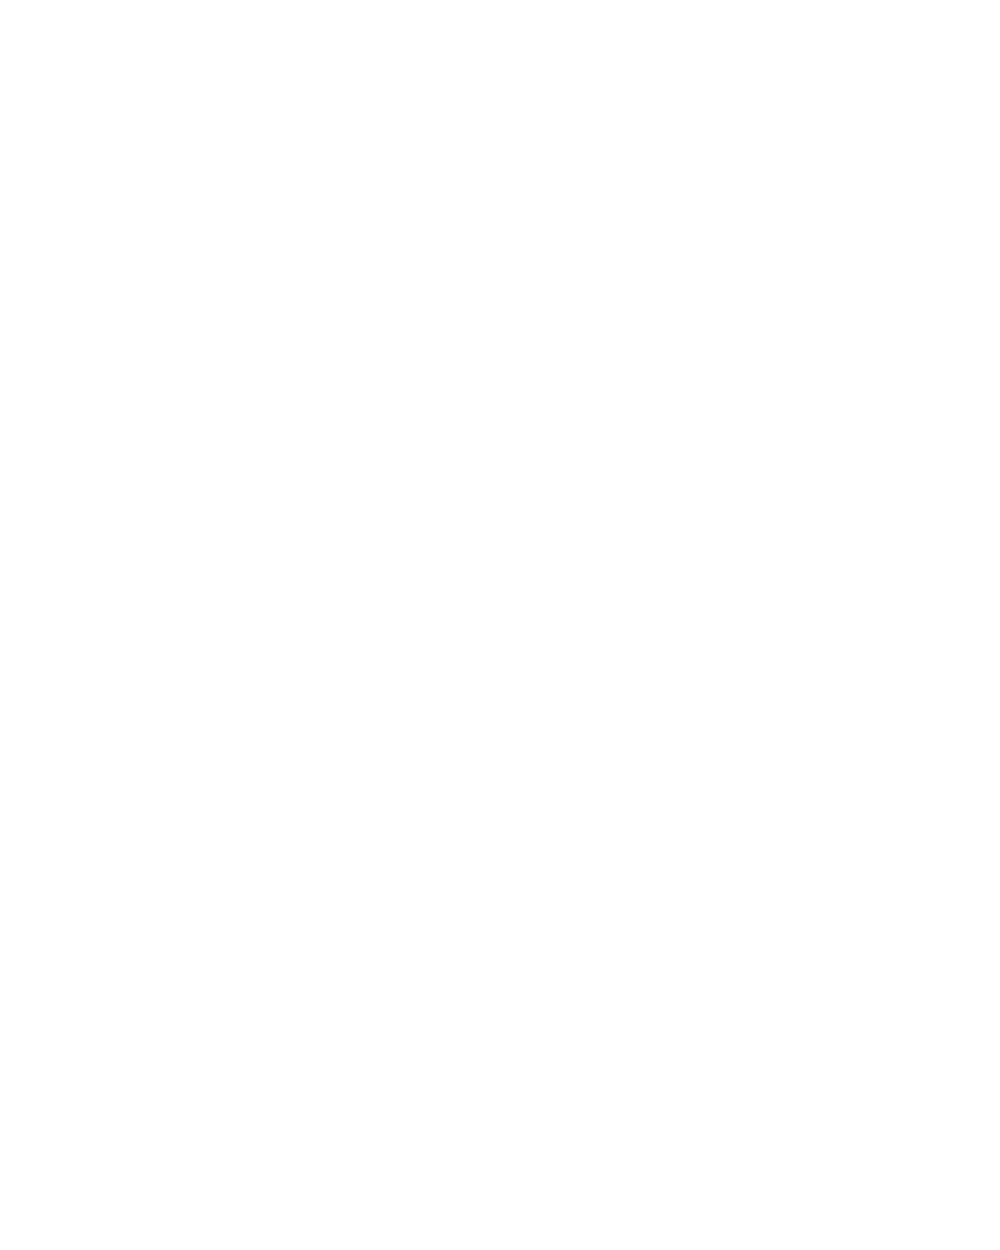

<IPython.core.display.Javascript object>


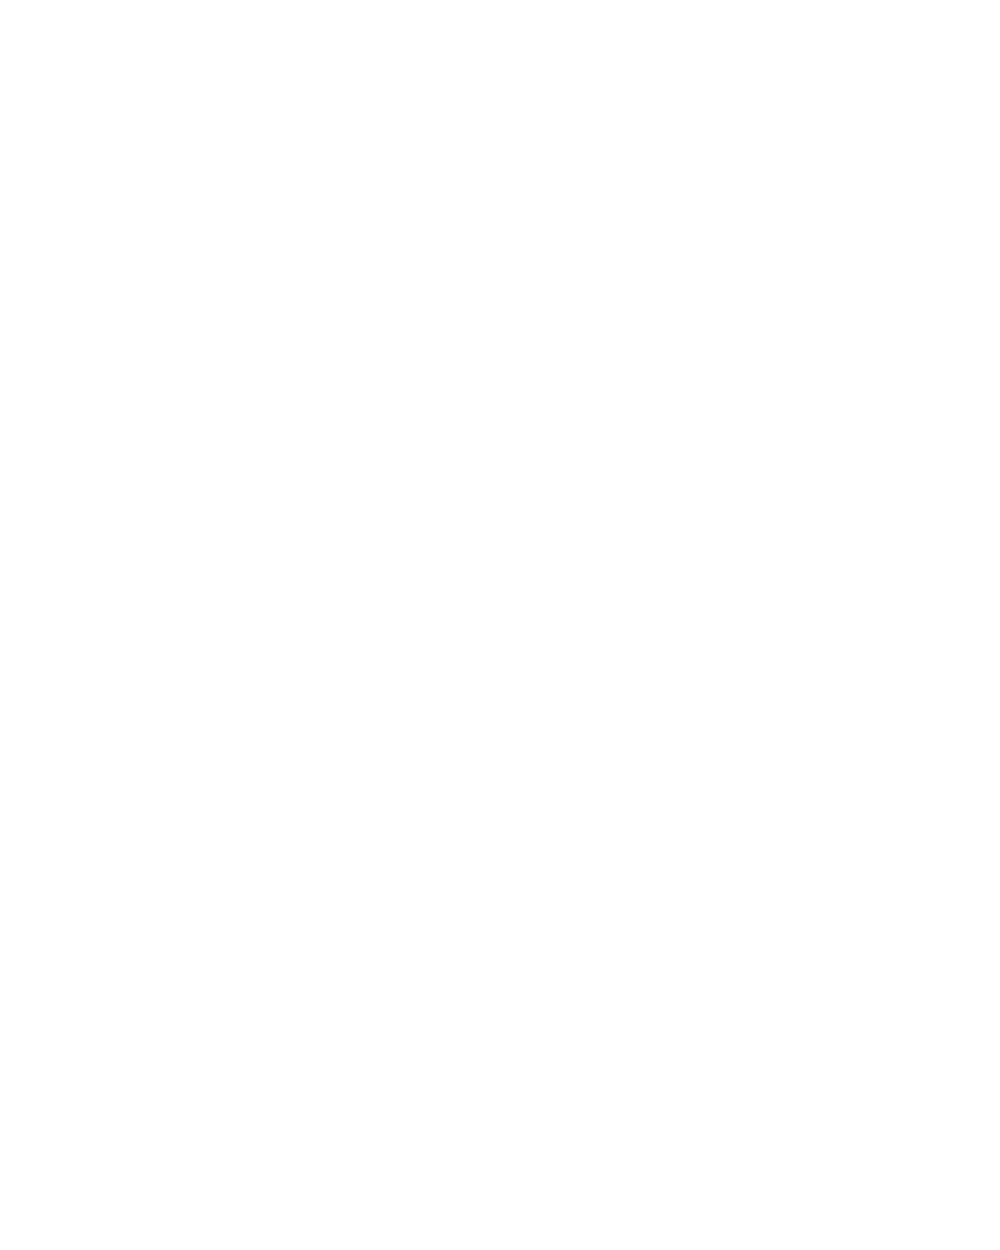

<IPython.core.display.Javascript object>


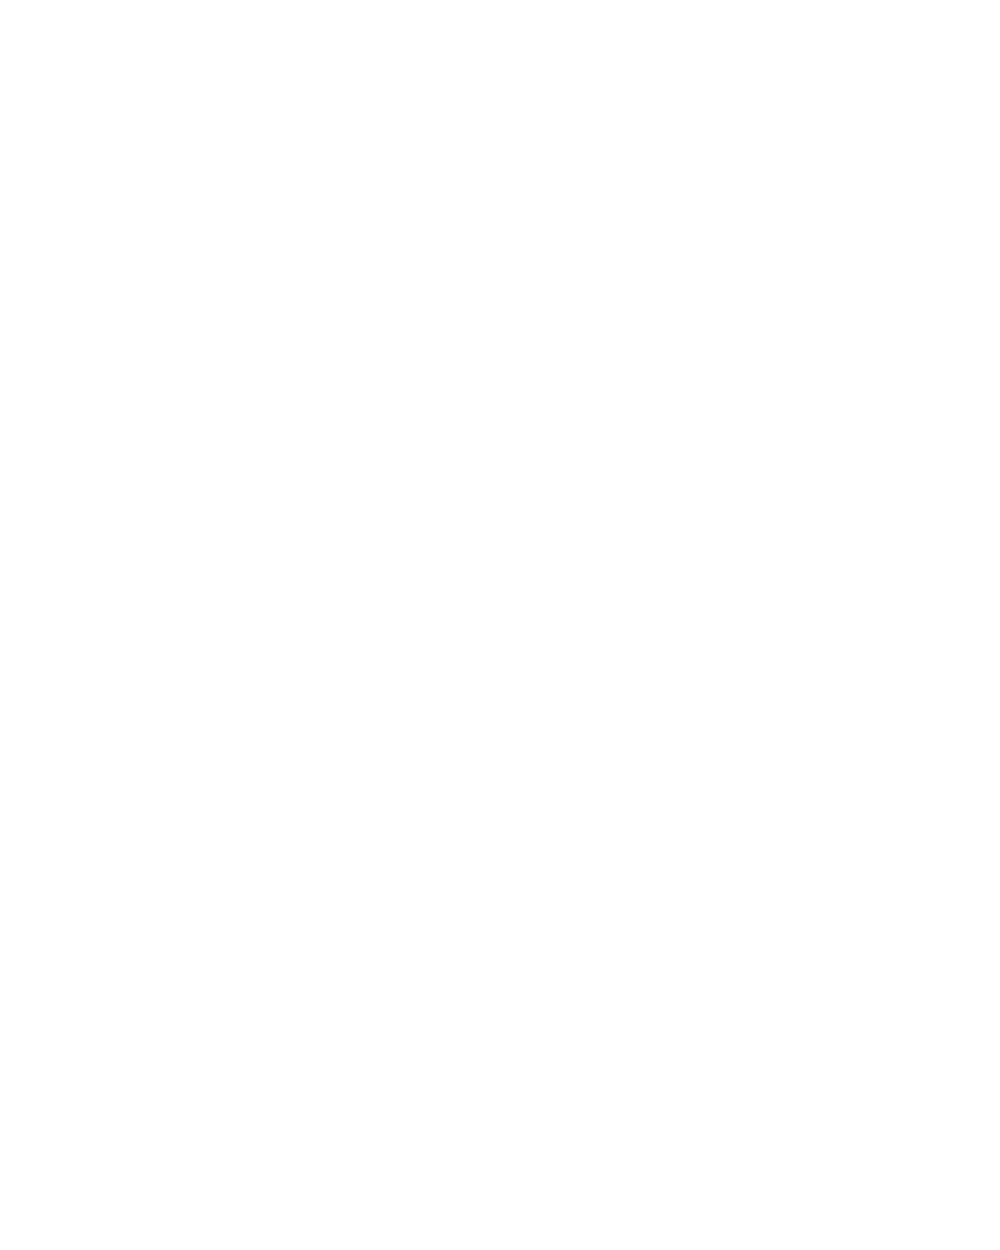

<IPython.core.display.Javascript object>


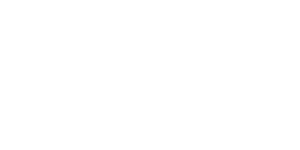

<IPython.core.display.Javascript object>


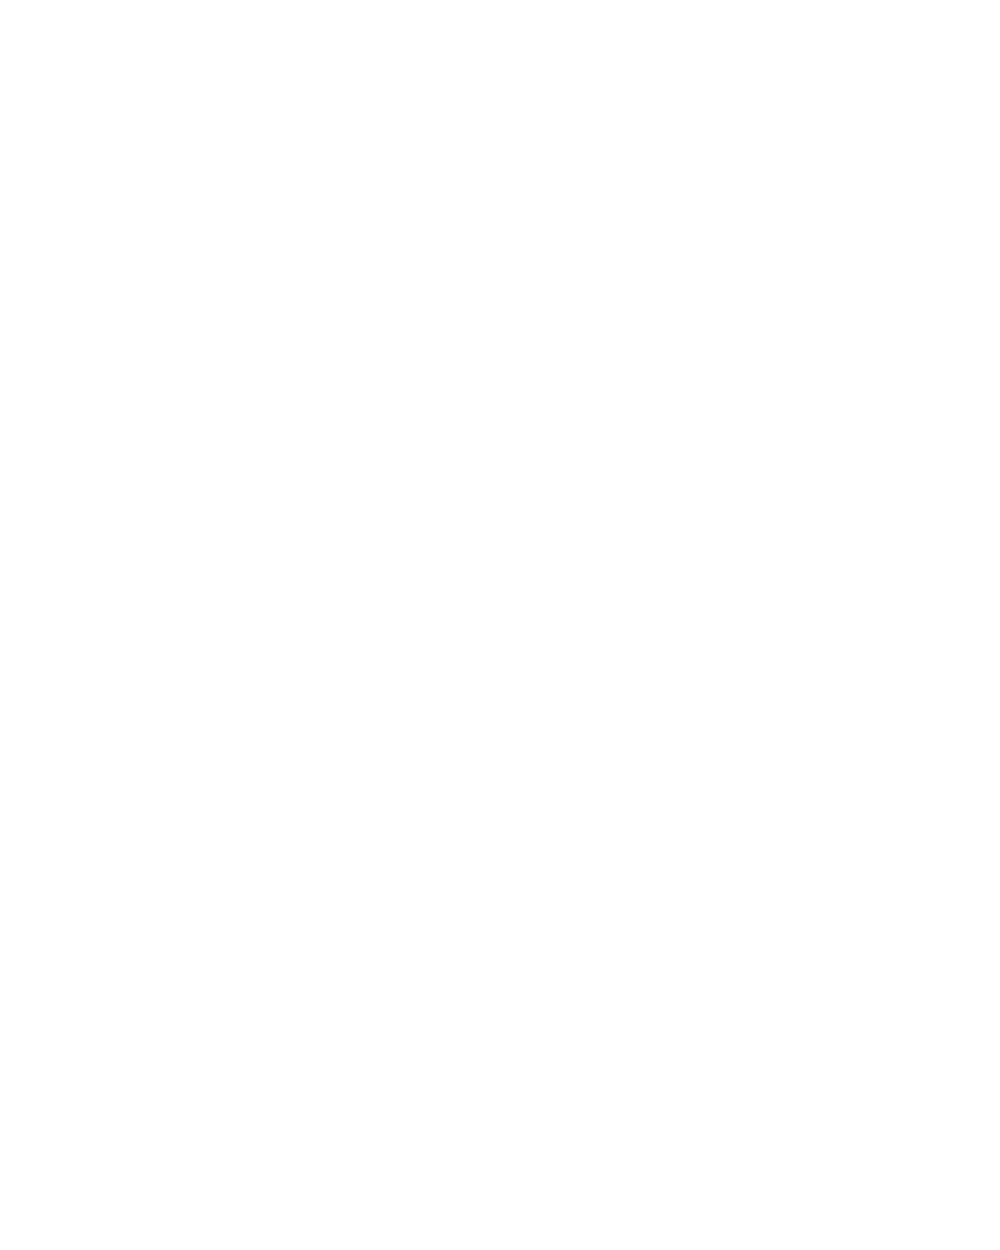

<IPython.core.display.Javascript object>


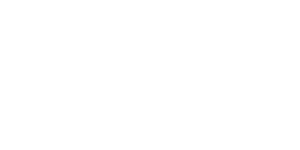

<IPython.core.display.Javascript object>


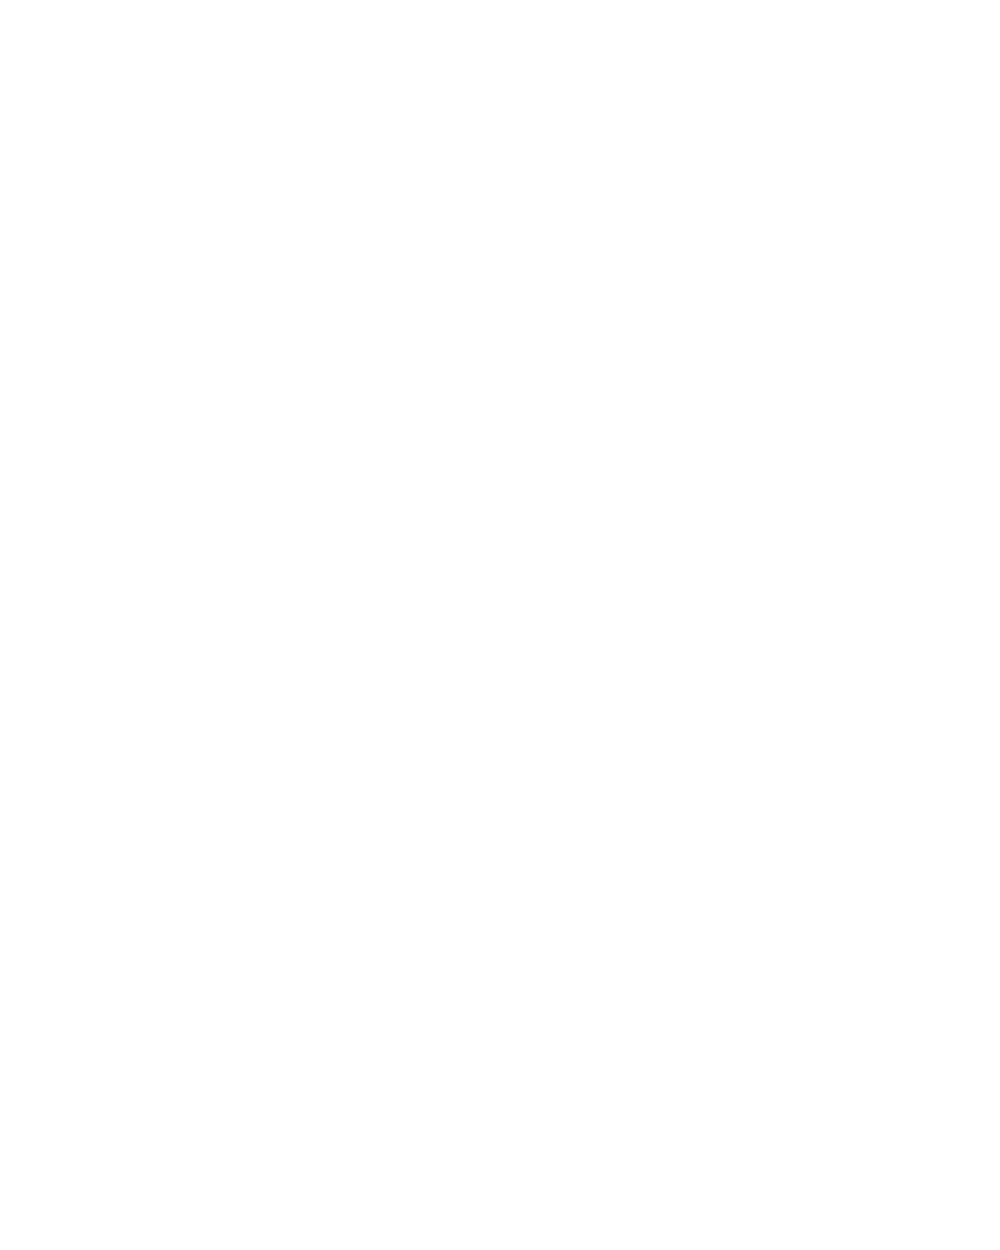

<IPython.core.display.Javascript object>


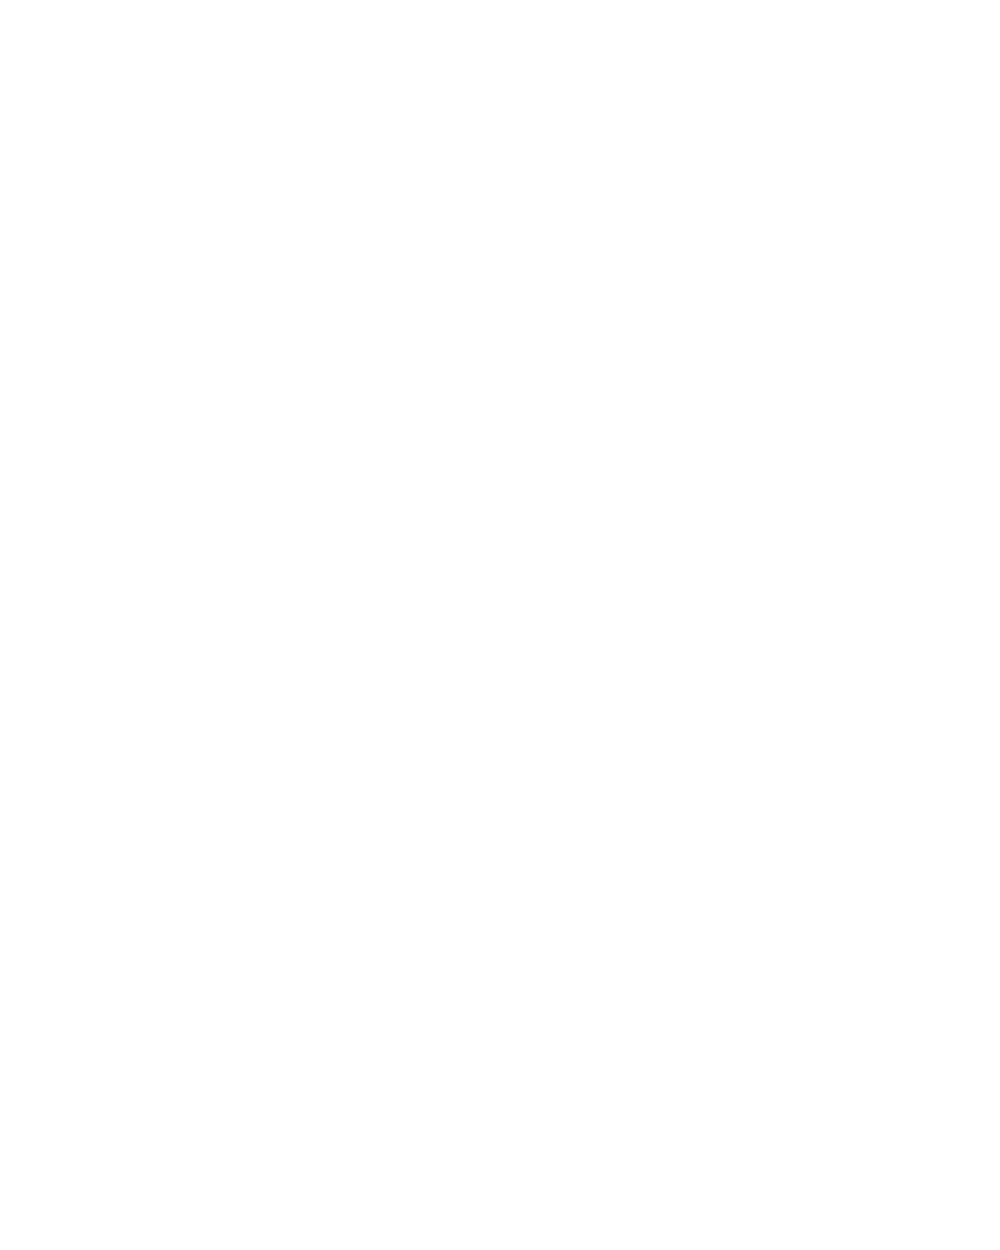

<IPython.core.display.Javascript object>


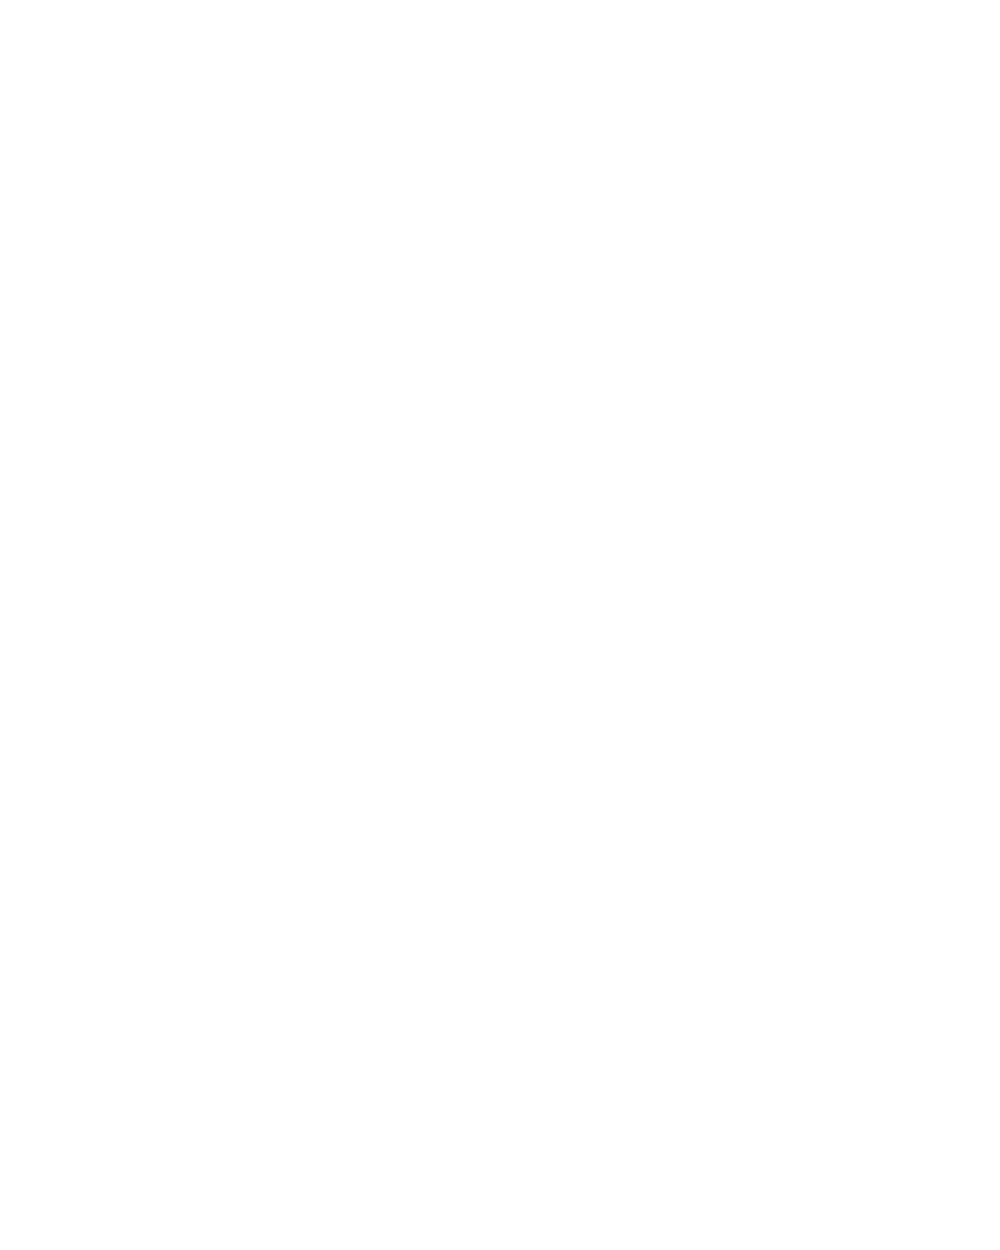

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


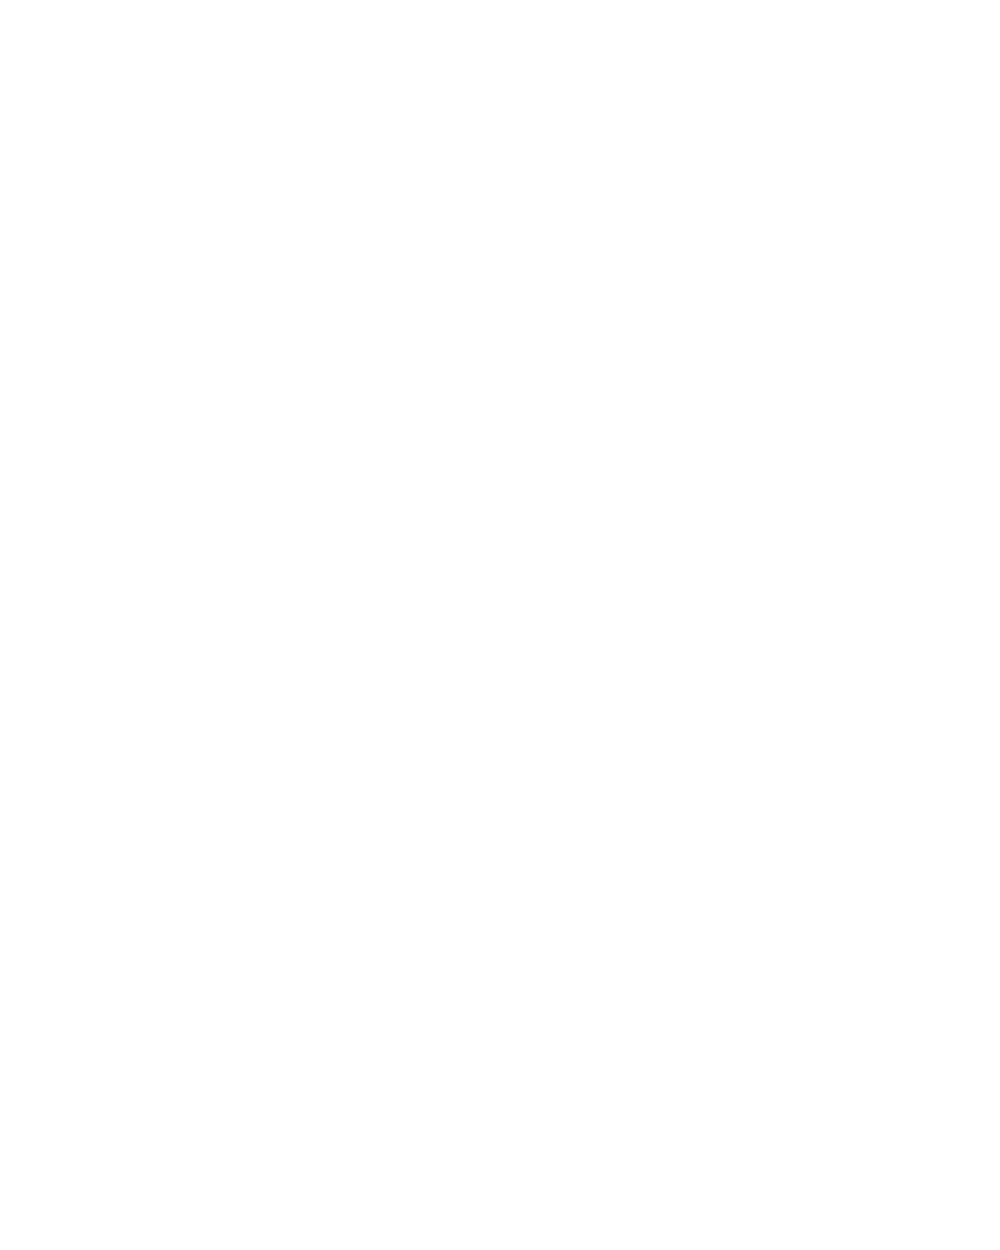

<IPython.core.display.Javascript object>


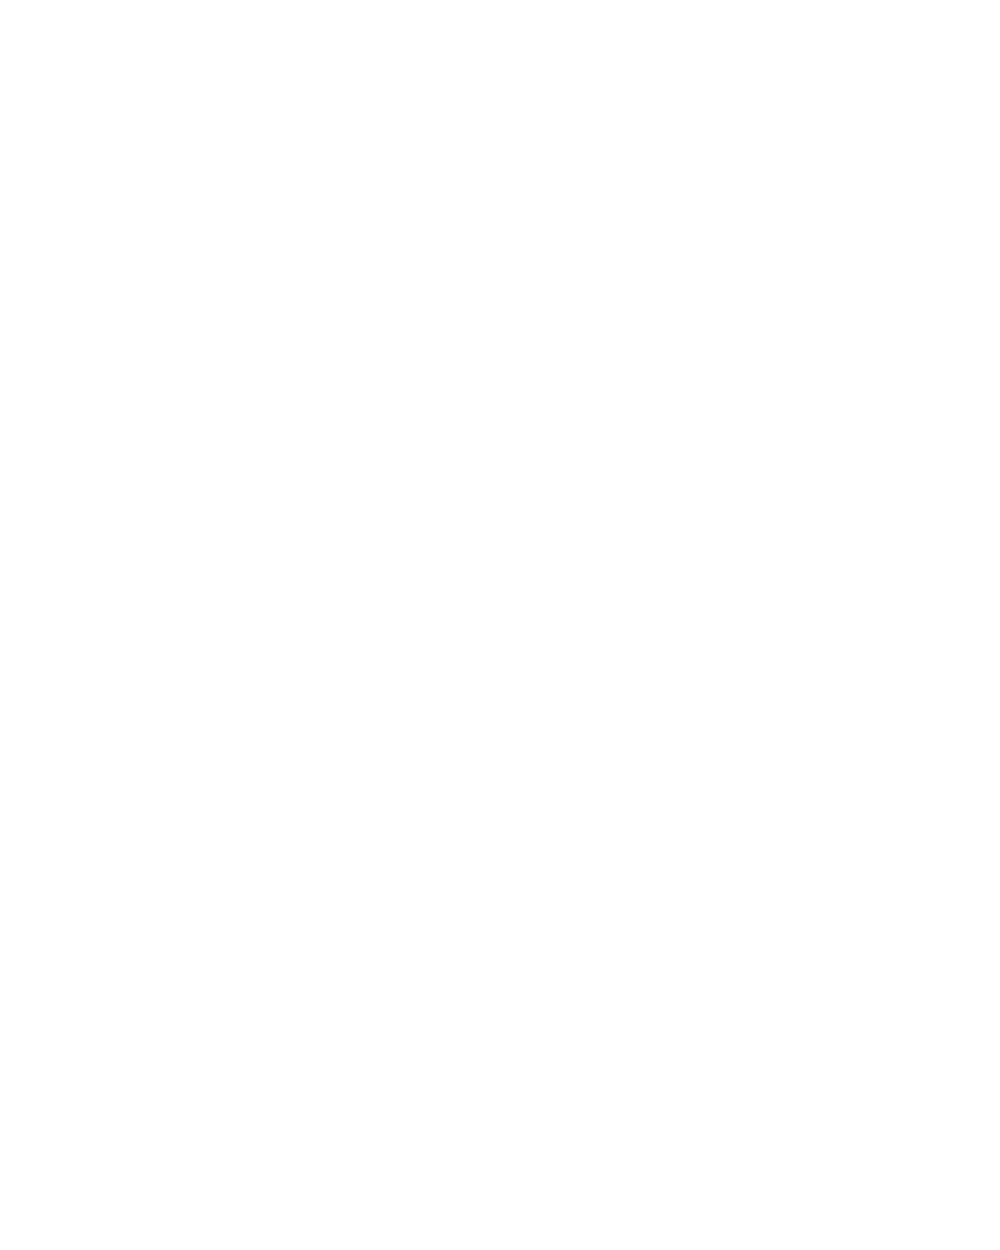

<IPython.core.display.Javascript object>


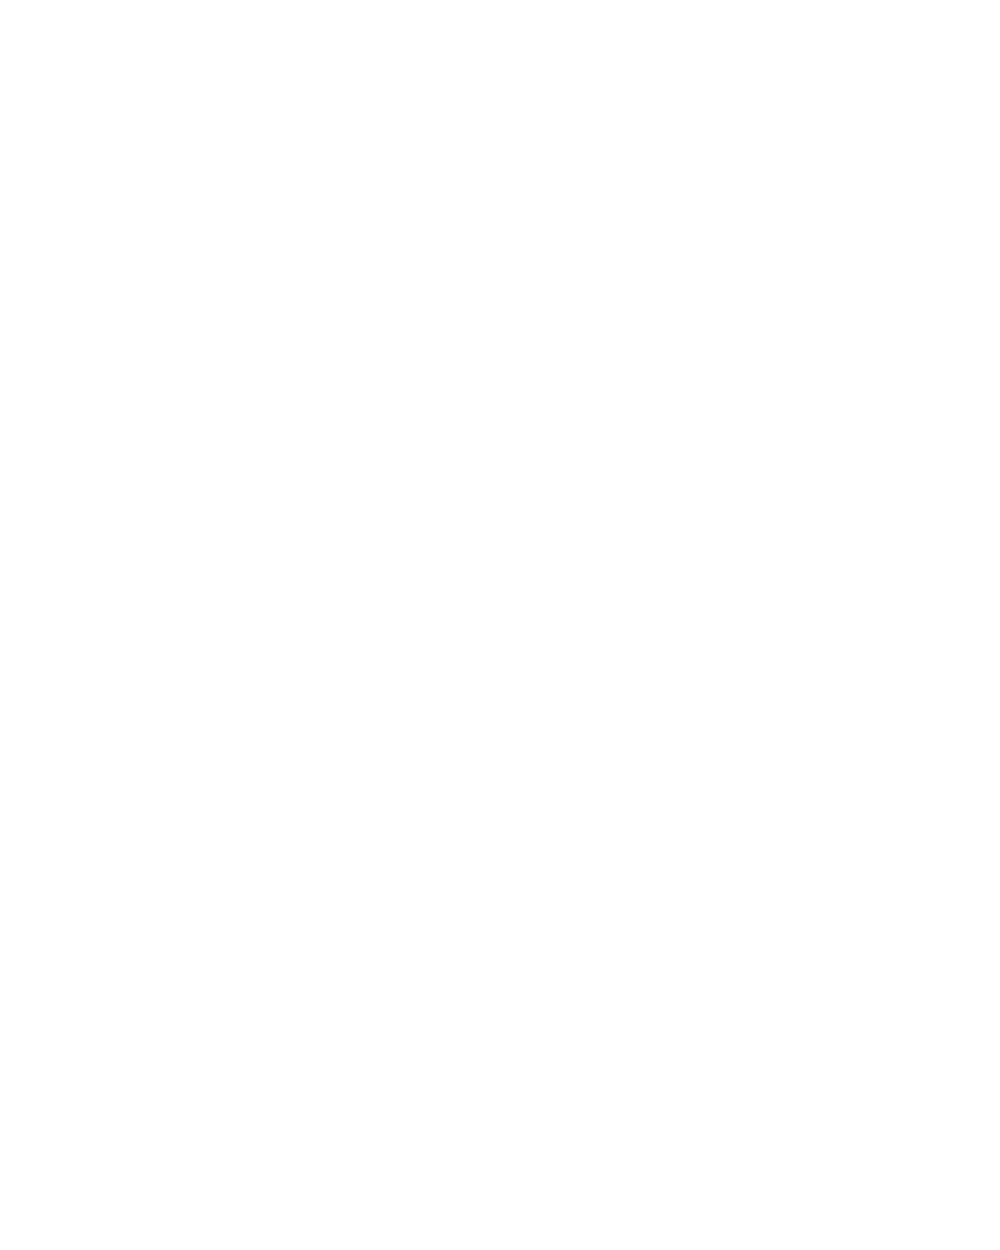

<IPython.core.display.Javascript object>


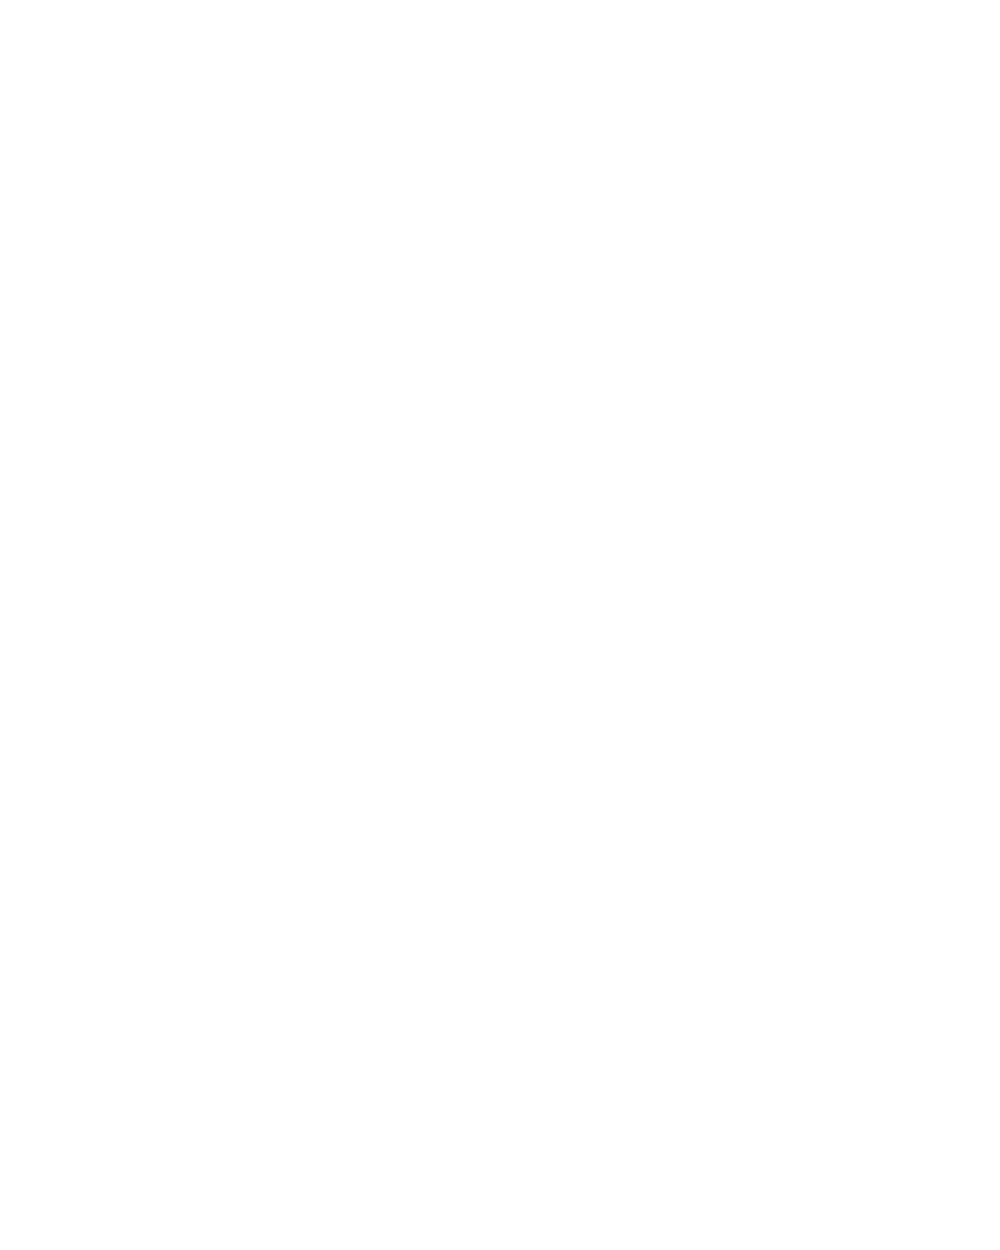

<IPython.core.display.Javascript object>


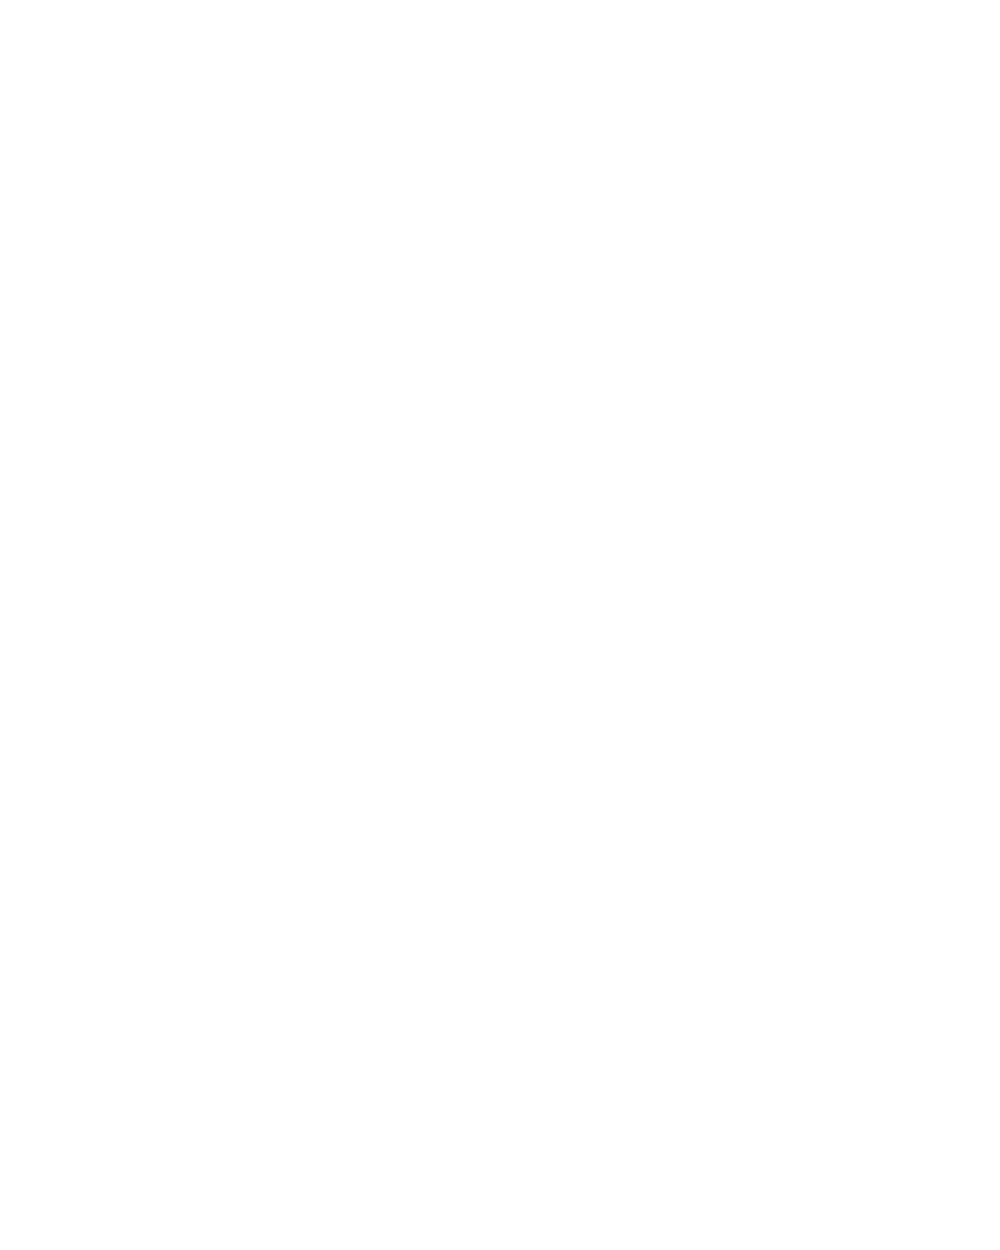

<IPython.core.display.Javascript object>


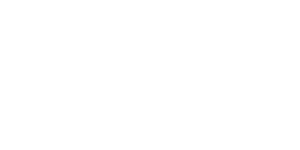

<IPython.core.display.Javascript object>


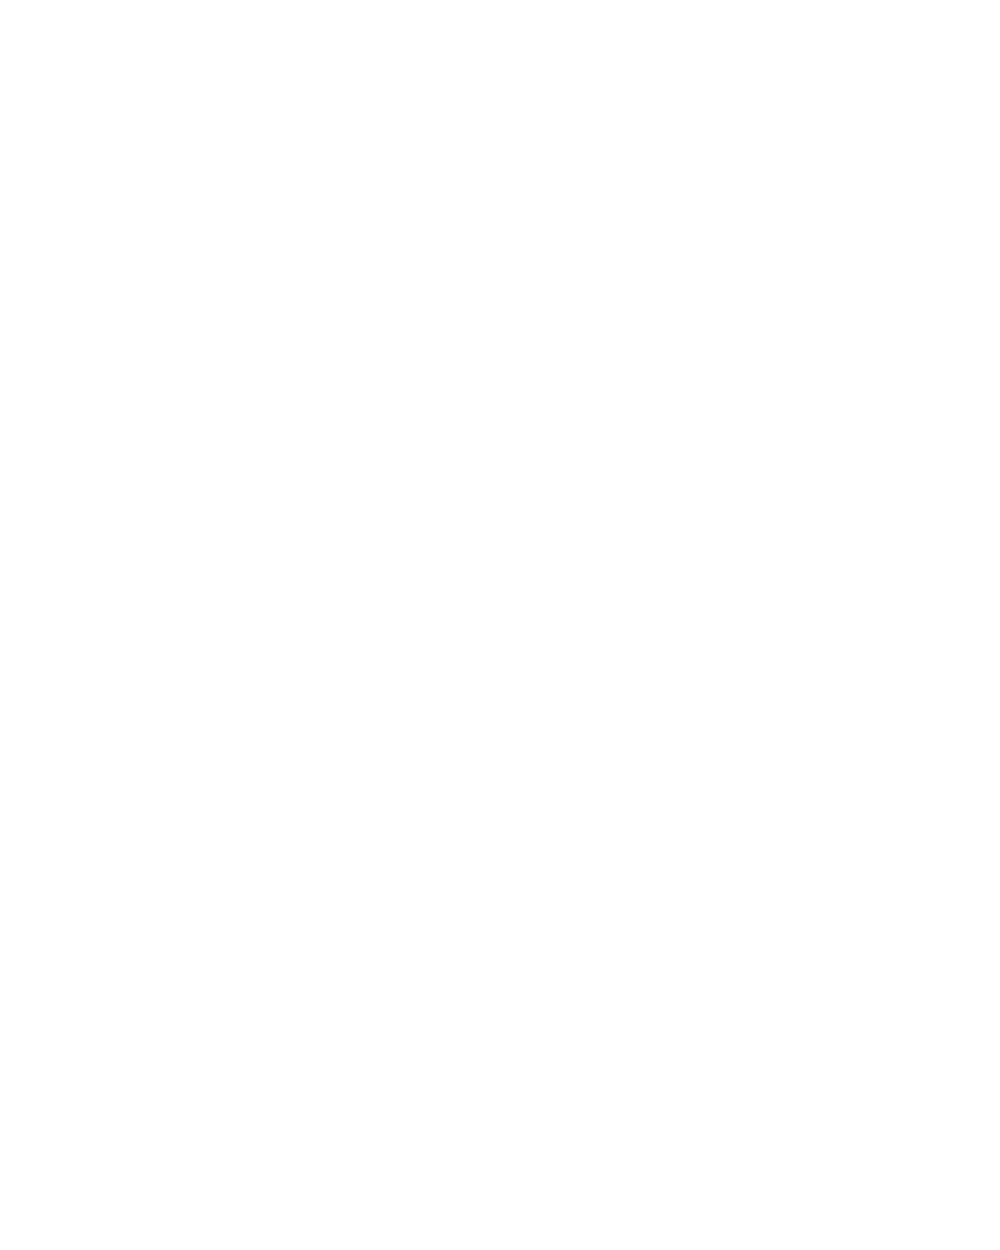

<IPython.core.display.Javascript object>


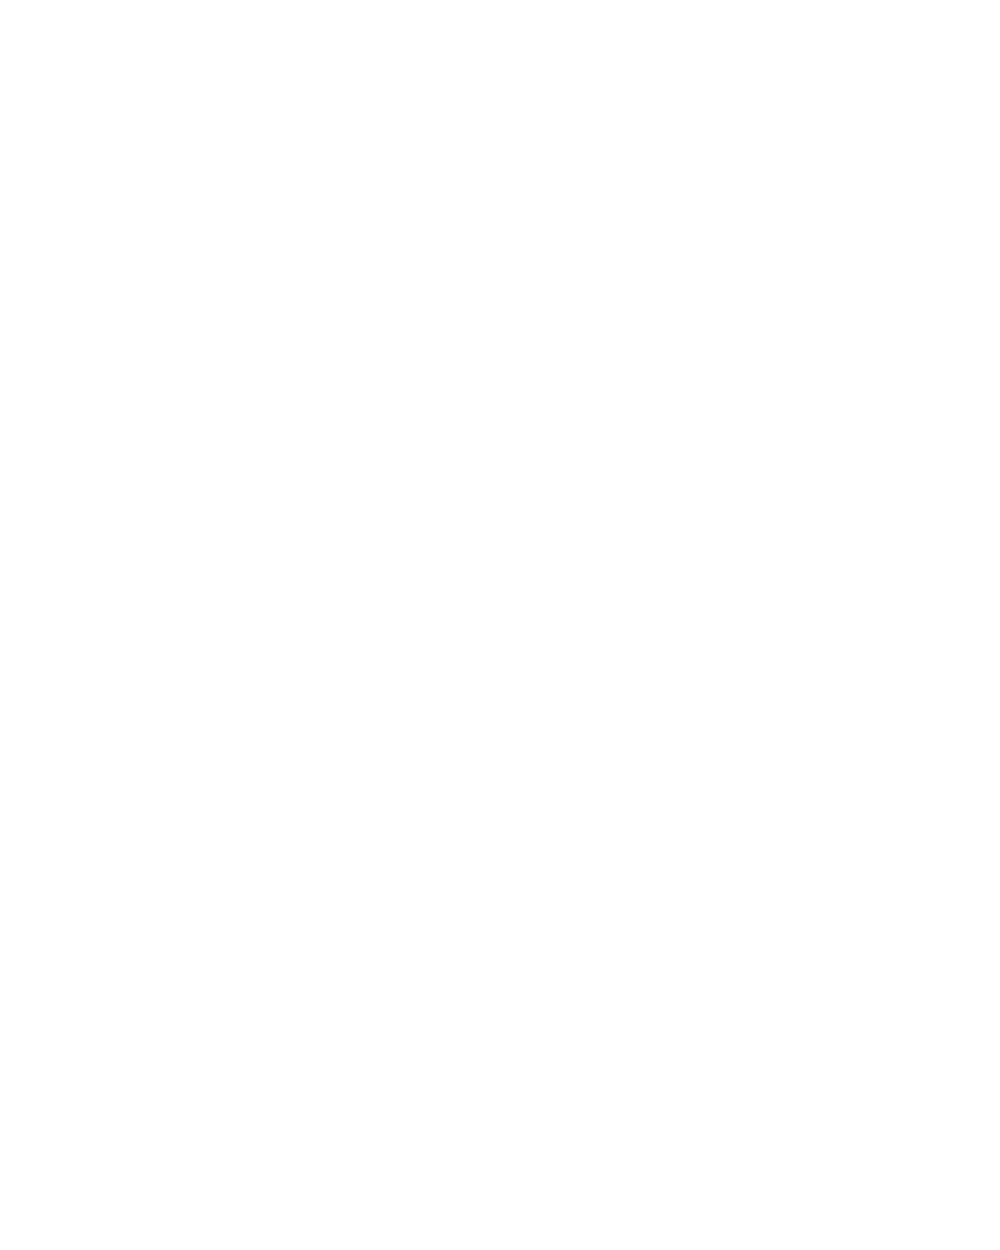

<IPython.core.display.Javascript object>


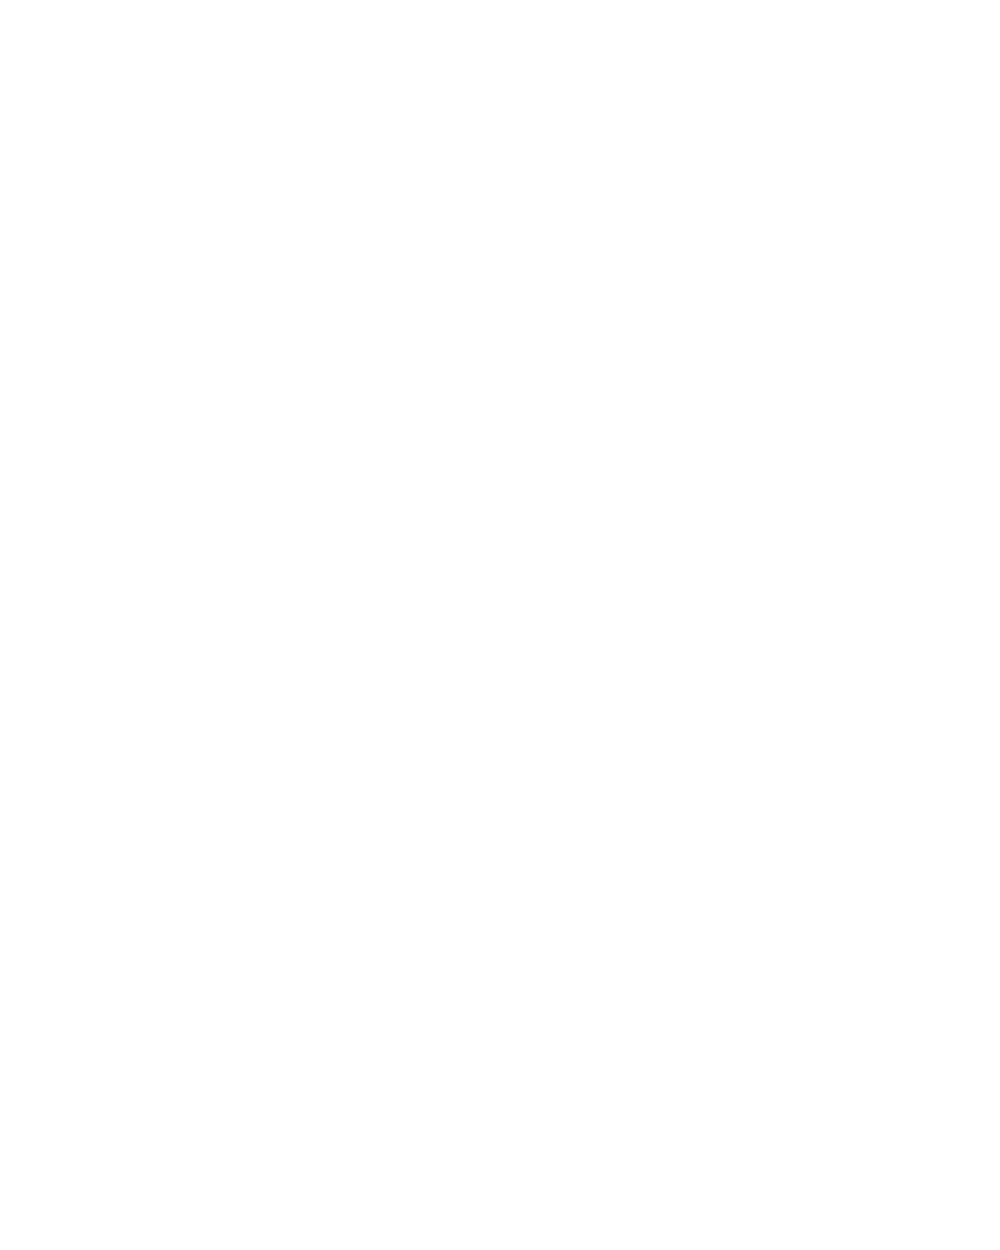

<IPython.core.display.Javascript object>


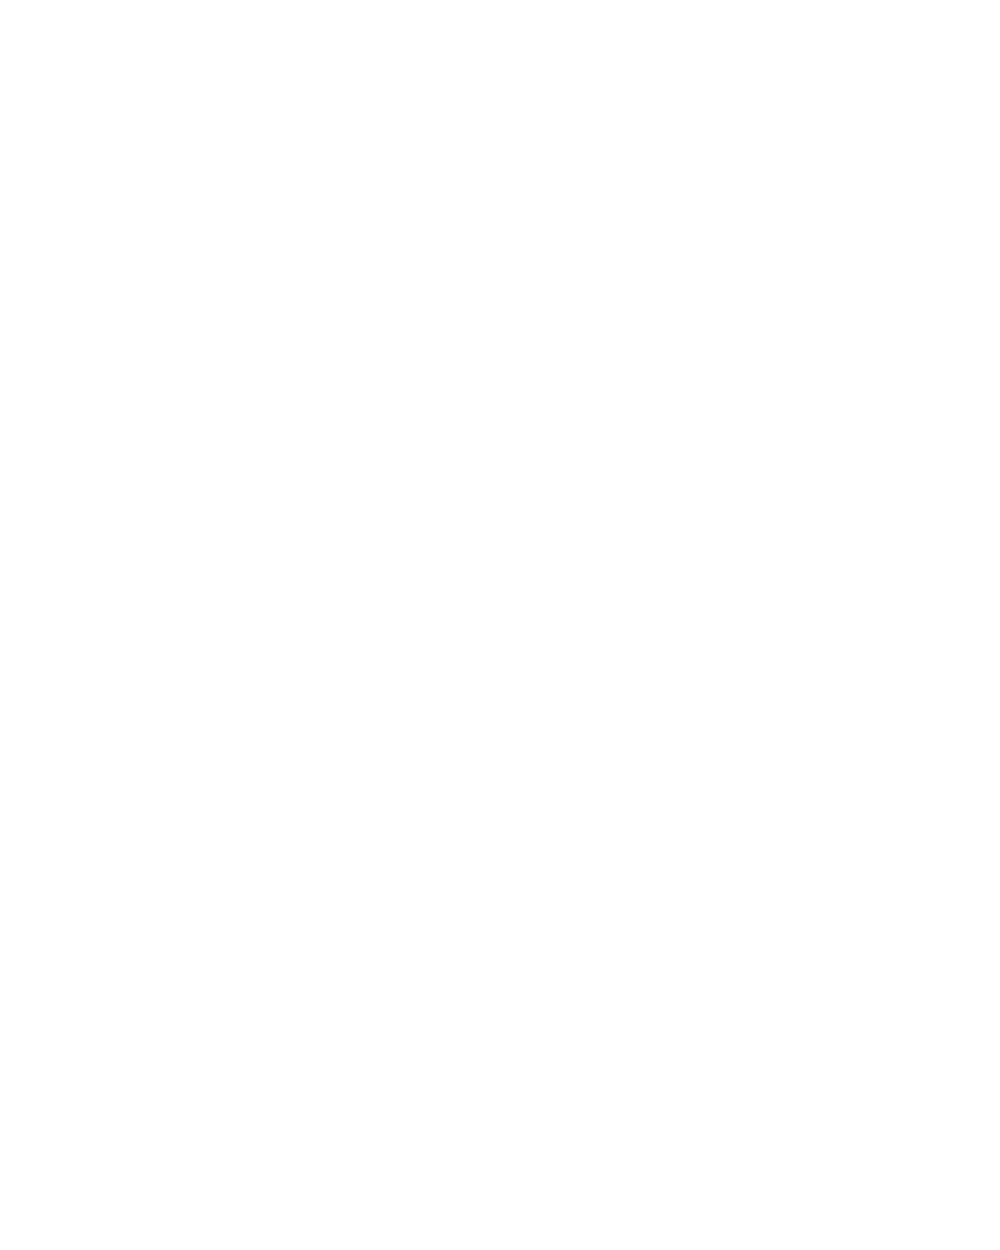

<IPython.core.display.Javascript object>


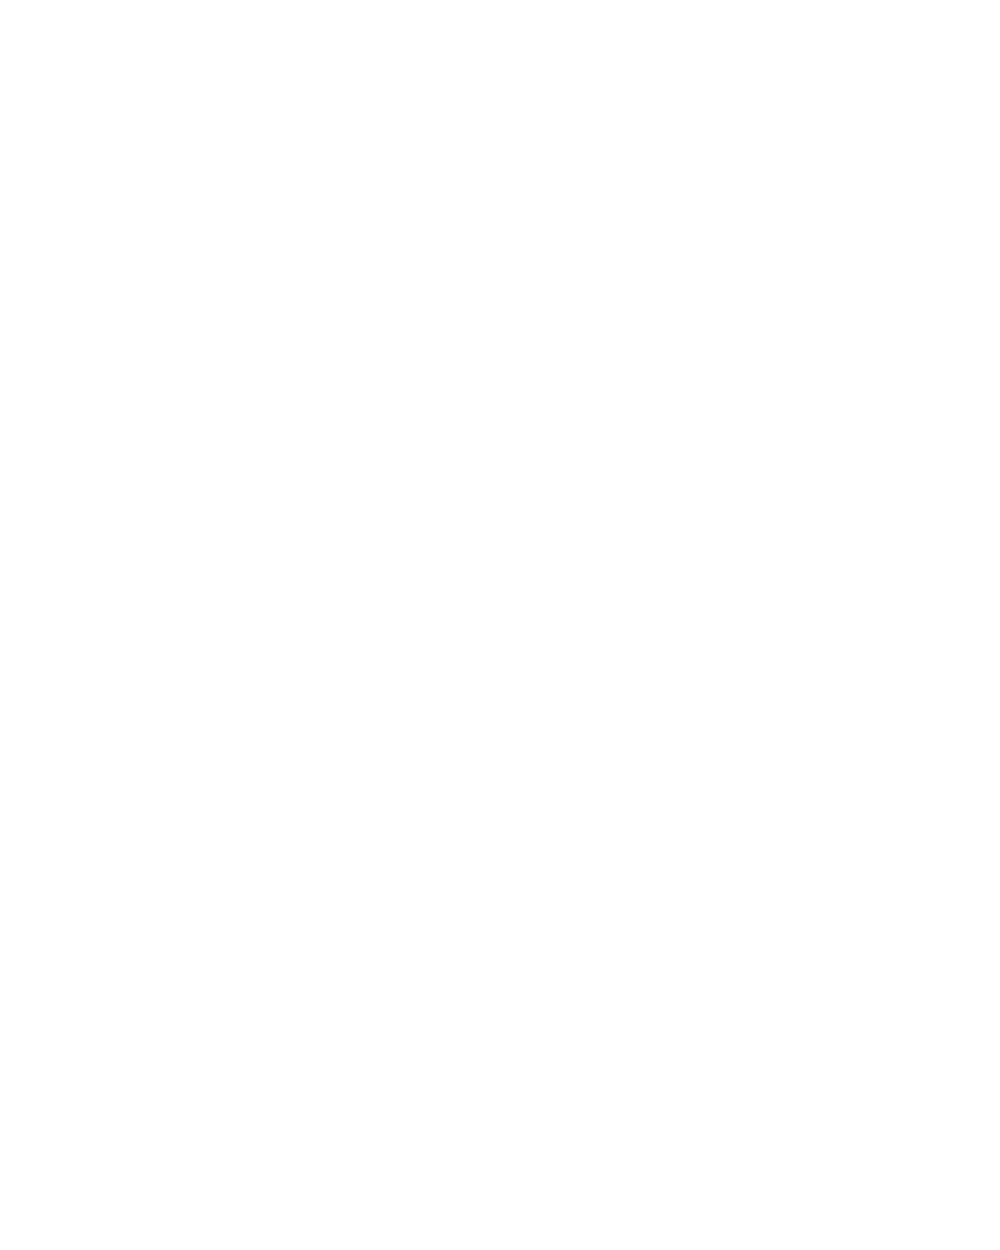

<IPython.core.display.Javascript object>


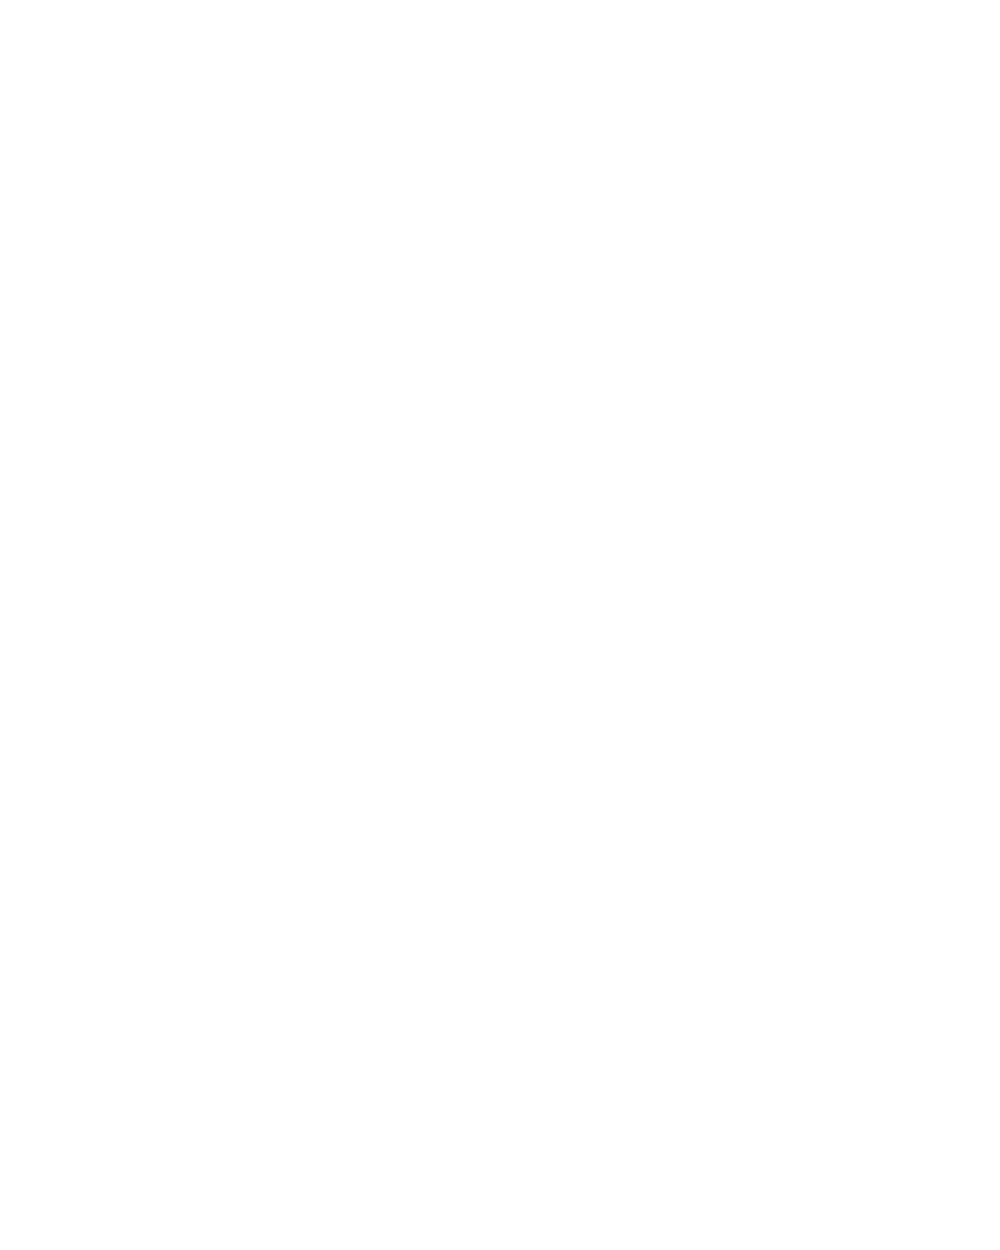

<IPython.core.display.Javascript object>


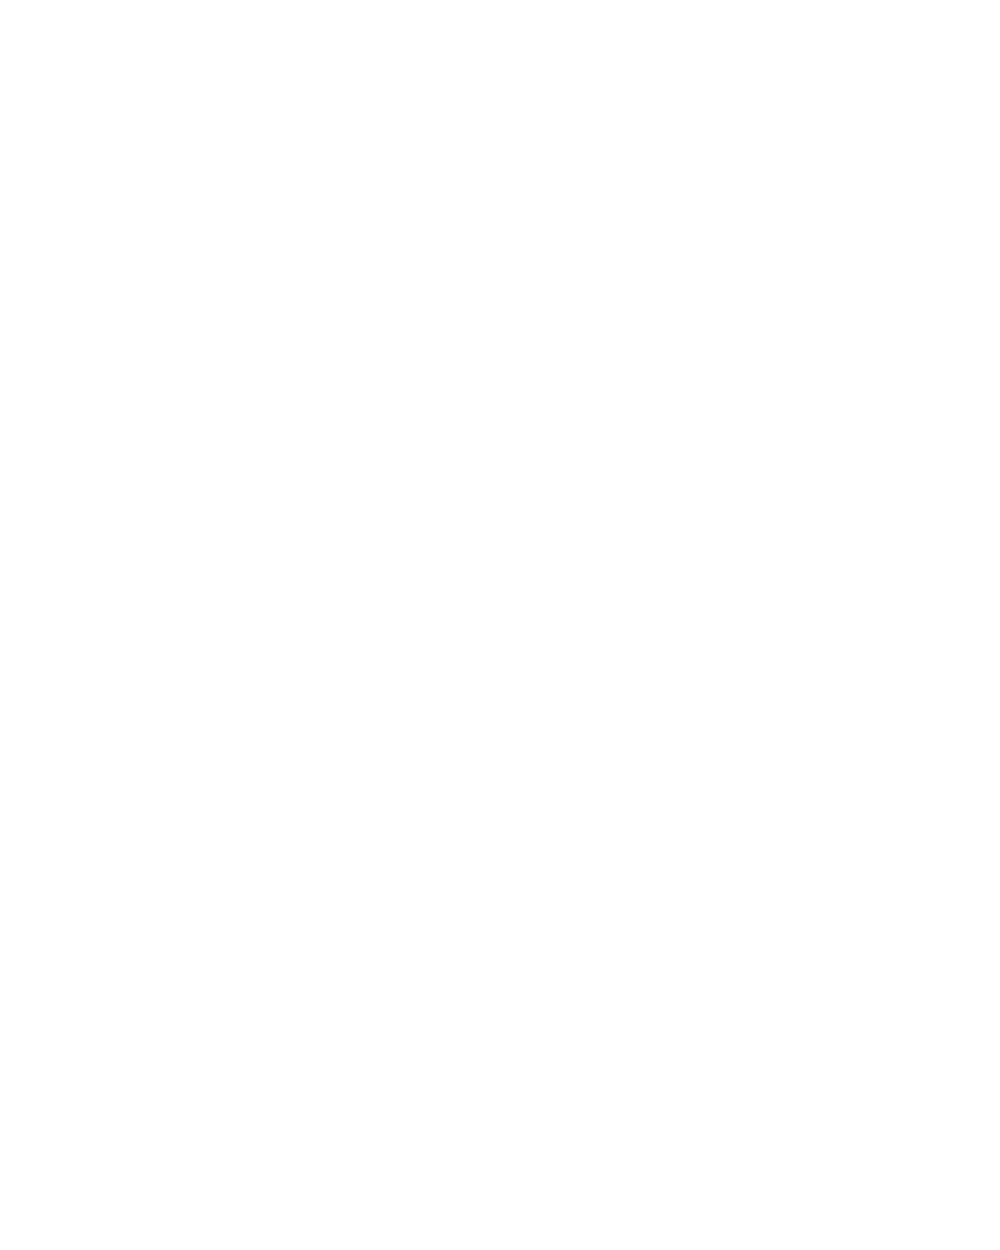

<IPython.core.display.Javascript object>


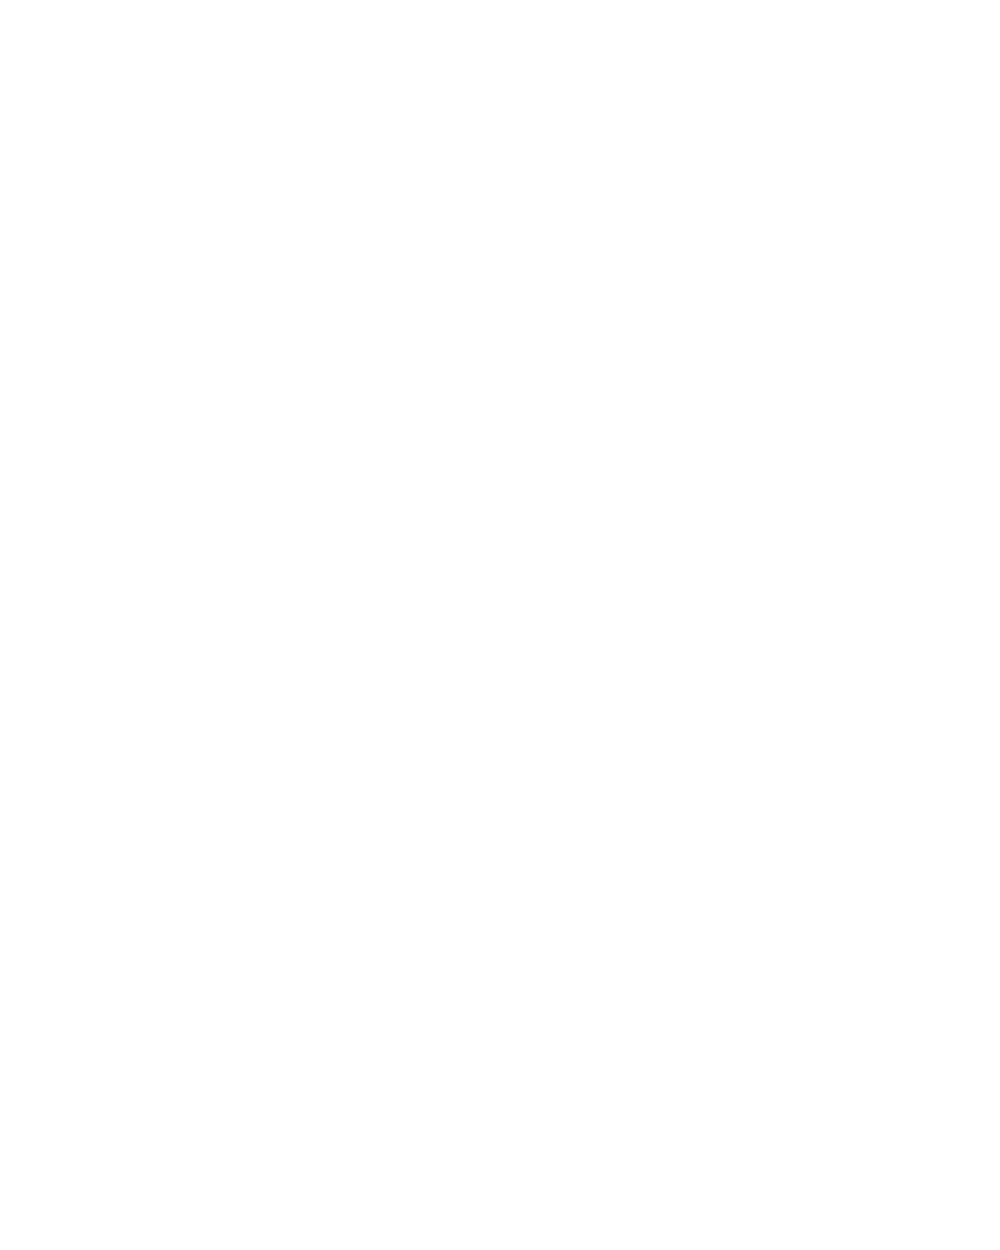

<IPython.core.display.Javascript object>


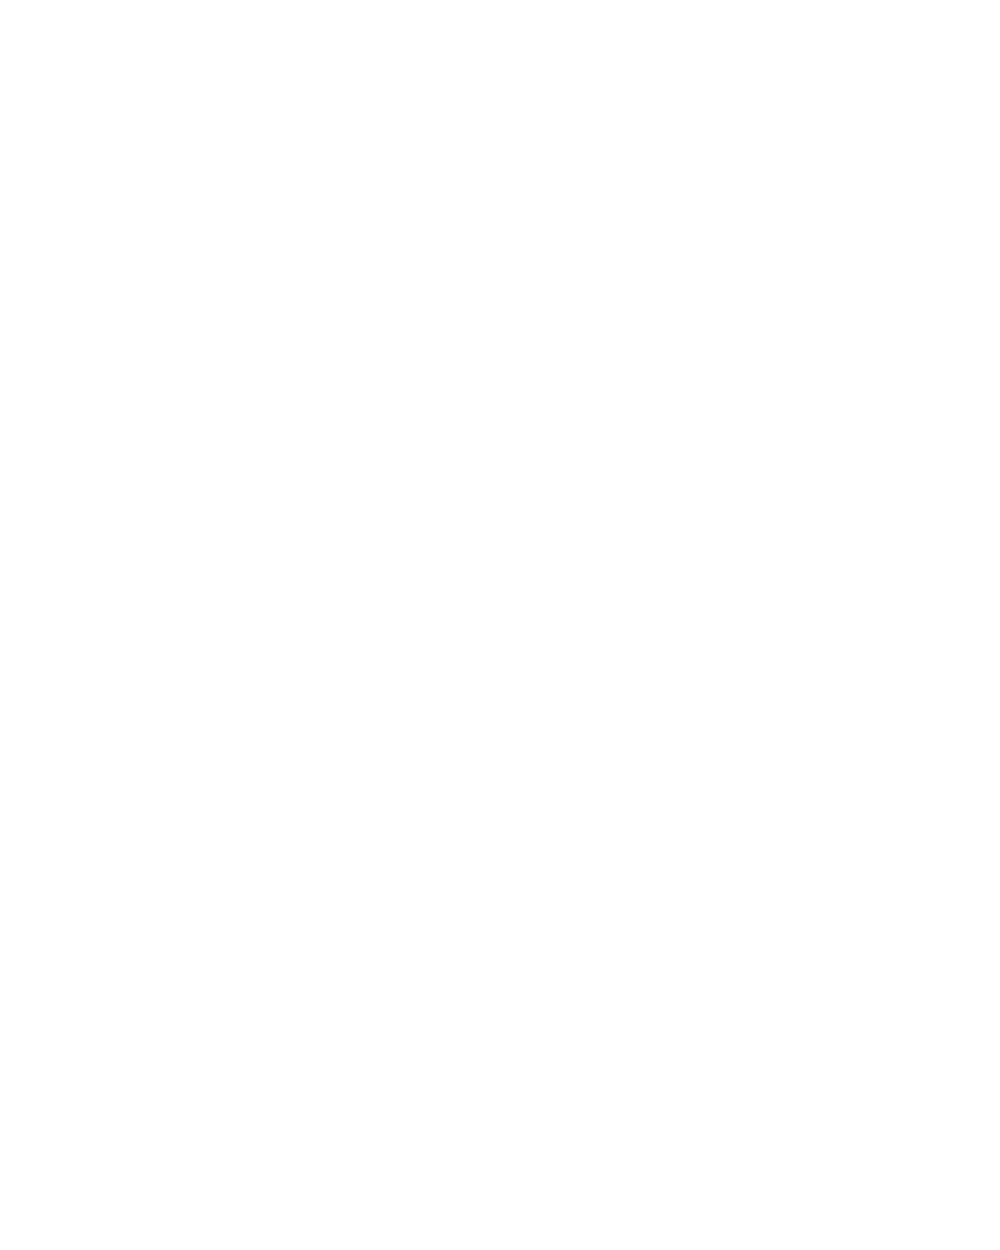

<IPython.core.display.Javascript object>


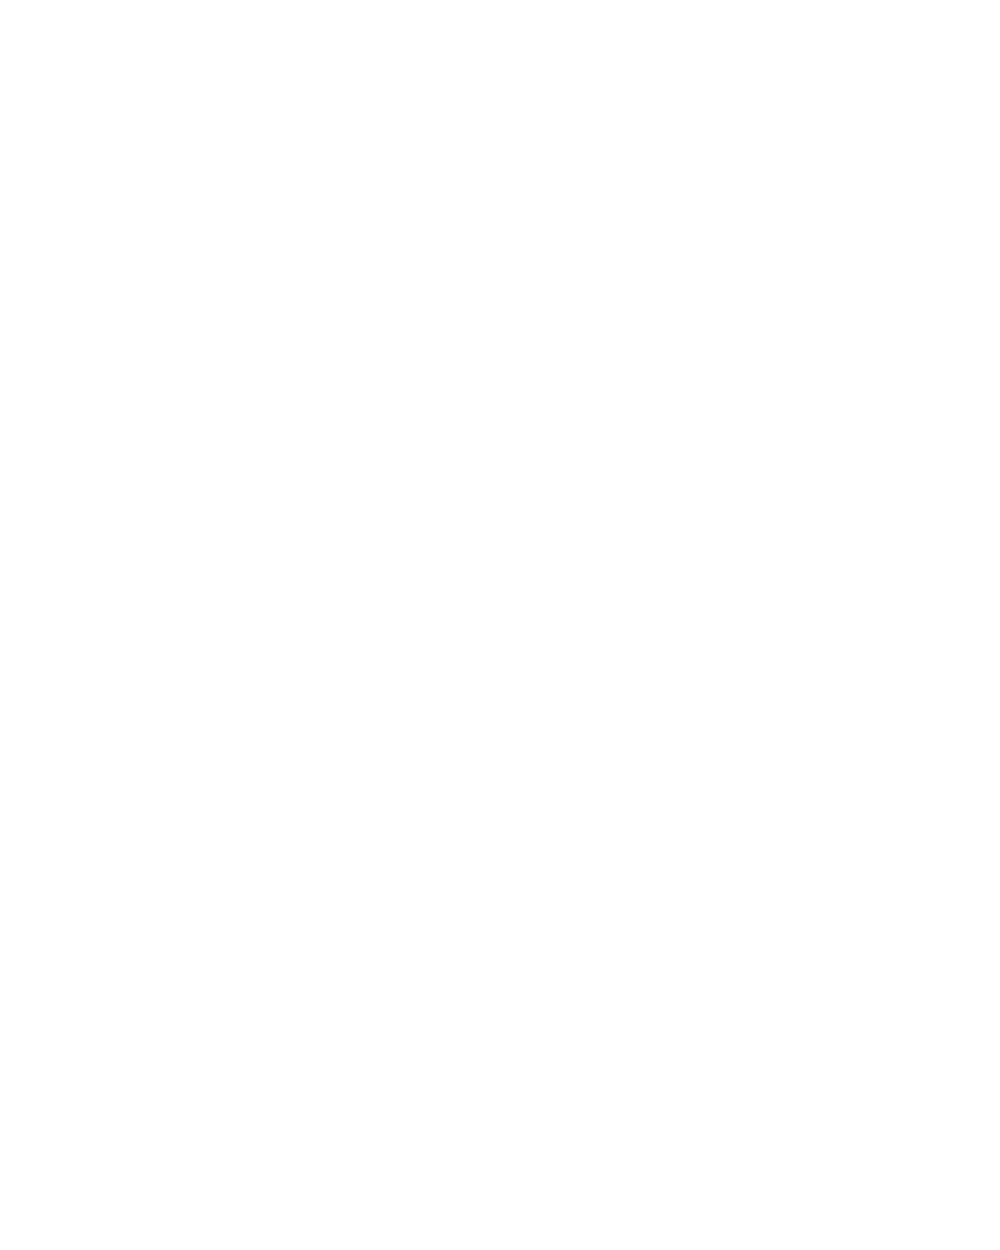

<IPython.core.display.Javascript object>


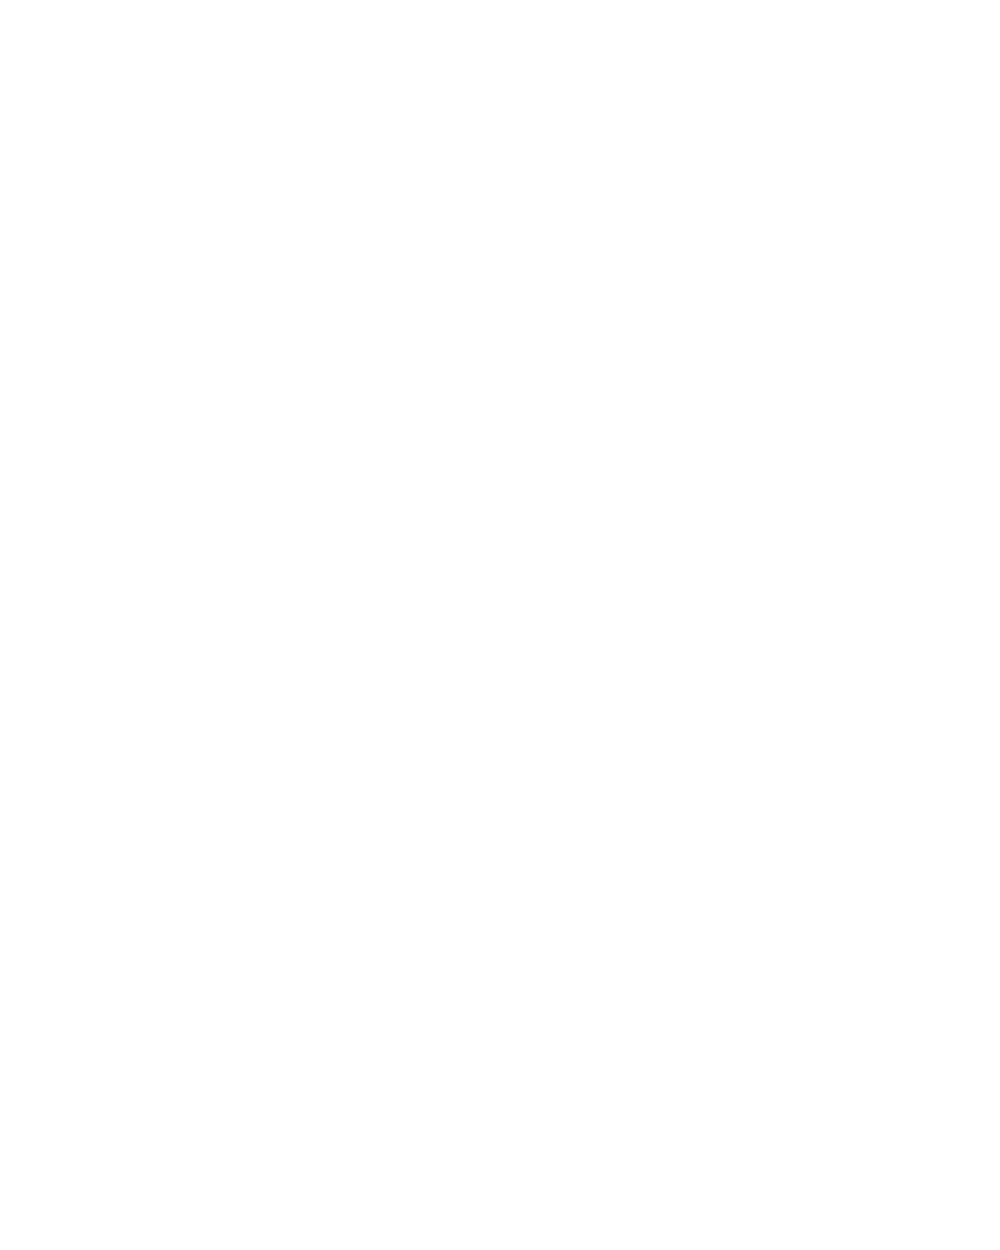

<IPython.core.display.Javascript object>


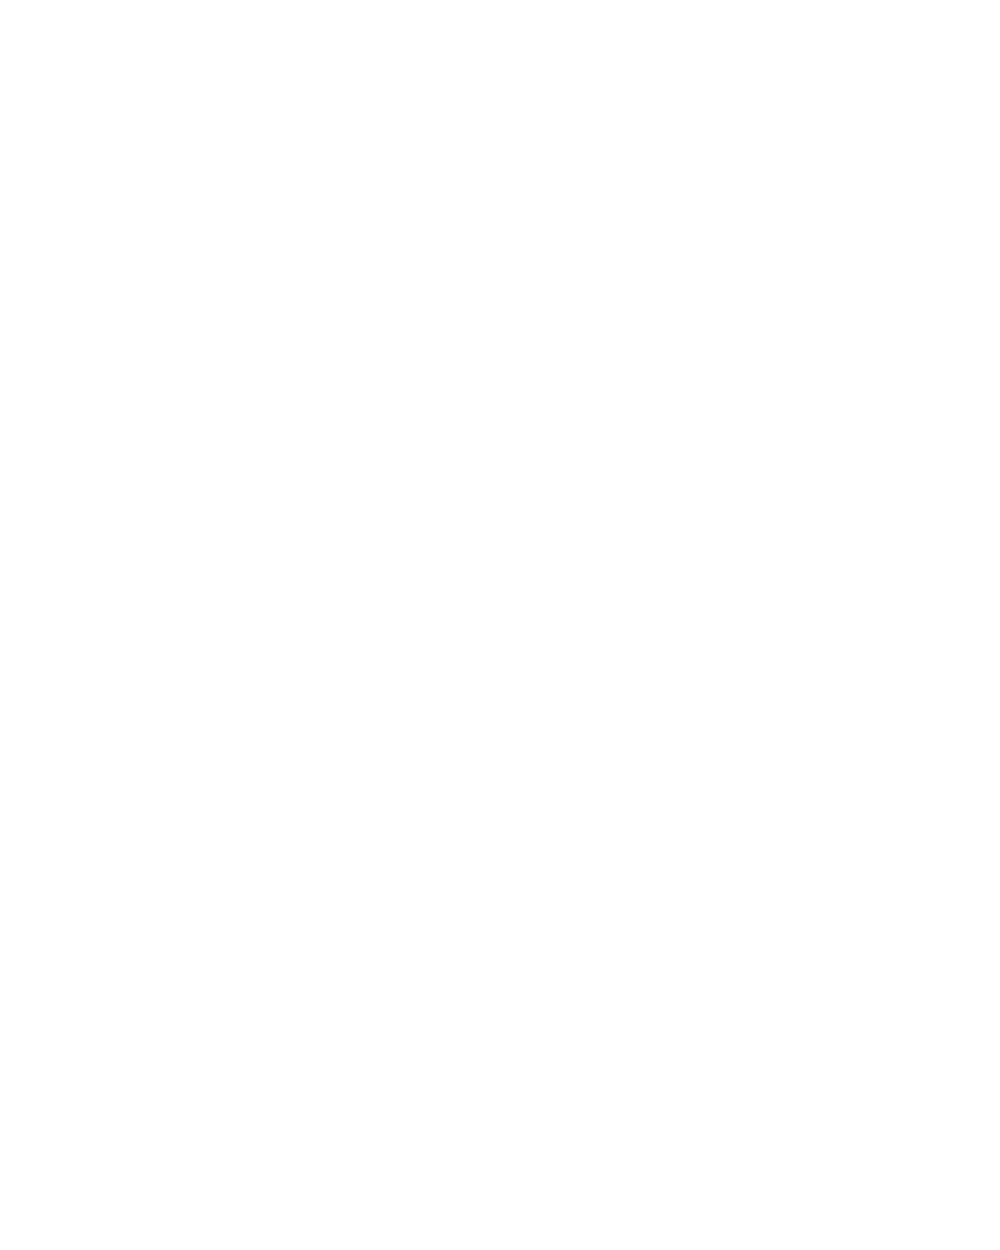

<IPython.core.display.Javascript object>


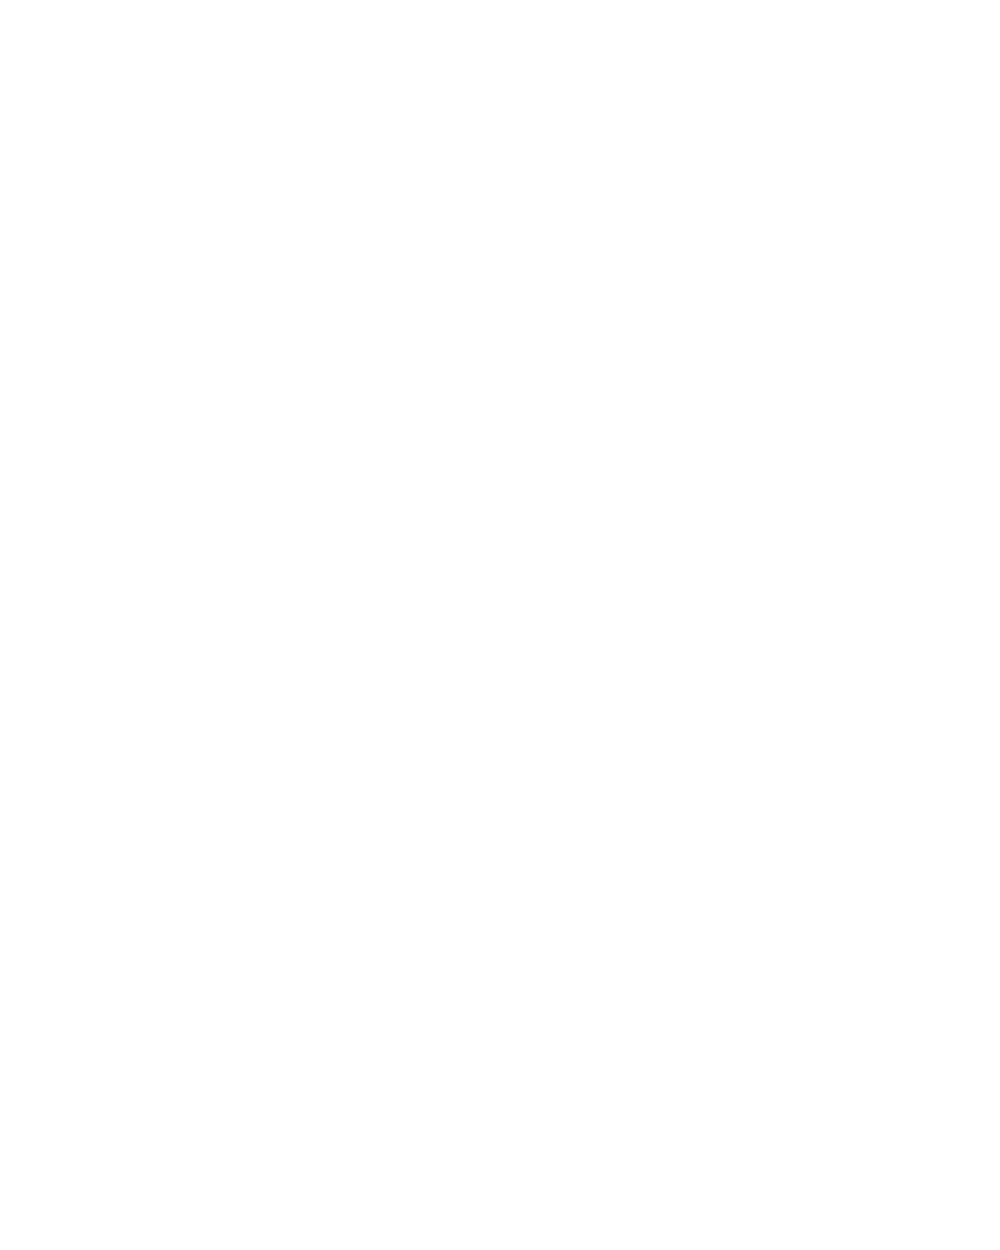

<IPython.core.display.Javascript object>


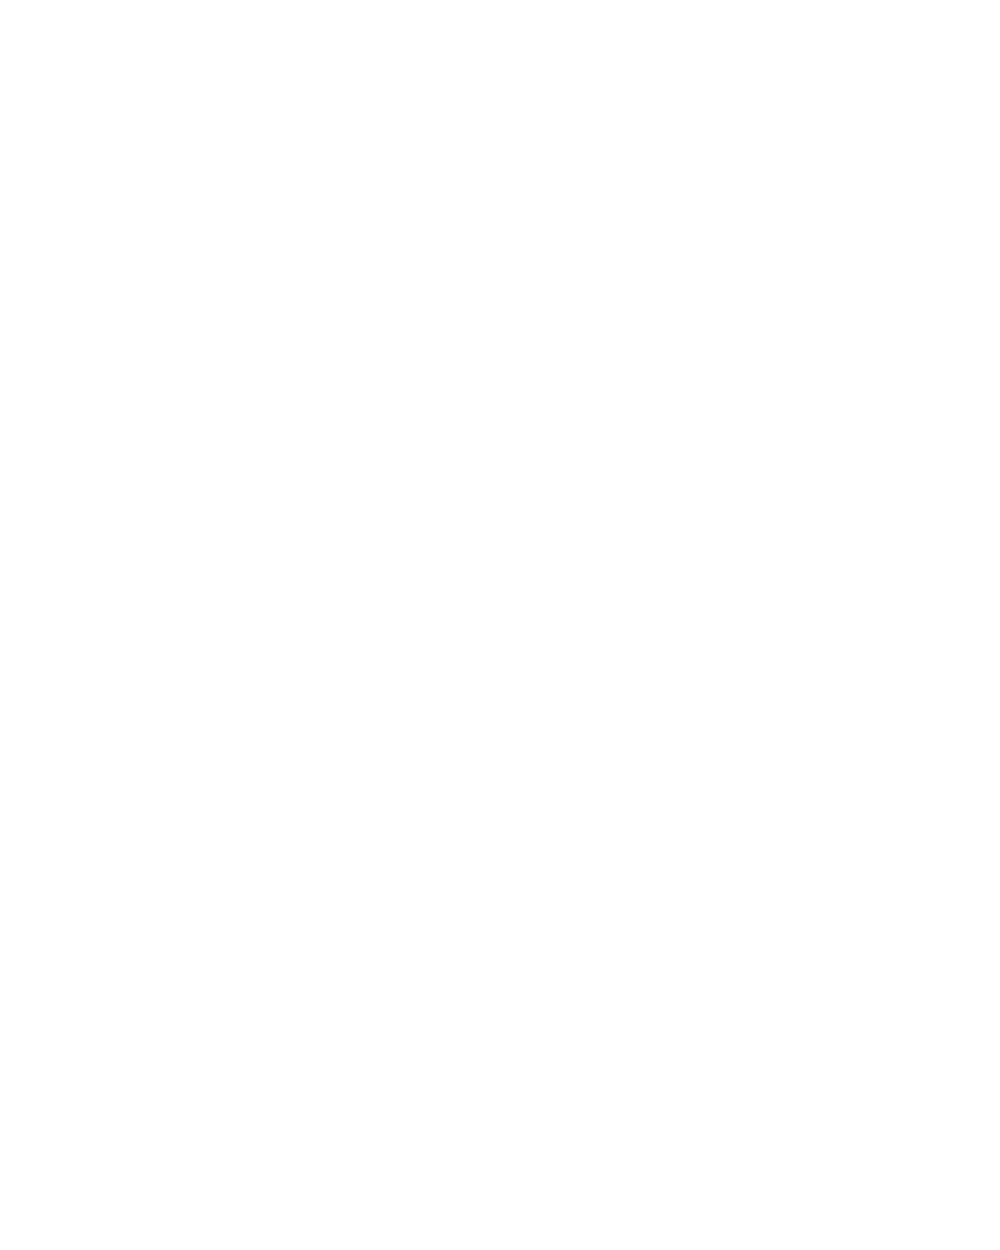

<IPython.core.display.Javascript object>


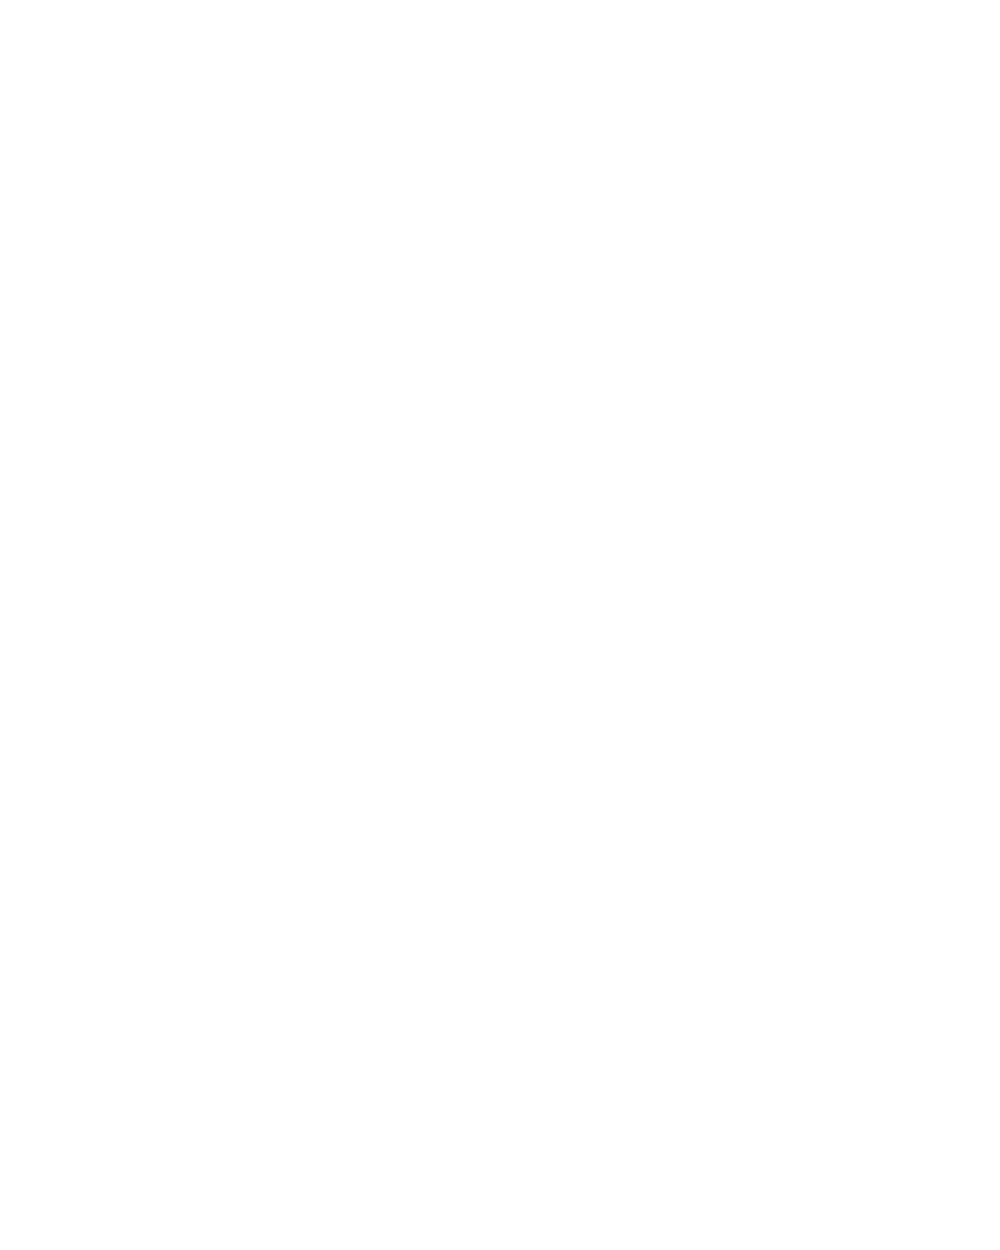

<IPython.core.display.Javascript object>


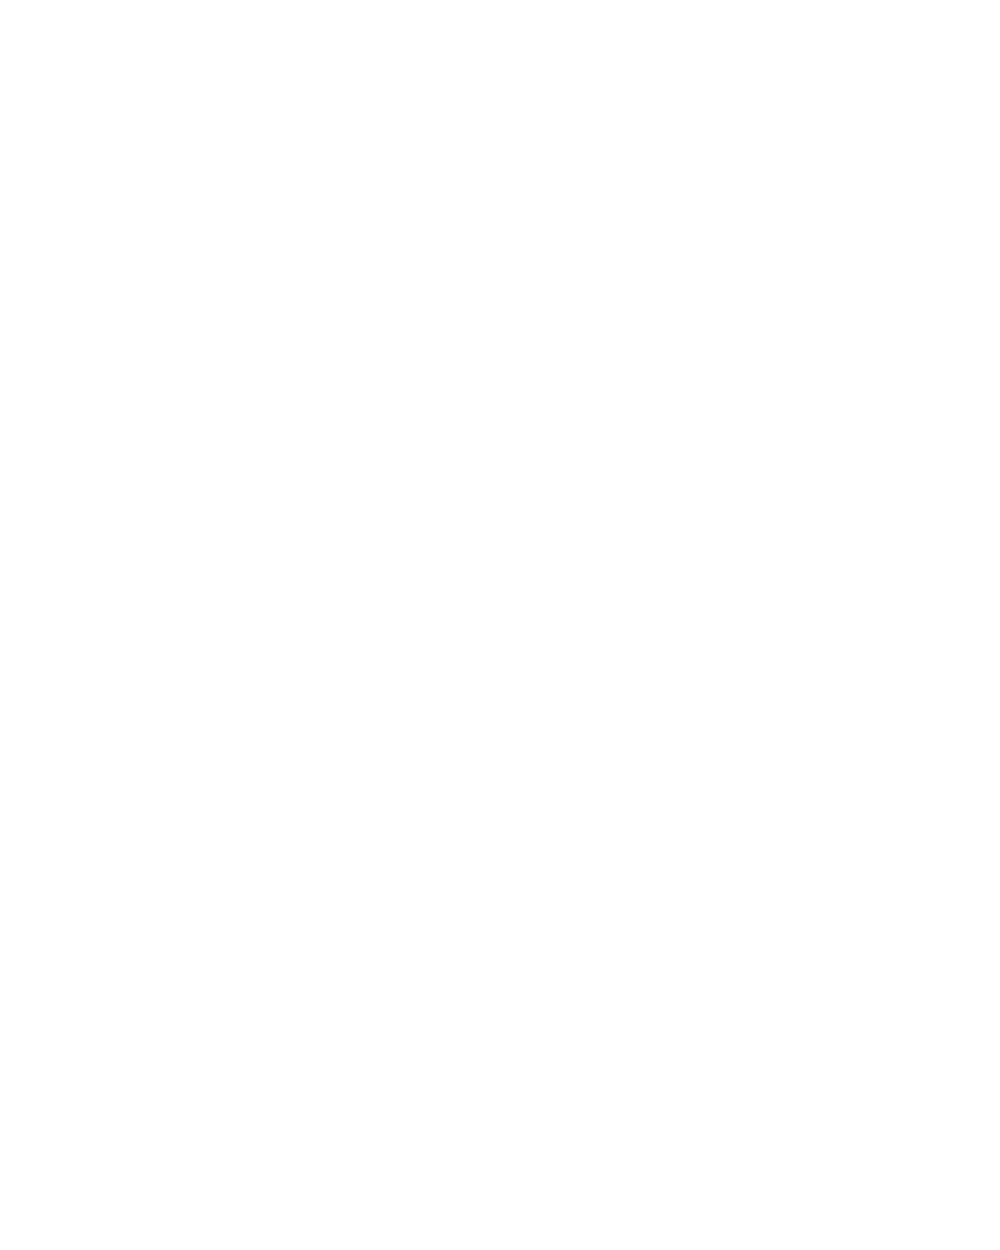

<IPython.core.display.Javascript object>


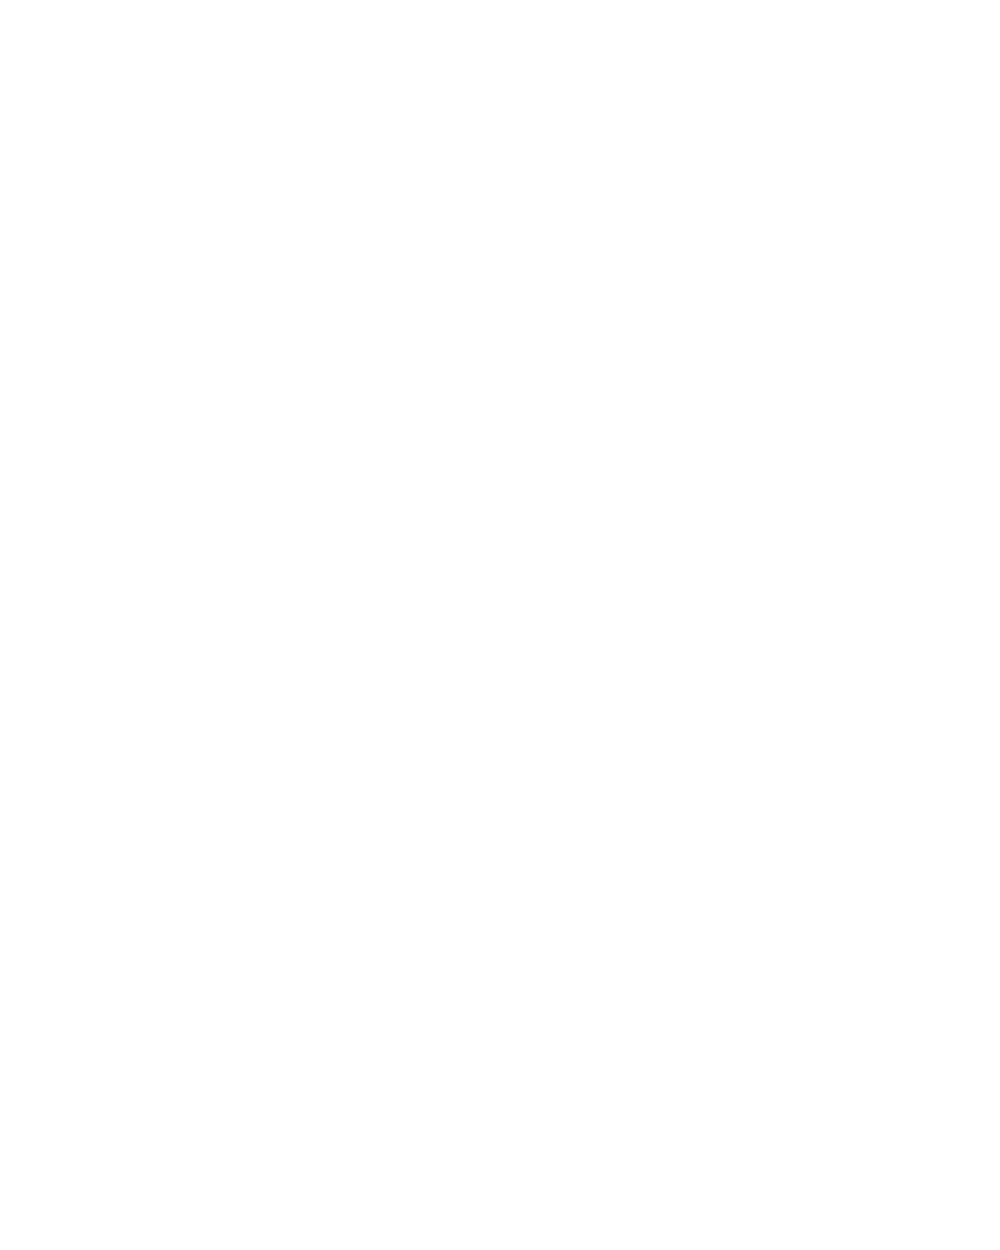

<IPython.core.display.Javascript object>


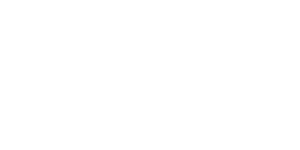

<IPython.core.display.Javascript object>


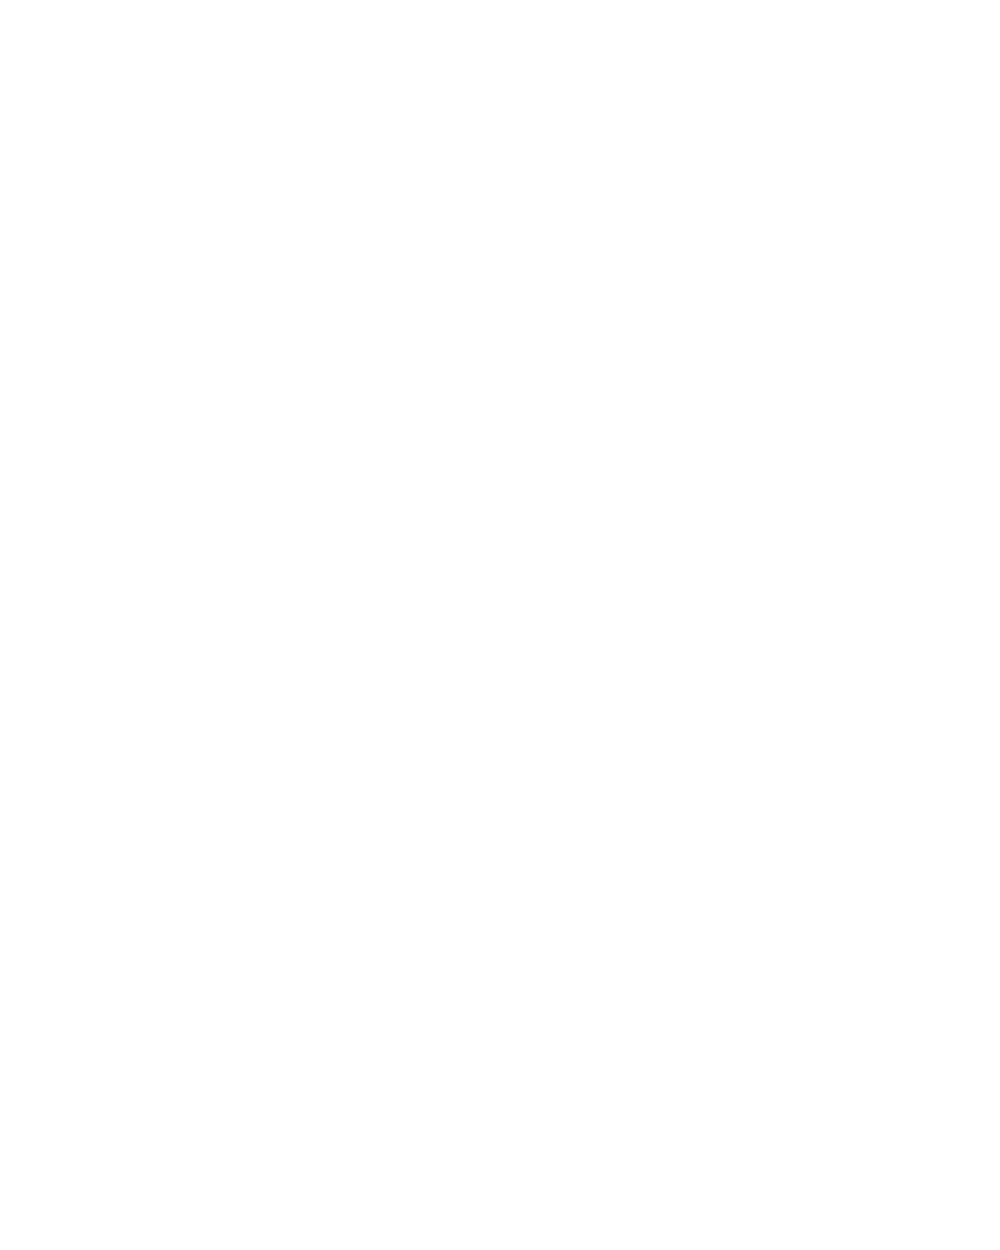

<IPython.core.display.Javascript object>


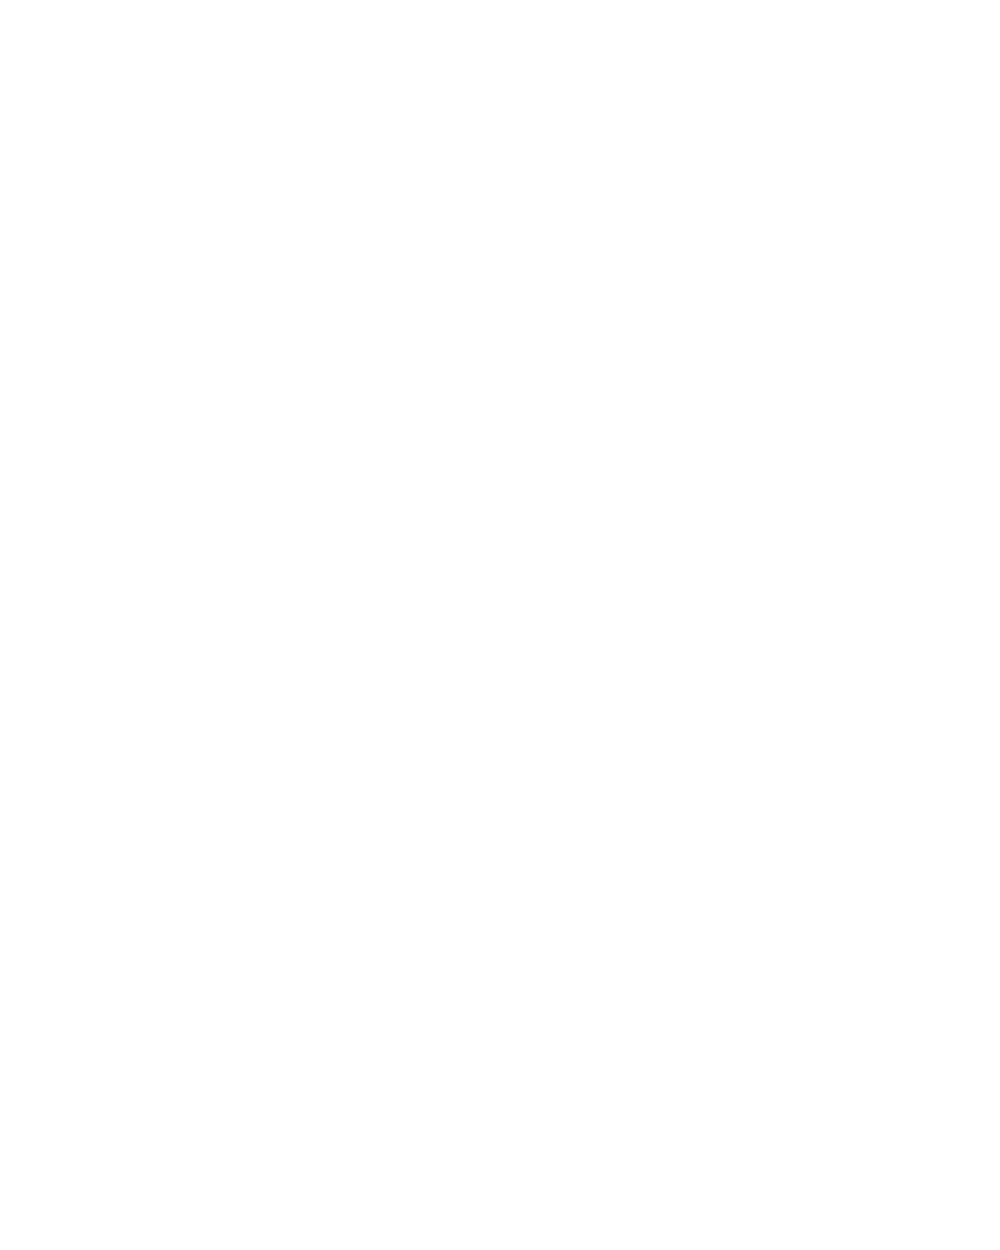

<IPython.core.display.Javascript object>


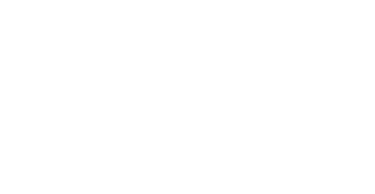

<IPython.core.display.Javascript object>


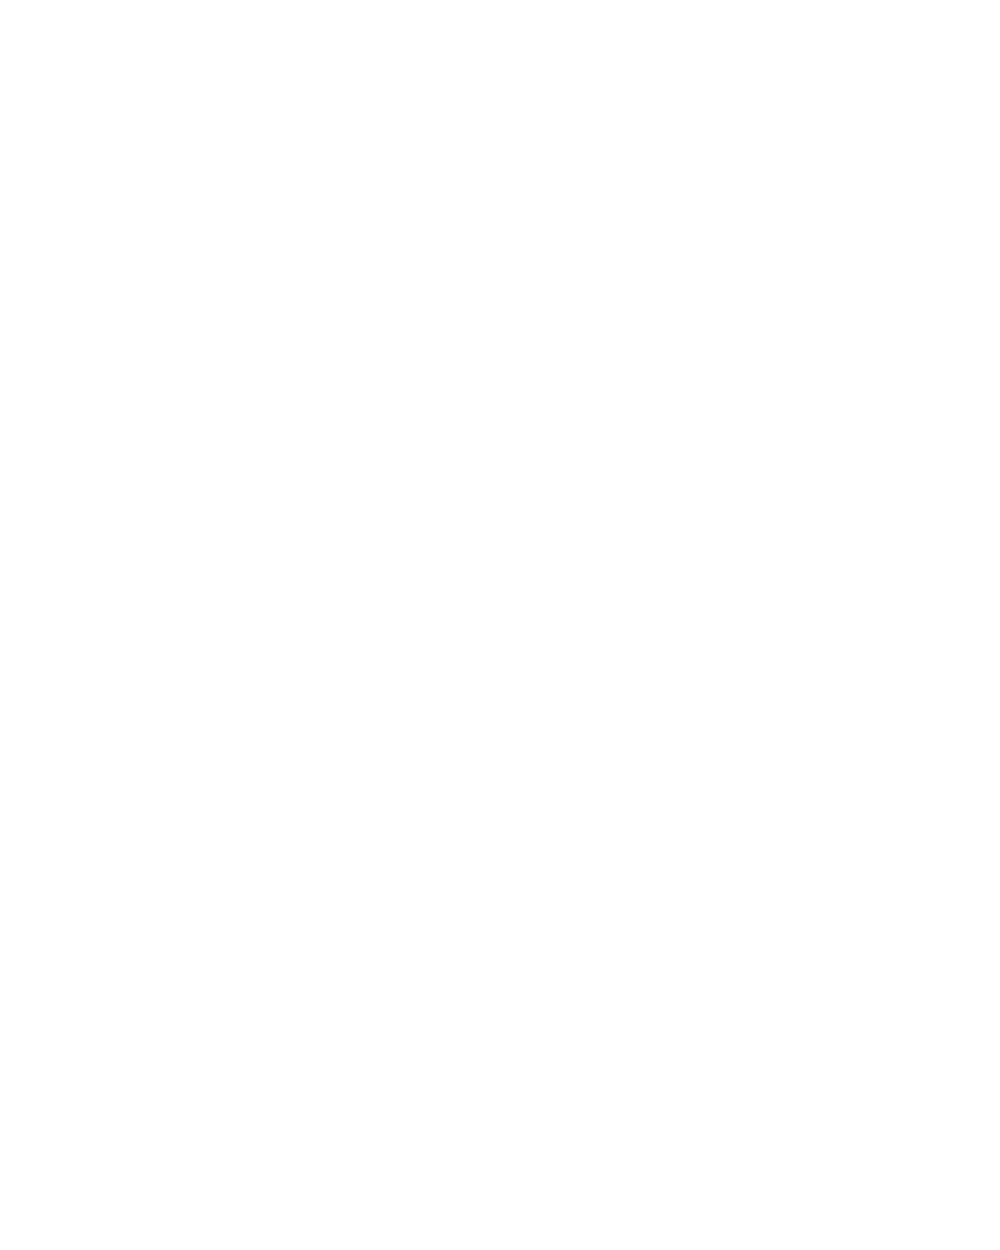

<IPython.core.display.Javascript object>


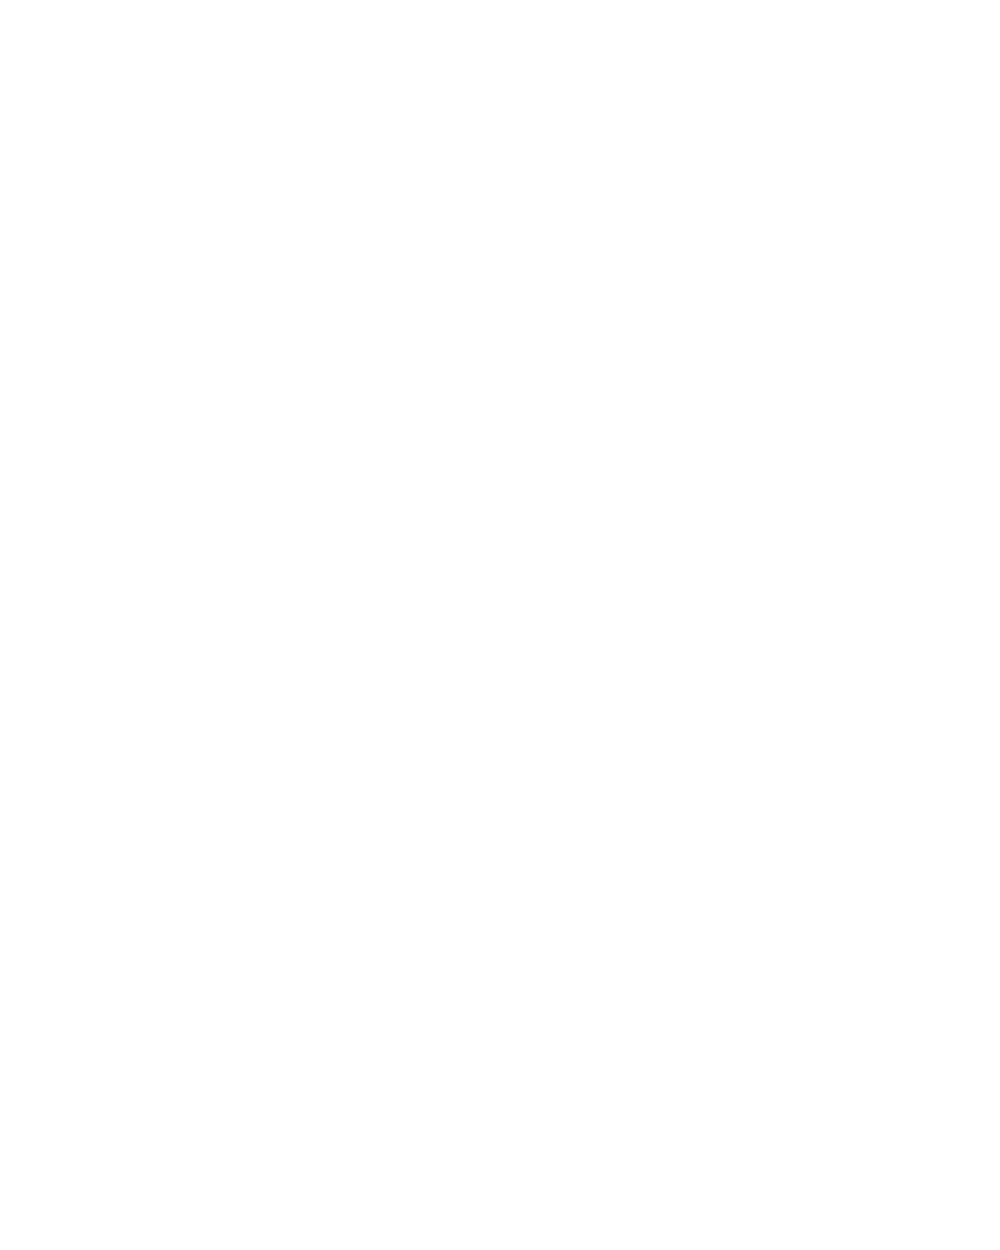

<IPython.core.display.Javascript object>


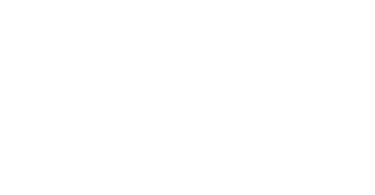

<IPython.core.display.Javascript object>


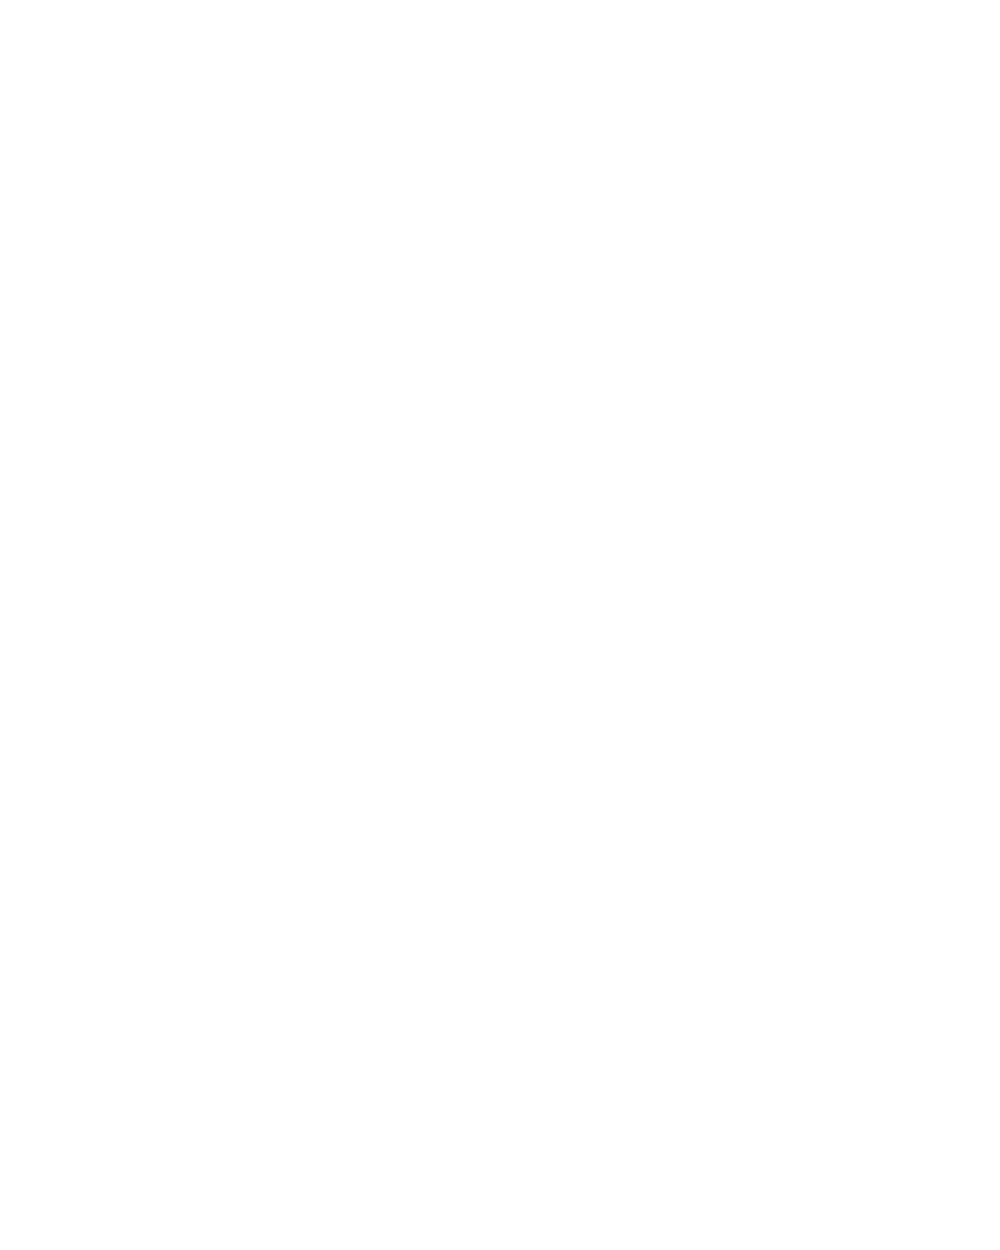

<IPython.core.display.Javascript object>


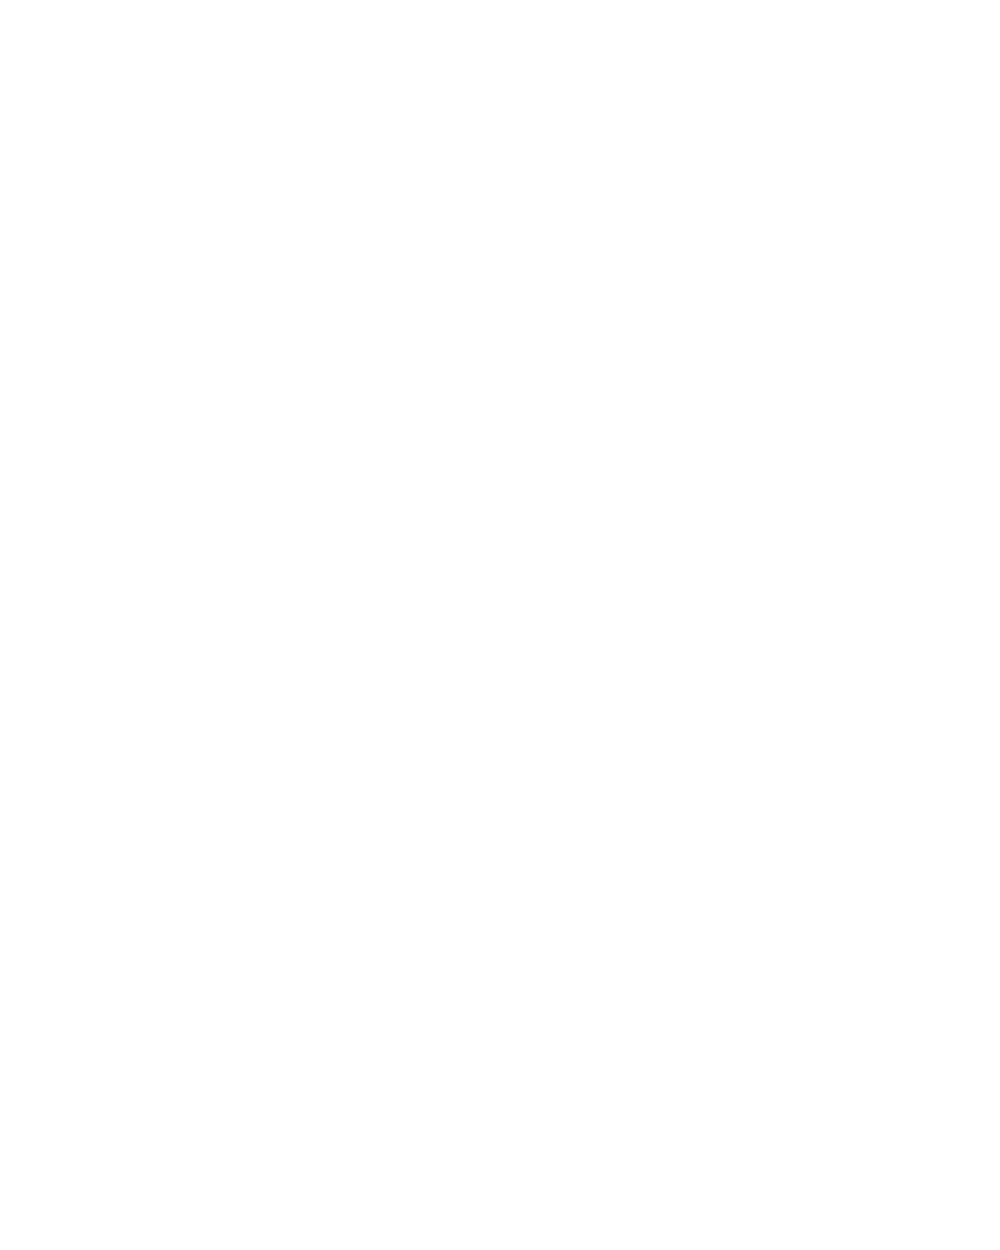

<IPython.core.display.Javascript object>


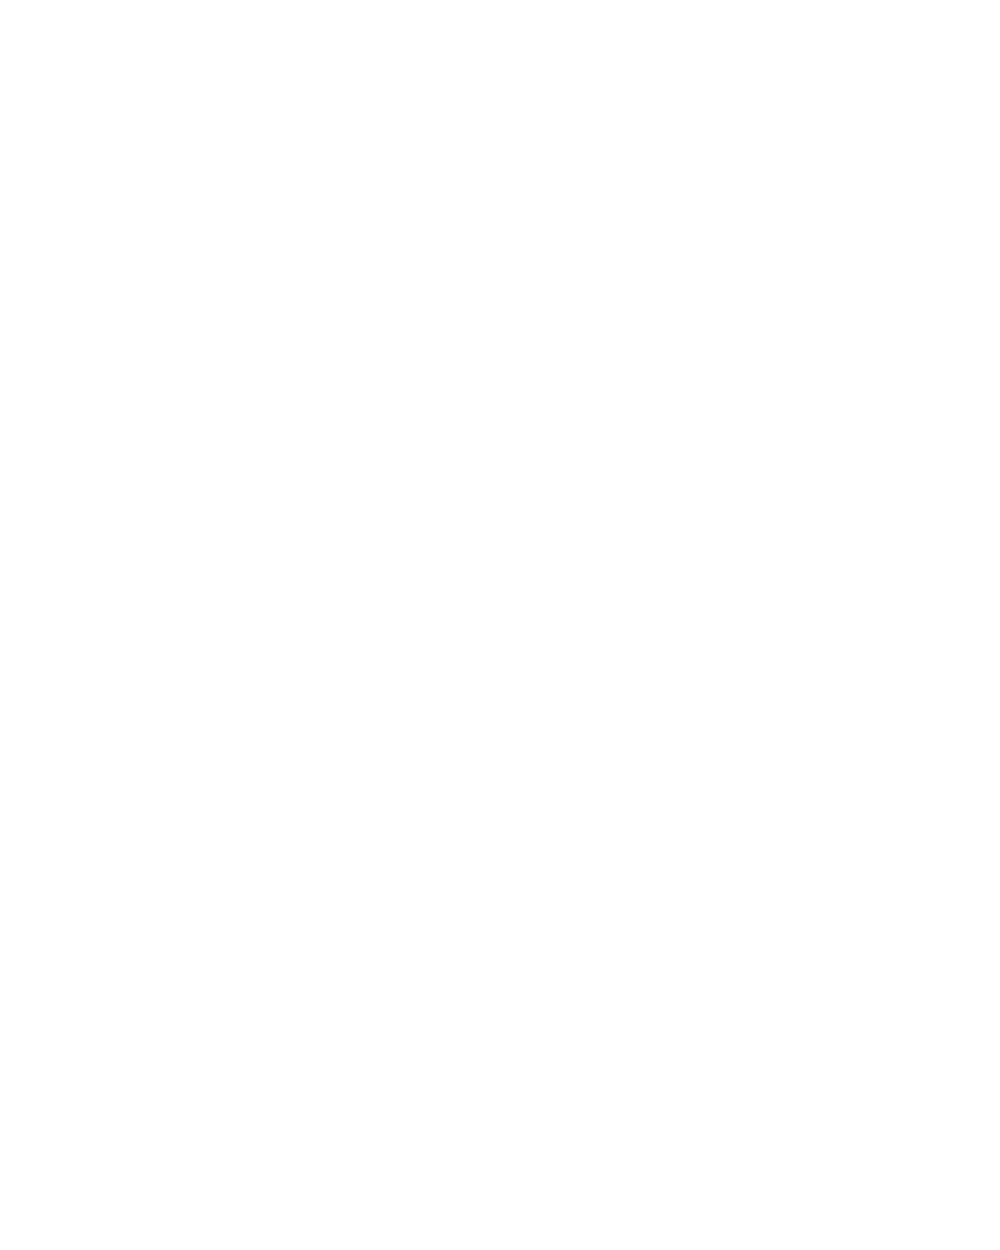

<IPython.core.display.Javascript object>


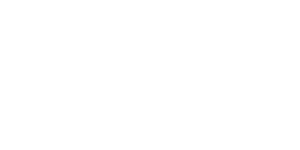

<IPython.core.display.Javascript object>


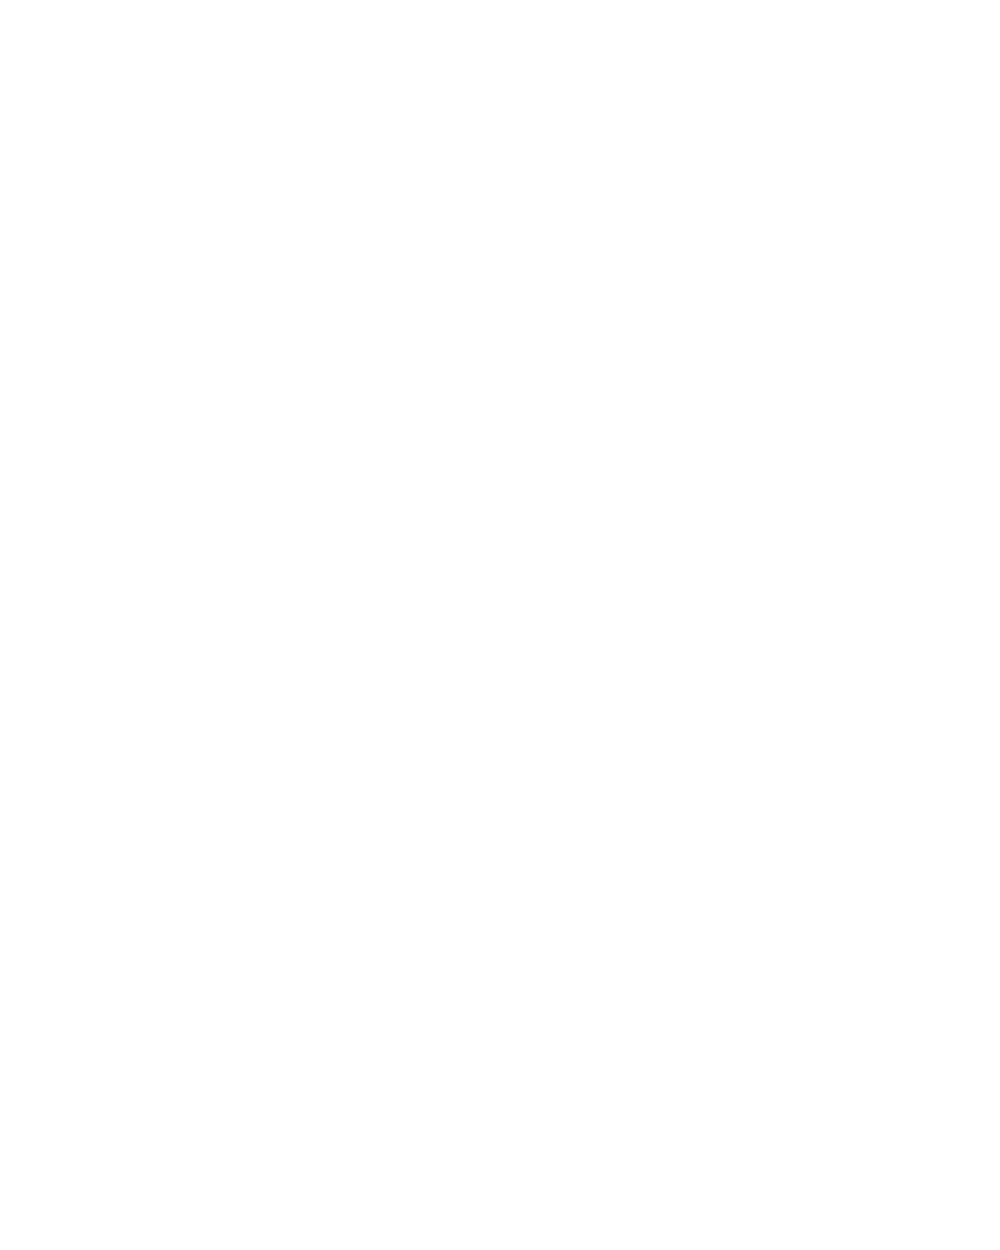

<IPython.core.display.Javascript object>


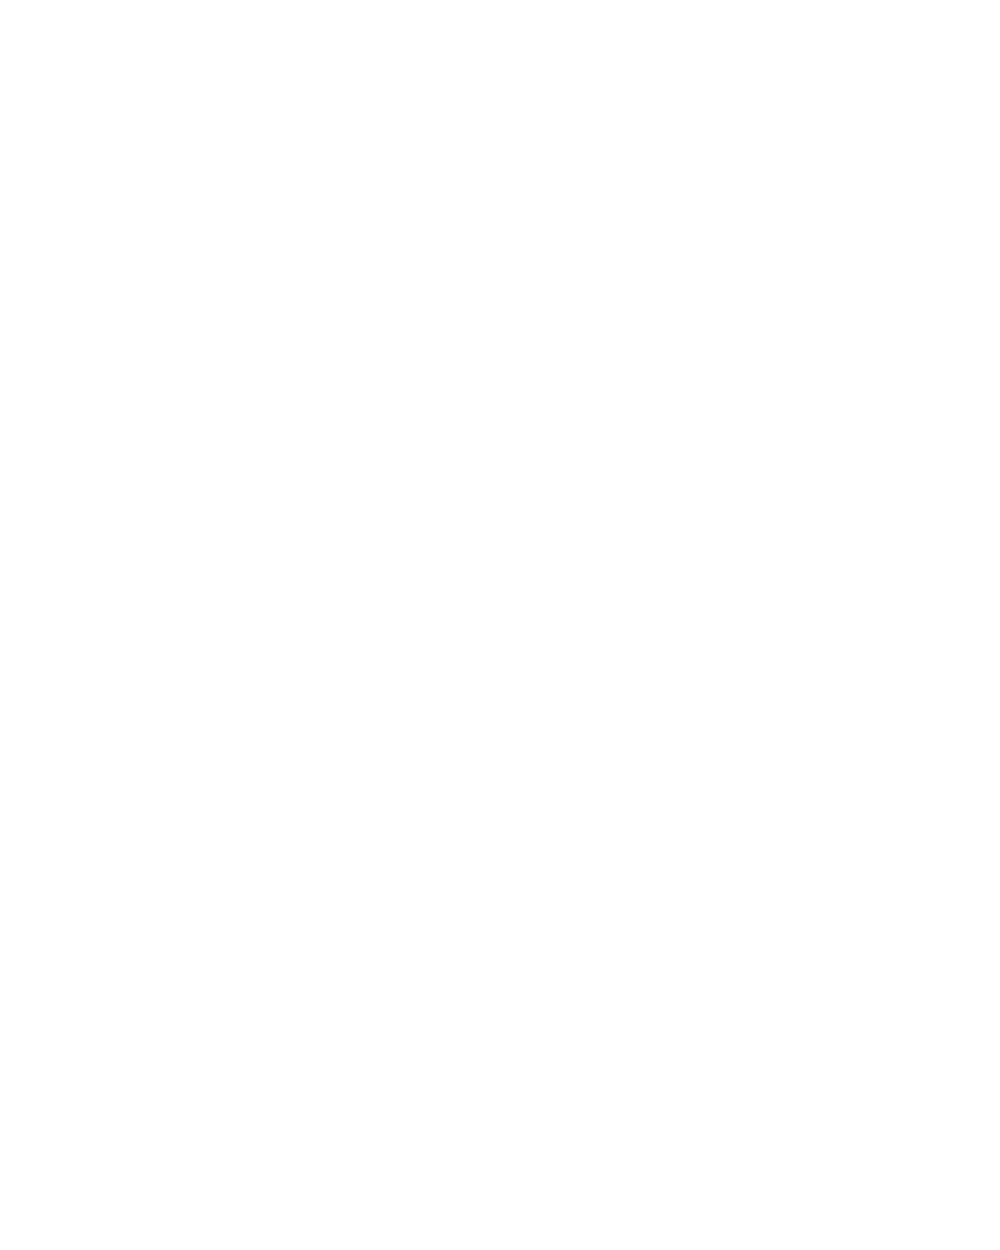

<IPython.core.display.Javascript object>


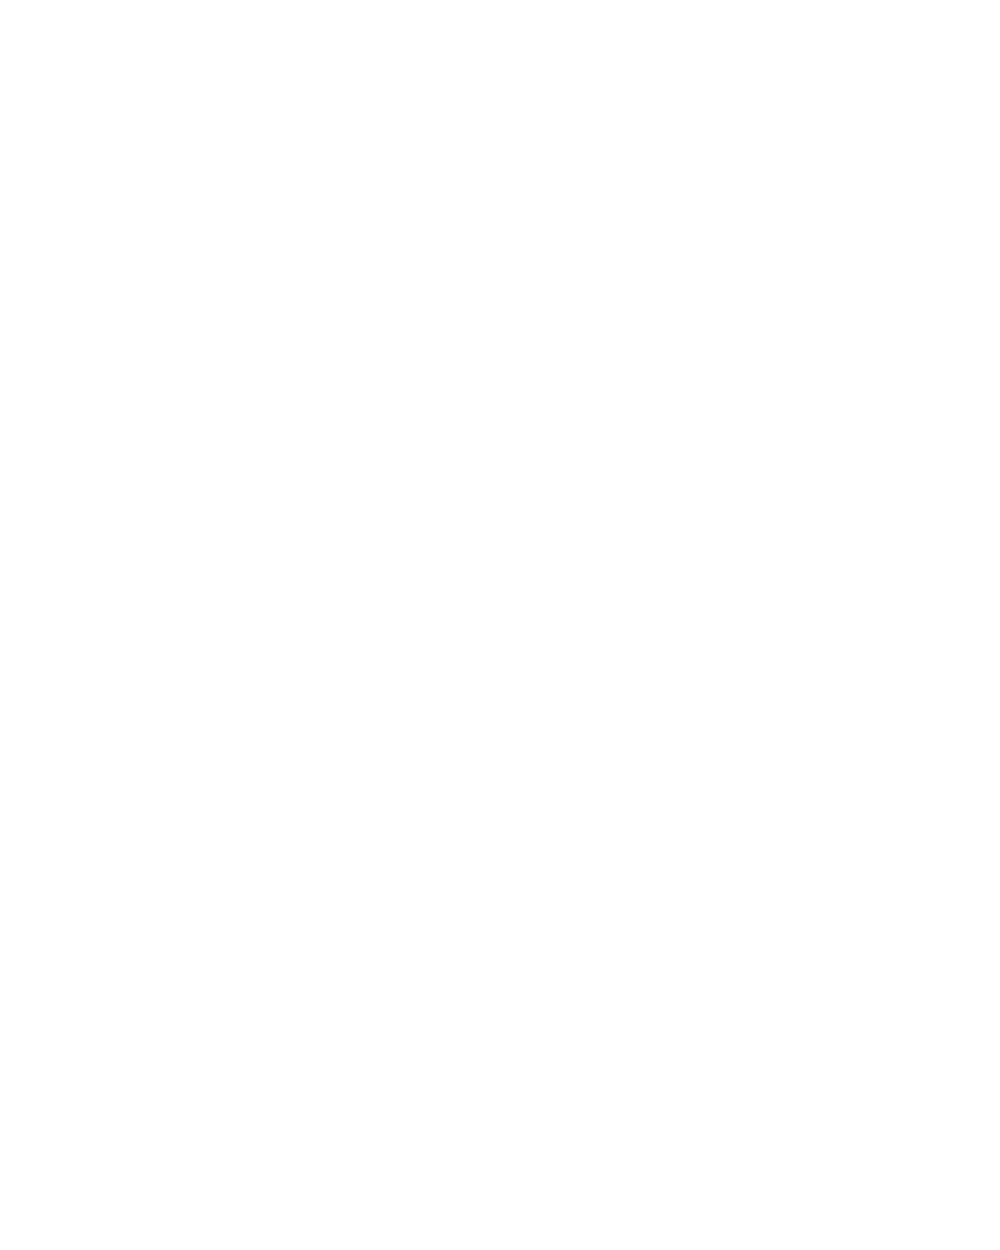

<IPython.core.display.Javascript object>


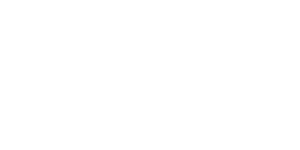

<IPython.core.display.Javascript object>


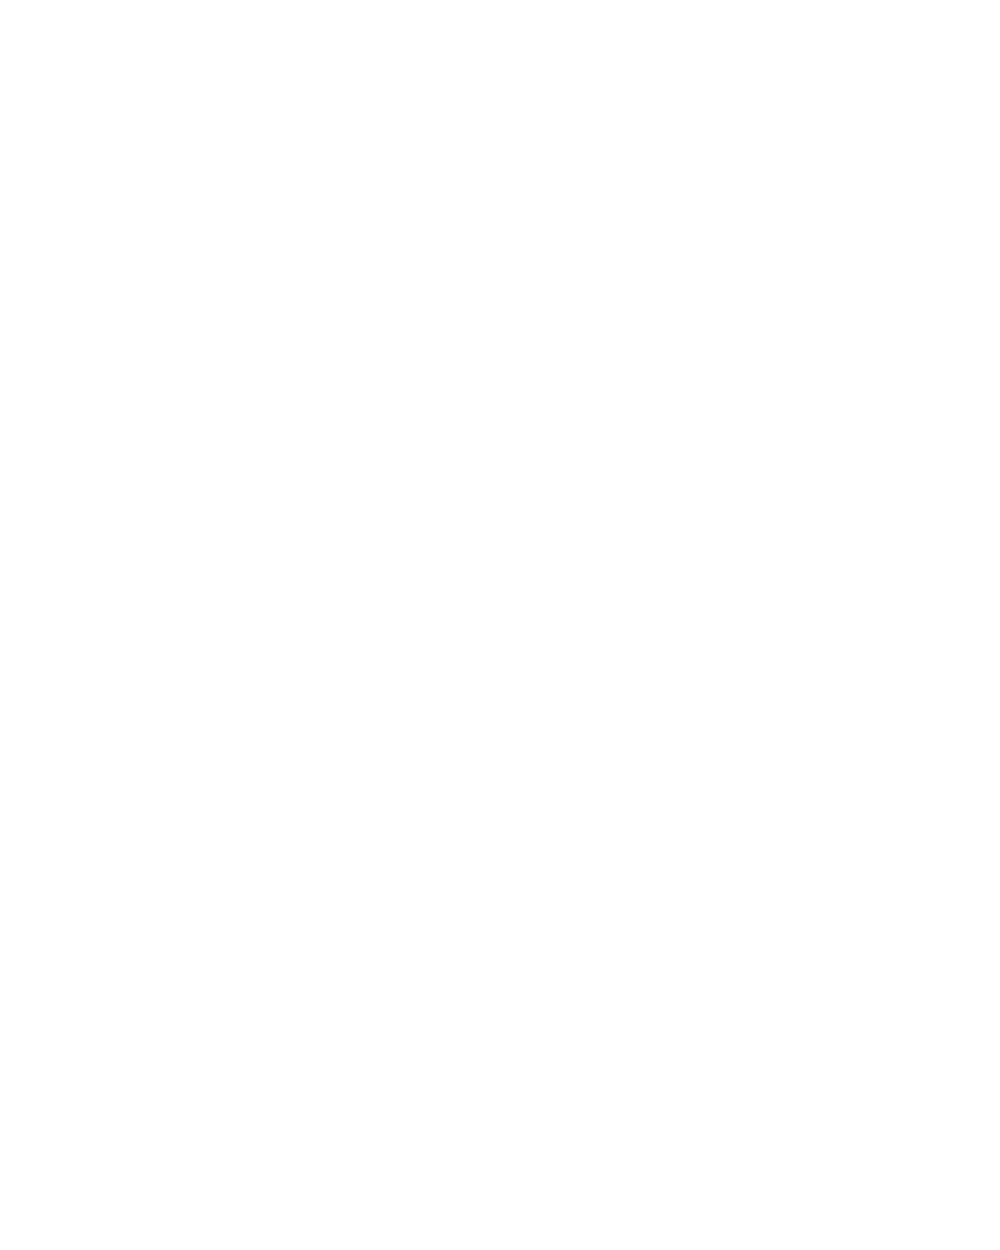

<IPython.core.display.Javascript object>


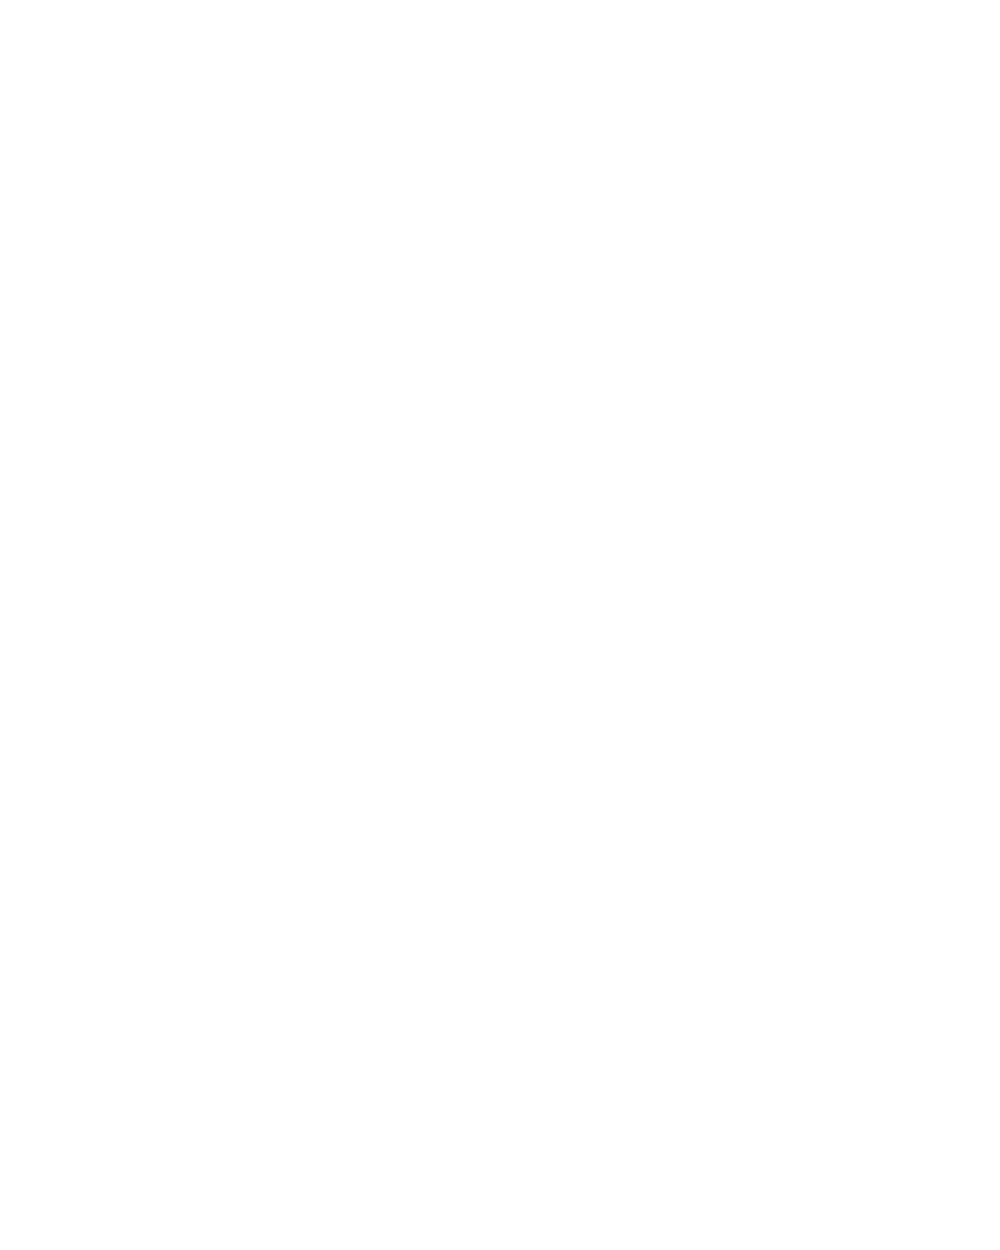

<IPython.core.display.Javascript object>


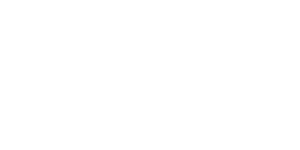

<IPython.core.display.Javascript object>


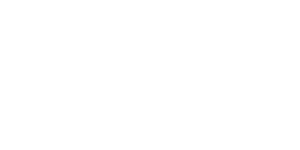

<IPython.core.display.Javascript object>


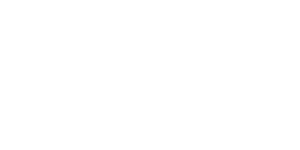

<IPython.core.display.Javascript object>


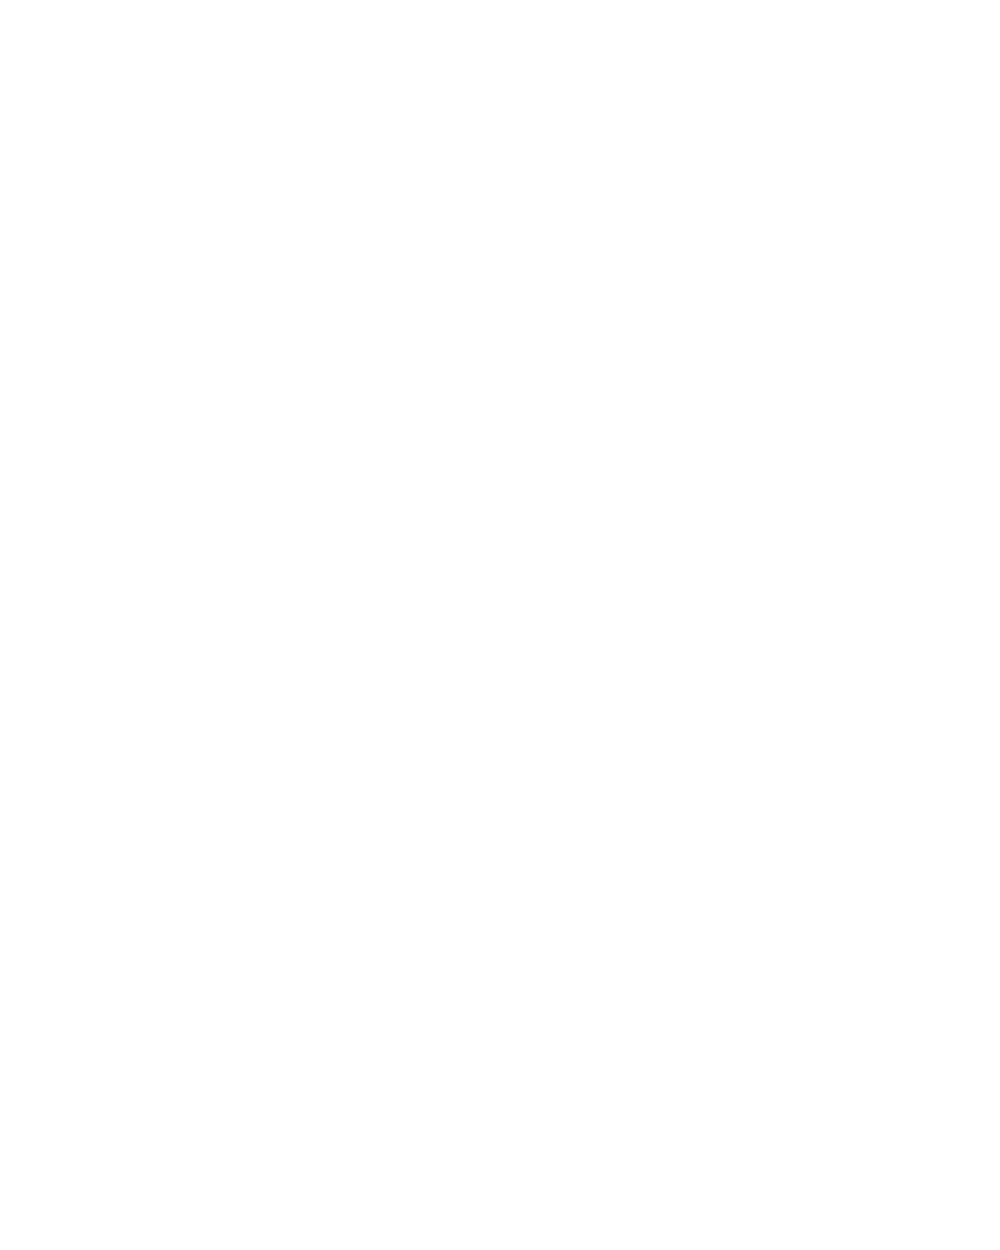

<IPython.core.display.Javascript object>


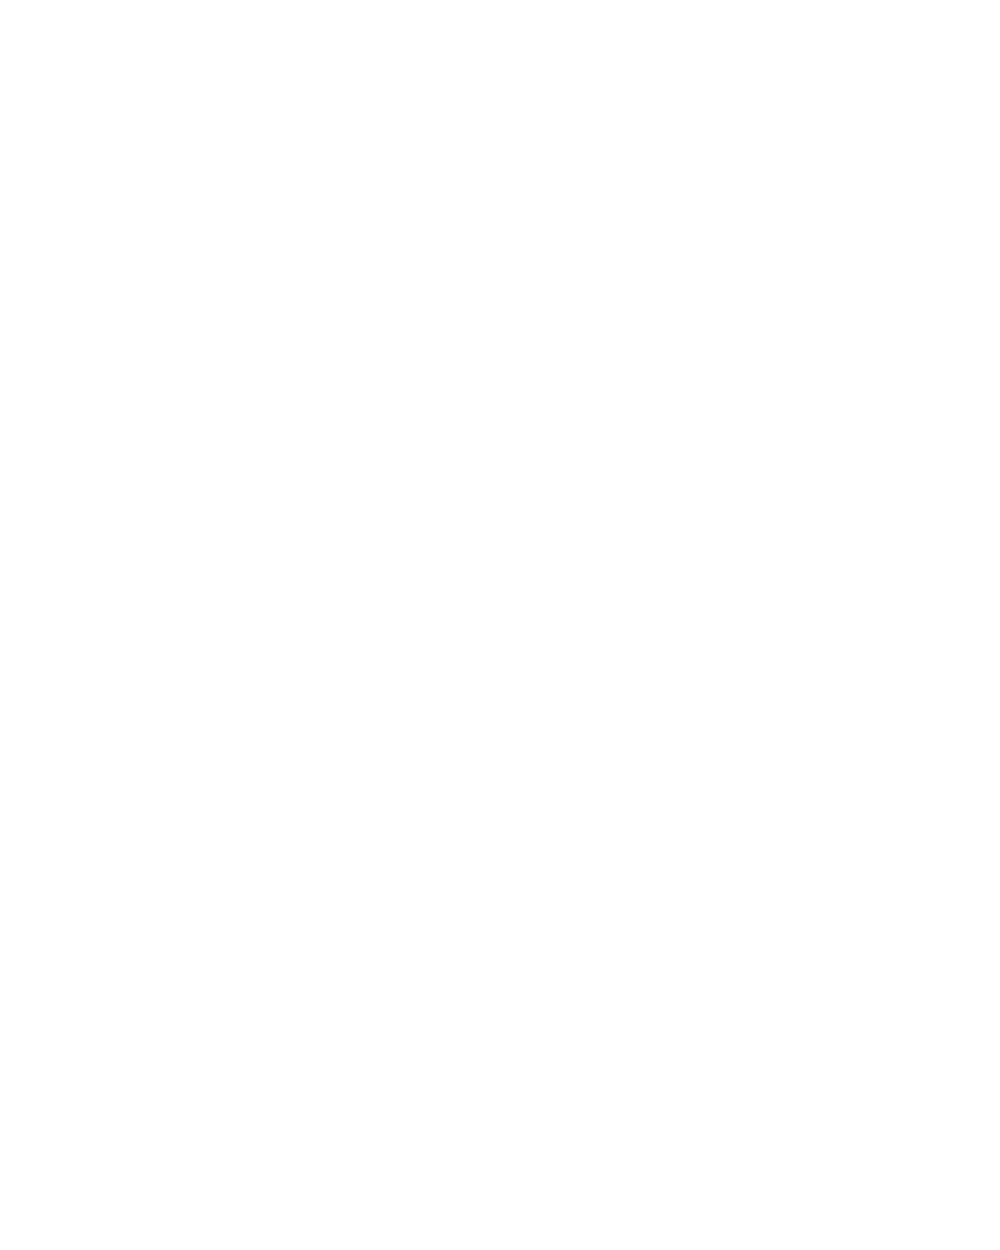

<IPython.core.display.Javascript object>


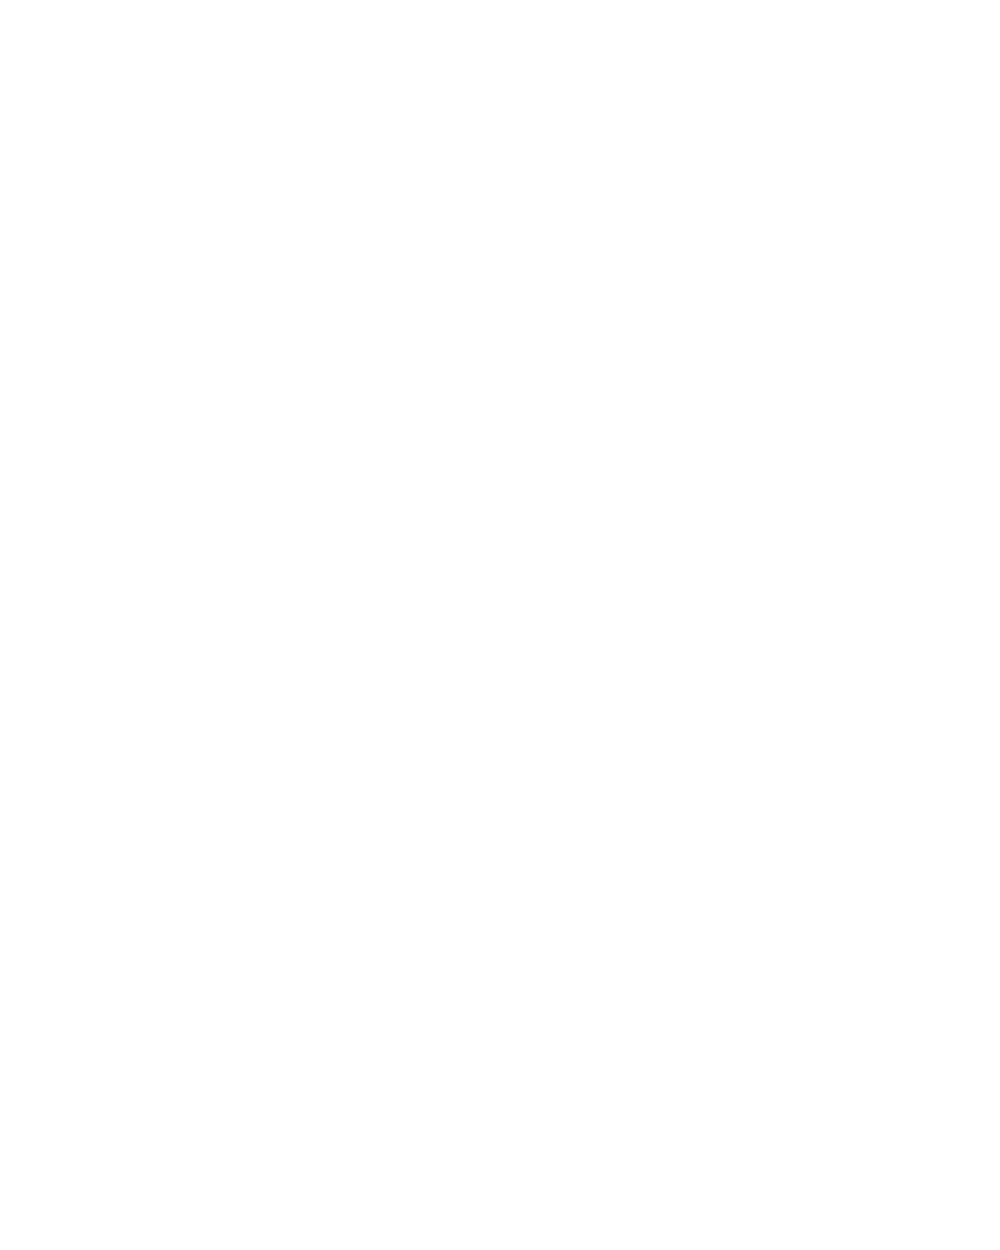

<IPython.core.display.Javascript object>


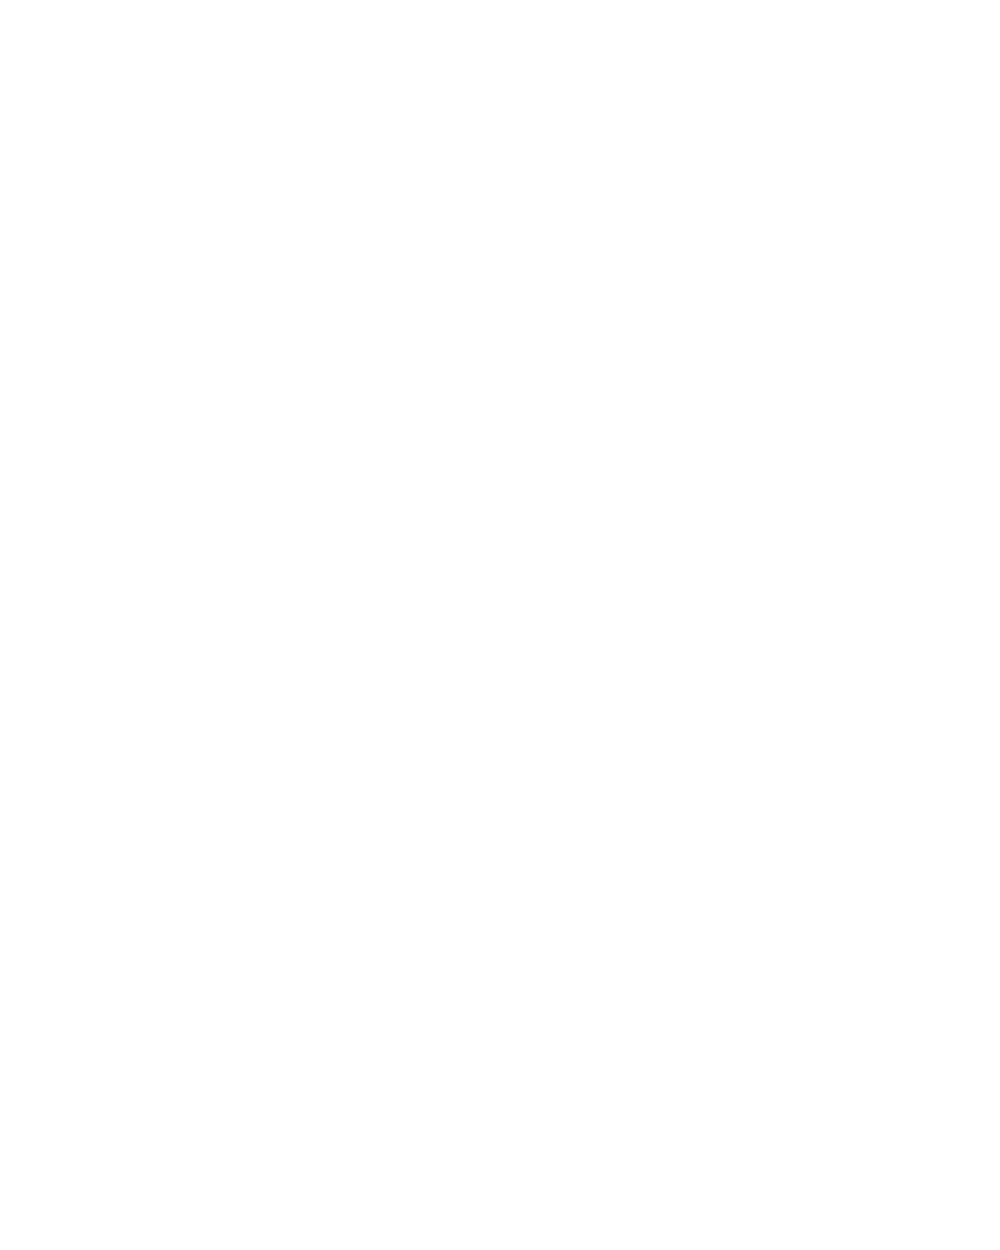

<IPython.core.display.Javascript object>


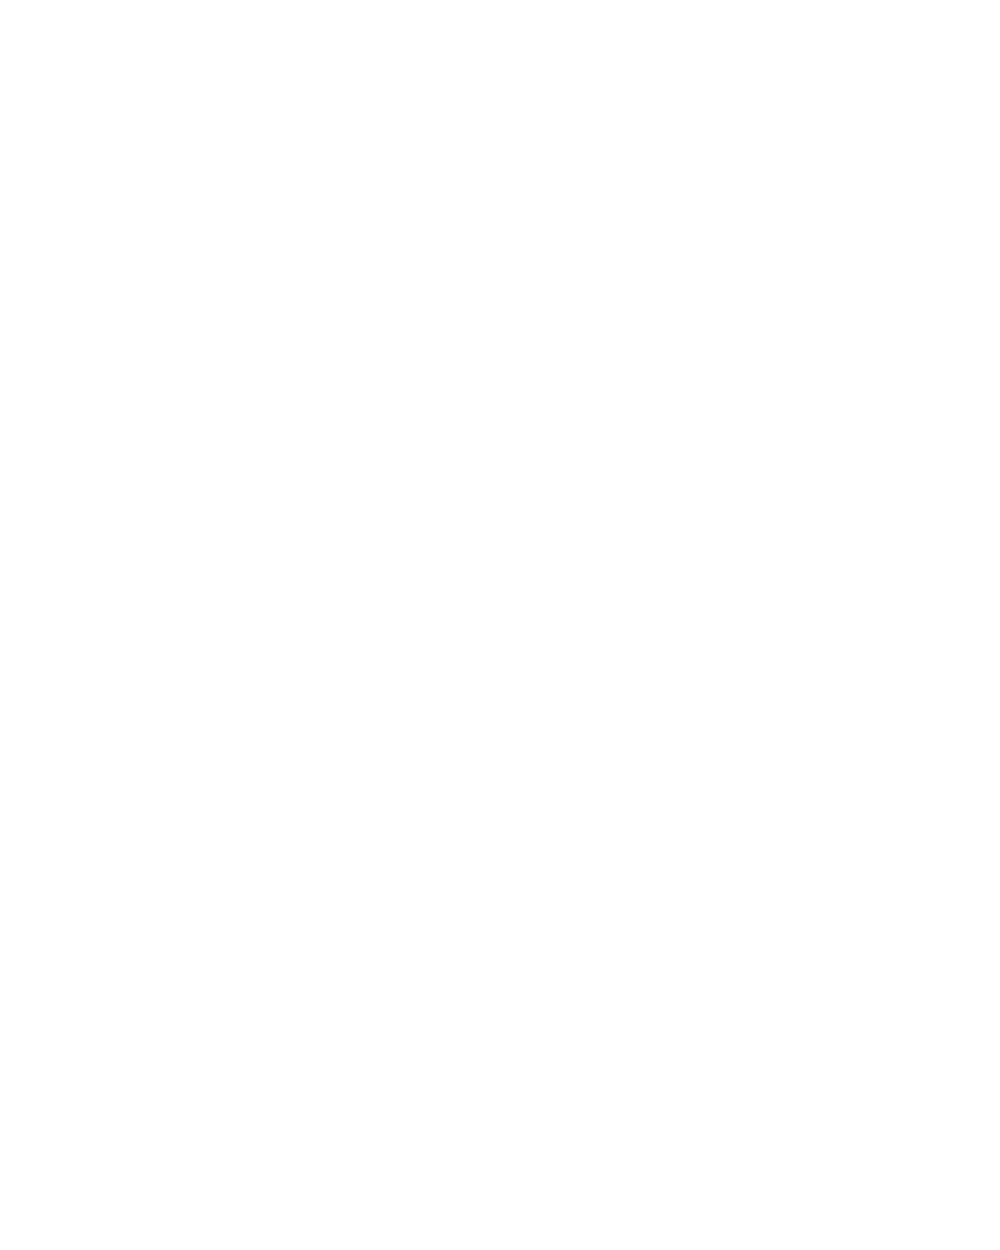

<IPython.core.display.Javascript object>


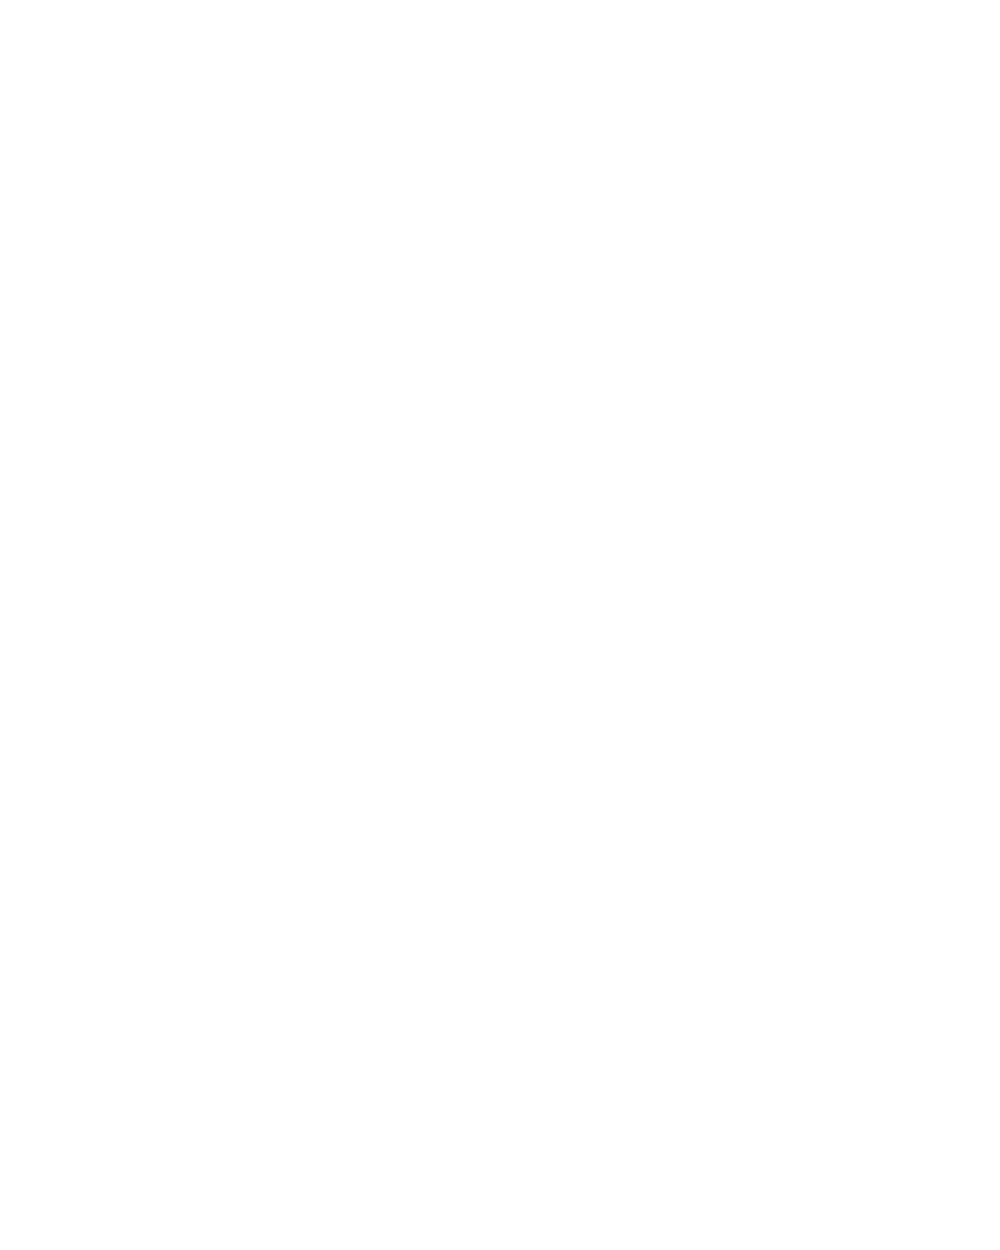

<IPython.core.display.Javascript object>


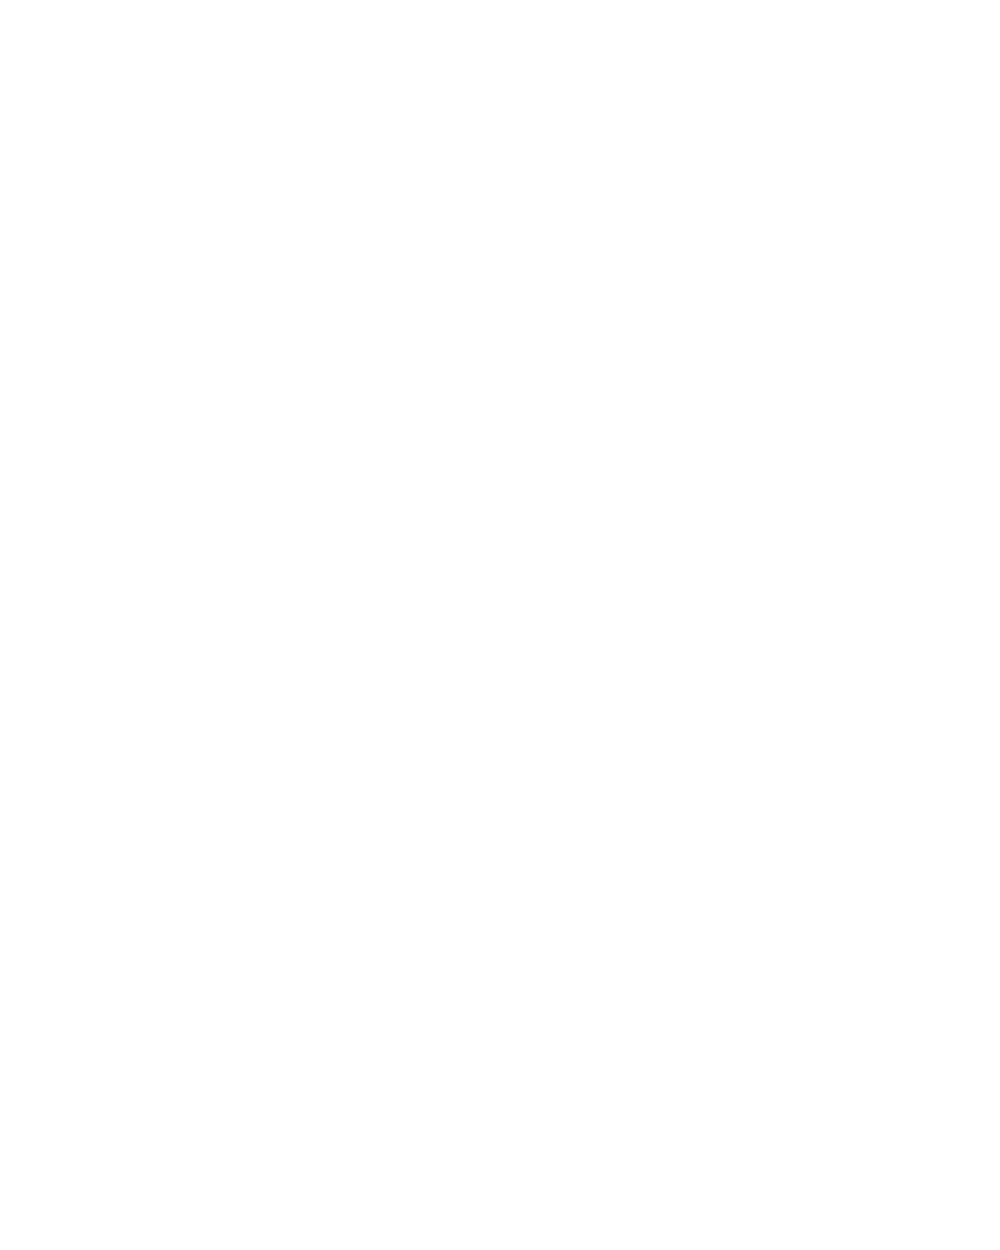

<IPython.core.display.Javascript object>


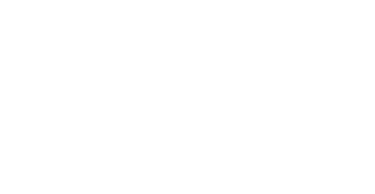

<IPython.core.display.Javascript object>


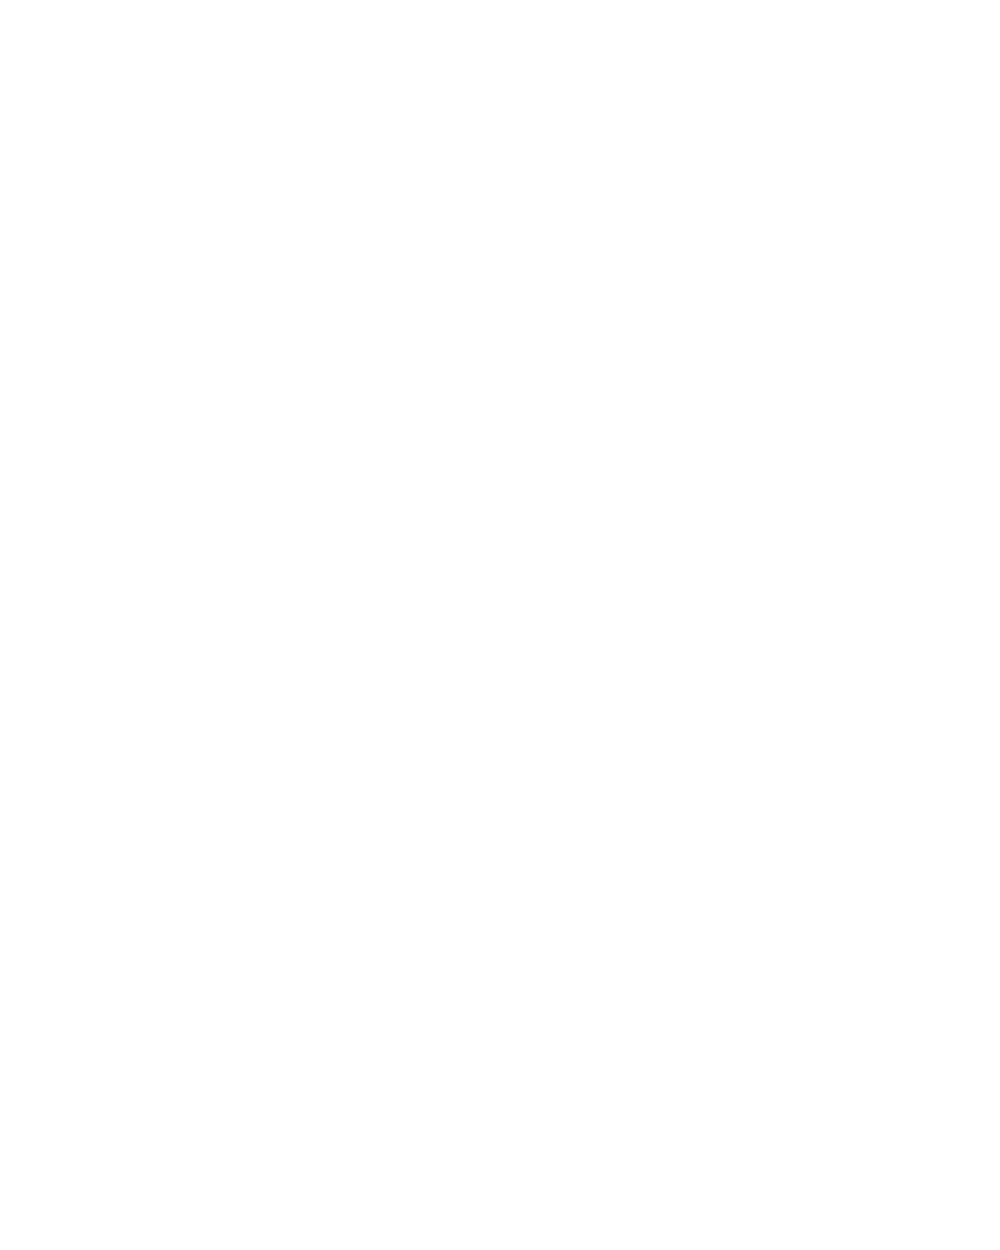

<IPython.core.display.Javascript object>


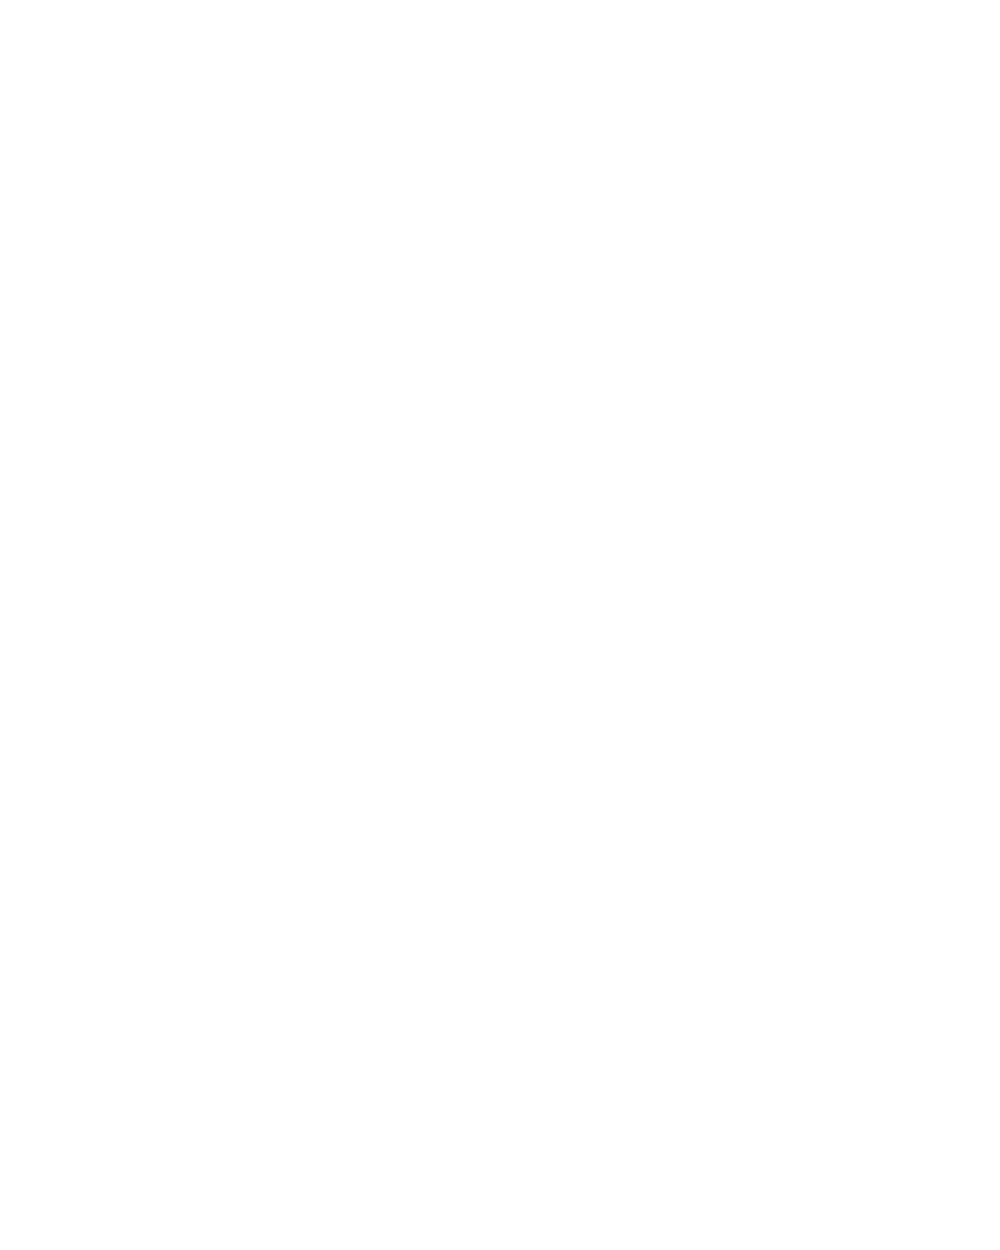

<IPython.core.display.Javascript object>


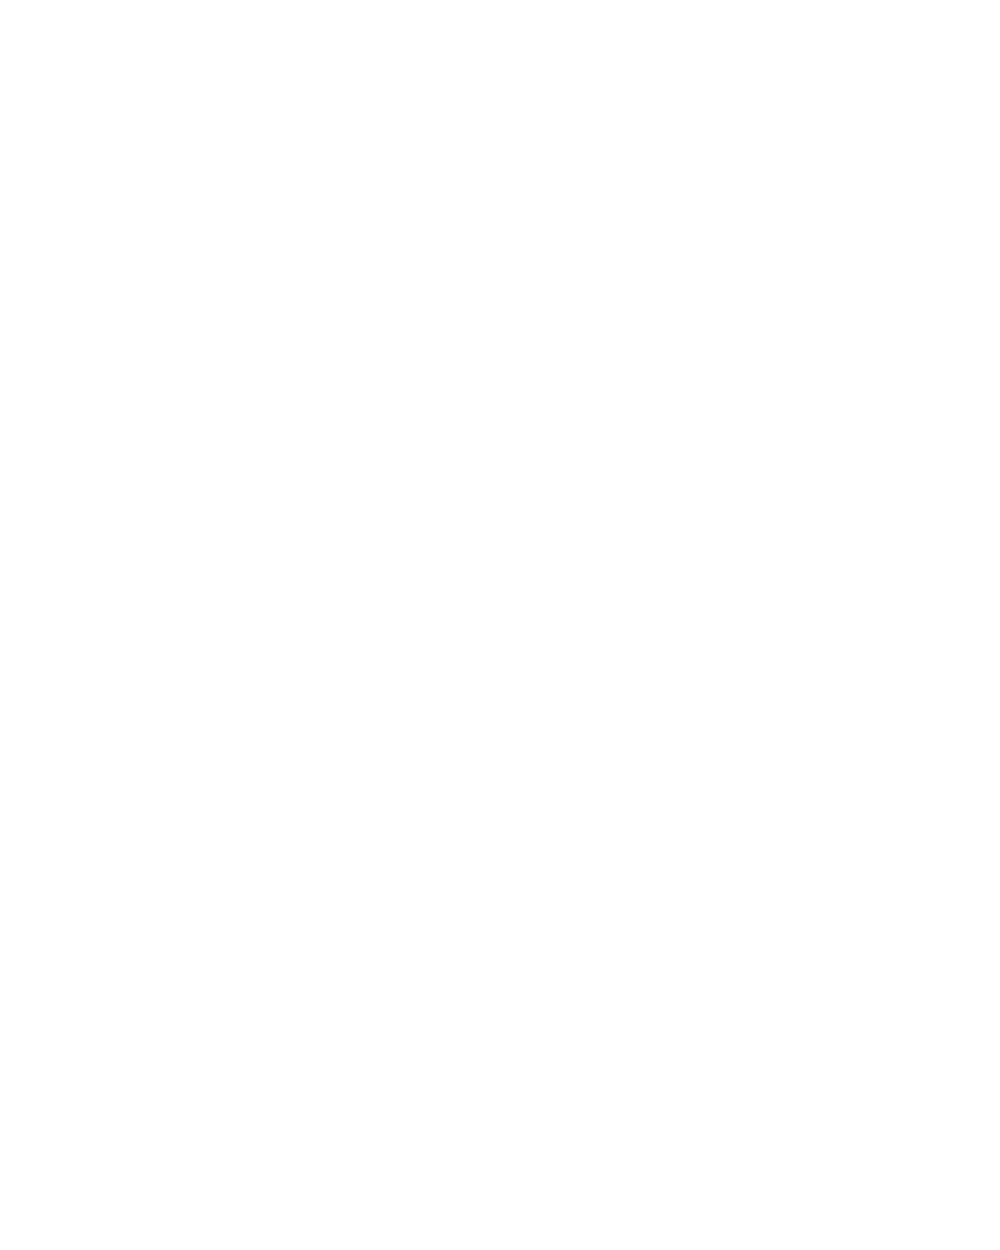

<IPython.core.display.Javascript object>


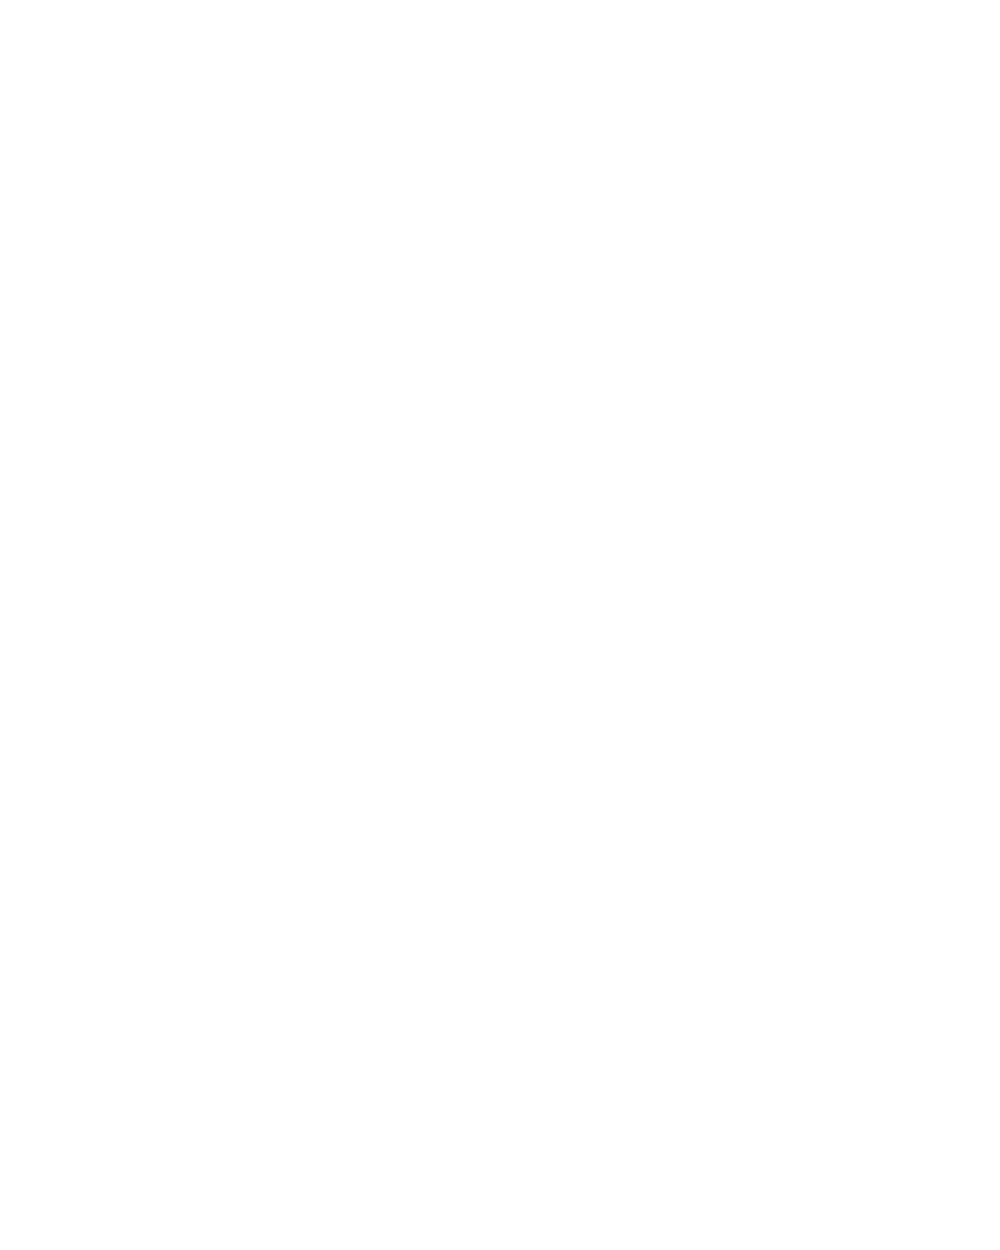

In [9]:

spatial_subsample = 1

cap = cv2.VideoCapture("C:/Users/laure/Documents/ARA/laurd_ara/video_processing/fxd_low_1.mp4")
ret, frame = cap.read()
# image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)[100:-80:spatial_subsample,800:1500:spatial_subsample]
count = 0

display_handle=display(None, display_id=True)

frame_width = 800
frame_height = 1000
frame_rate = 10
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')

fourcc = cv2.VideoWriter_fourcc(*'MJPG')

clip_title = 'piv_vec_test_fine.avi'
out = cv2.VideoWriter(clip_title,fourcc, frame_rate, (frame_width,frame_height),isColor=True)


while ret and count < fin_time-avg_leng:   
    if count>avg_leng:
        
        
        fig, ax = plt.subplots(figsize=(8,10))
#         plt.subplots_adjust(bottom=0.35)
        Q= ax.quiver(x,y,final_u[count-avg_leng],
                     final_v[count-avg_leng],final_u[count-avg_leng]**2+final_v[count-avg_leng]**2, cmap="plasma",zorder=5)
        ax.imshow(frame[100:-80:spatial_subsample,800:1500:spatial_subsample],alpha=0.7,cmap="gray",zorder=0)
#         plt.show(block=True)
        plt.close() 
        fig.canvas.draw()
        overlay = np.array(fig.canvas.renderer._renderer)
        
        
#         overlay = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)#, sep='')
#         overlay  = overlay.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    #     # img is rgb, convert to opencv's default bgr
    
#         overlay = cv2.resize(overlay,(800,1000))
        overlay = cv2.cvtColor(overlay,cv2.COLOR_RGBA2BGR)
        out.write(overlay)
        
        
#         imag = cv2.addWeighted(frame[100:-80:spatial_subsample,800:1500:spatial_subsample,:],0.7,overlay,0.3,0)
        # display image with opencv or any operation you like
    #     cv2.imshow("plot",img)


    #     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)[100:-80:spatial_subsample,800:1500:spatial_subsample]
    #     cv2.imshow("cam",frame[100:-80:spatial_subsample,800:1500:spatial_subsample,:])
# 
#         _, imag = cv2.imencode('.jpeg', overlay)
#         display_handle.update(Image(data=imag.tobytes()))
#         k = cv2.waitKey(33) & 0xFF
#         if k == 27:
#             break

        
#         Q.set_UVC(final_u[count-avg_leng],final_v[count-avg_leng],final_u[count-avg_leng]**2+final_v[count-avg_leng]**2)
    
    ret,frame = cap.read()
    count+=1
cap.release()
out.release()

# display_handle.update(None)

In [12]:
type(cap)

cv2.VideoCapture

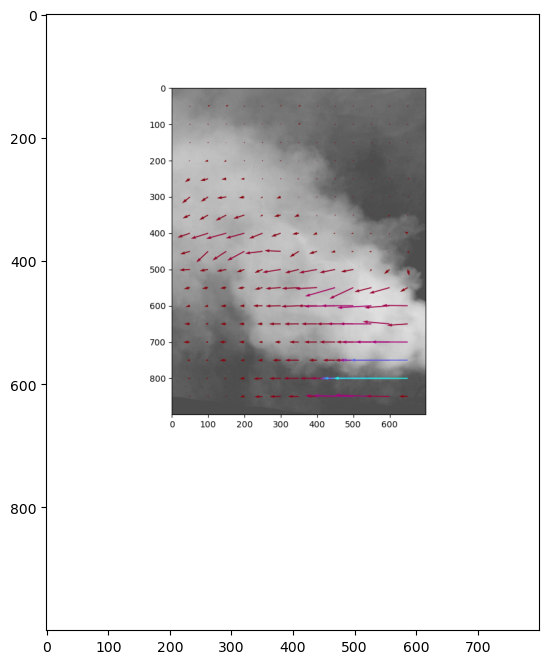

In [10]:
plt.figure(figsize=(10,8))
plt.imshow(overlay)
plt.show()

In [8]:
frame[100:-80:spatial_subsample,800:1500:spatial_subsample,:].shape

(900, 700, 3)